Credit Risk Prediction ML Project!
Serves as a way to see whether or not a person's loan application will default based on credit. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
accepted_loans = "data/accepted_2007_to_2018q4.csv/accepted_2007_to_2018q4.csv"

try: 
    df_accepted = pd.read_csv(accepted_loans, low_memory=False) # low_memory=False to avoid dtype warning for large files
    print("Data Loaded Successfully")
except FileNotFoundError:
    print(f"File {accepted_loans} not found. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")


Data Loaded Successfully


In [3]:
print("\n--First 5 Rows of the Data--")
print(df_accepted.head())


--First 5 Rows of the Data--
         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.99       123.03     C        C4  ...                            NaN   
1     11.99       820.28     C        C1  ...                            NaN   
2     10.78       432.66     B        B4  ...                            NaN   
3     14.85       829.90     C        C5  ...                            NaN   
4     22.45       289.91     F        F1  ...                            NaN   

  hardship_las

In [4]:
print("\nDataFrame Info:")
print(df_accepted.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
None


In [5]:
print("DataFrame shape:")
print("Rows:", df_accepted.shape[0], "Columns:", df_accepted.shape[1])

DataFrame shape:
Rows: 2260701 Columns: 151


In [6]:
print("Descriptive statistics:")
print(df_accepted.describe())

Descriptive statistics:
       member_id     loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count        0.0  2.260668e+06  2.260668e+06     2.260668e+06  2.260668e+06   
mean         NaN  1.504693e+04  1.504166e+04     1.502344e+04  1.309283e+01   
std          NaN  9.190245e+03  9.188413e+03     9.192332e+03  4.832138e+00   
min          NaN  5.000000e+02  5.000000e+02     0.000000e+00  5.310000e+00   
25%          NaN  8.000000e+03  8.000000e+03     8.000000e+03  9.490000e+00   
50%          NaN  1.290000e+04  1.287500e+04     1.280000e+04  1.262000e+01   
75%          NaN  2.000000e+04  2.000000e+04     2.000000e+04  1.599000e+01   
max          NaN  4.000000e+04  4.000000e+04     4.000000e+04  3.099000e+01   

        installment    annual_inc           dti   delinq_2yrs  fico_range_low  \
count  2.260668e+06  2.260664e+06  2.258957e+06  2.260639e+06    2.260668e+06   
mean   4.458068e+02  7.799243e+04  1.882420e+01  3.068792e-01    6.985882e+02   
std    2.671735e+02  

In [ ]:
# The list of columns in the DataFrame (features)
print("\nList of Features (Potential):")
print(df_accepted.columns.tolist())


List of Features (Potential):
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_s

In [ ]:
print("All Unique Loan Statuses in Raw Data:\n", df_accepted['loan_status'].value_counts()) 

All Unique Loan Statuses in Raw Data:
 loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64


Shape of filtered DataFrame: (1369566, 151)

Number of Defaulted Loans:
is_default
0    1078739
1     290827
Name: count, dtype: int64

Proportion of Defaulted Loans:
is_default
0    0.78765
1    0.21235
Name: proportion, dtype: float64

Default Rate: 21.23%


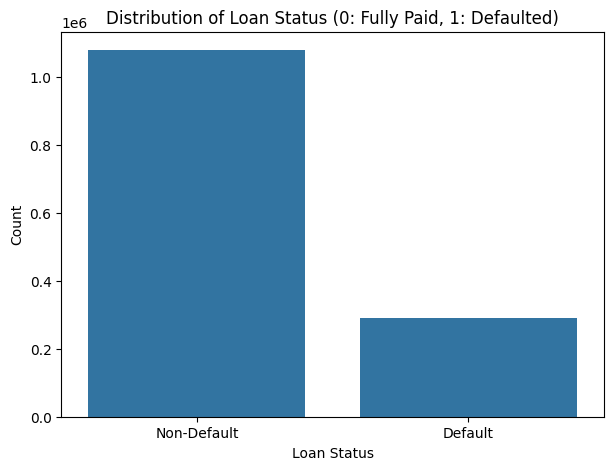

In [9]:
# Current, Late (16-30 days), In Grace Period, and Current are not included as they are not final statuses.
target_mapping = {
    "Charged Off": 1,
    "Default": 1,
    "Late (31-120 days)": 1,
    "Does not meet the credit policy. Status:Charged Off": 1,
    "Fully Paid": 0,
    "Does not meet the credit policy. Status:Fully Paid": 0
} 

#Filtering the DataFrame to include only the final statuses
final_status = ["Charged Off", "Default", "Late (31-120 days)", "Does not meet the credit policy. Status:Charged Off", "Fully Paid", "Does not meet the credit policy. Status:Fully Paid"]

df_filtered = df_accepted[df_accepted['loan_status'].isin(final_status)].copy() #.copy() to avoid SettingWithCopyWarning
print(f"Shape of filtered DataFrame: {df_filtered.shape}") # 1369566 < 2260701 original rows

# Mapping the loan status to binary target variable
df_filtered['is_default'] = df_filtered['loan_status'].map(target_mapping)

# Checking the distribution of the target variable
y = df_filtered['is_default']
print("\nNumber of Defaulted Loans:")
print(y.value_counts())
print("\nProportion of Defaulted Loans:")
print(y.value_counts(normalize=True))

default_rate = y.mean() * 100 # Default rate in percentage
print(f"\nDefault Rate: {default_rate:.2f}%")

# Visualizing the distribution of the target variable
plt.figure(figsize=(7, 5))
sns.countplot(x=y) # x = y means that we are plotting the target variable, which includes 0 and 1 (non-default and default)
plt.title('Distribution of Loan Status (0: Fully Paid, 1: Defaulted)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Default', 'Default'])
plt.show()

In [7]:
# Dropping columns that are not useful for the analysis
columns_to_drop = [
    # 1. Identifiers and Unnecessary Columns
    'id',
    'member_id',
    'url',
    'desc',
    'loan_status',
    'title',
    'zip_code',
    'emp_title',

    # 2. Data Leakage: Information that would not be available at the time of loan application, only available after the loan is issued or defaulted
    'funded_amnt',
    'funded_amnt_inv',
    'pymnt_plan',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'next_pymnt_d',
    'last_credit_pull_d',
    'last_fico_range_high',
    'last_fico_range_low',

    # 3. Hardship and Debt Settlement Information (outcomes of distress not related to the original loan application)
    'hardship_flag',
    'hardship_type',
    'hardship_reason',
    'hardship_status',
    'deferral_term',
    'hardship_amount',
    'hardship_start_date',
    'hardship_end_date',
    'payment_plan_start_date',
    'hardship_length',
    'hardship_dpd',
    'hardship_loan_status',
    'orig_projected_additional_accrued_interest',
    'hardship_payoff_balance_amount',
    'hardship_last_payment_amount',
    'debt_settlement_flag',
    'debt_settlement_flag_date',
    'settlement_status',
    'settlement_date',
    'settlement_amount',
    'settlement_percentage',
    'settlement_term',

    # 4. Joint/Secondary Borrower Information (not relevant for single borrower analysis)
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'revol_bal_joint',
    'sec_app_fico_range_low',
    'sec_app_fico_range_high',
    'sec_app_earliest_cr_line',
    'sec_app_inq_last_6mths',
    'sec_app_mort_acc',
    'sec_app_open_acc',
    'sec_app_revol_util',
    'sec_app_open_act_il',
    'sec_app_num_rev_accts',
    'sec_app_chargeoff_within_12_mths',
    'sec_app_collections_12_mths_ex_med',
    'sec_app_mths_since_last_major_derog',

    # 5. Columns with High Missing Values or Irrelevant Information
    'mths_since_last_delinq',
    'policy_code'
]

In [10]:
existing_columns = [col for col in columns_to_drop if col in df_filtered.columns]

# Create the features DataFrame
X = df_filtered.drop(columns=existing_columns + ['is_default'], errors='ignore')  # errors='ignore' to avoid KeyError if any column is not present

print(f"\nInitial number of features: {X.shape[1]}") # 85 < 151 original features
print("First 5 Rows of Features DataFrame:")
print(X.head())


Initial number of features: 85
First 5 Rows of Features DataFrame:
   loan_amnt        term  int_rate  installment grade sub_grade emp_length  \
0     3600.0   36 months     13.99       123.03     C        C4  10+ years   
1    24700.0   36 months     11.99       820.28     C        C1  10+ years   
2    20000.0   60 months     10.78       432.66     B        B4  10+ years   
4    10400.0   60 months     22.45       289.91     F        F1    3 years   
5    11950.0   36 months     13.44       405.18     C        C3    4 years   

  home_ownership  annual_inc verification_status  ... num_tl_op_past_12m  \
0       MORTGAGE     55000.0        Not Verified  ...                3.0   
1       MORTGAGE     65000.0        Not Verified  ...                2.0   
2       MORTGAGE     63000.0        Not Verified  ...                0.0   
4       MORTGAGE    104433.0     Source Verified  ...                4.0   
5           RENT     34000.0     Source Verified  ...                0.0   

  pct_

In [11]:
missing_values = X.isnull().sum()
missing_value_count = missing_values[missing_values > 0]
print(f"\nNumber of Features with Missing Values:\n", missing_value_count.sort_values(ascending=False))


Number of Features with Missing Values:
 mths_since_last_record            1136114
mths_since_recent_bc_dlq          1045111
mths_since_last_major_derog       1009260
mths_since_recent_revol_delinq     911978
il_util                            887579
                                   ...   
open_acc                               29
earliest_cr_line                       29
pub_rec                                29
delinq_amnt                            29
annual_inc                              4
Length: 68, dtype: int64


In [12]:
missing_percentage = (X.isnull().sum() / len(X)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
print(f"\nPercentage of Missing Values in Each Feature:\n", missing_percentage.sort_values(ascending=False).head(30))


Percentage of Missing Values in Each Feature:
 mths_since_last_record            82.954308
mths_since_recent_bc_dlq          76.309648
mths_since_last_major_derog       73.691958
mths_since_recent_revol_delinq    66.588832
il_util                           64.807319
mths_since_rcnt_il                60.384969
all_util                          59.296376
total_cu_tl                       59.292360
open_acc_6m                       59.292360
inq_last_12m                      59.292360
total_bal_il                      59.292287
open_rv_12m                       59.292287
max_bal_bc                        59.292287
inq_fi                            59.292287
open_rv_24m                       59.292287
open_act_il                       59.292287
open_il_12m                       59.292287
open_il_24m                       59.292287
mths_since_recent_inq             13.038729
num_tl_120dpd_2m                   8.872154
mo_sin_old_il_acct                 7.966684
emp_length                  

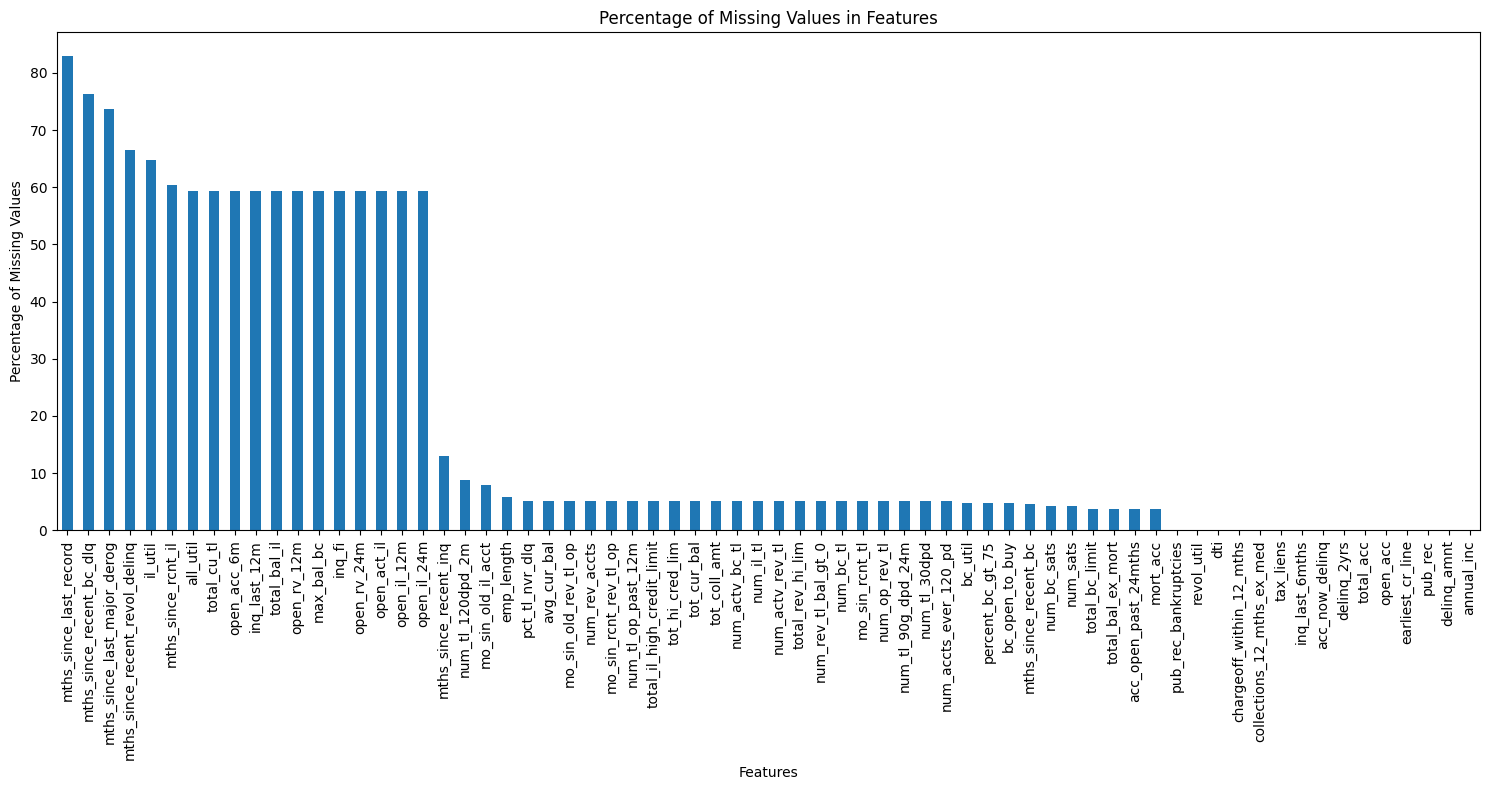

In [13]:
if not missing_percentage.empty:
    plt.figure(figsize=(15, 8))
    missing_percentage.sort_values(ascending=False).plot(kind='bar')
    plt.title('Percentage of Missing Values in Features')
    plt.xlabel('Features')
    plt.ylabel('Percentage of Missing Values')
    plt.tight_layout()
    plt.show()

else: 
    print("No features with missing values found.")

mths_since_last_record            82.954308
mths_since_recent_bc_dlq          76.309648
mths_since_last_major_derog       73.691958
mths_since_recent_revol_delinq    66.588832
il_util                           64.807319
mths_since_rcnt_il                60.384969
all_util                          59.296376
total_cu_tl                       59.292360
open_acc_6m                       59.292360
inq_last_12m                      59.292360
total_bal_il                      59.292287
open_rv_12m                       59.292287
max_bal_bc                        59.292287
inq_fi                            59.292287
open_rv_24m                       59.292287
open_act_il                       59.292287
open_il_12m                       59.292287
open_il_24m                       59.292287 

These all have rather high rates of missing values, and then a sharp drop to only 8% and lower for future features. Need further data cleaning for this to progress.

In [14]:
numerical_col = X.select_dtypes(include=np.number).columns.tolist()  # List of numerical features

In [15]:
X.describe()  # Descriptive statistics for numerical features

loan_amnt      int_rate   installment    annual_inc           dti  \
count  1.369566e+06  1.369566e+06  1.369566e+06  1.369562e+06  1.369168e+06   
mean   1.444877e+04  1.327911e+01  4.387593e+02  7.625009e+04  1.830368e+01   
std    8.737507e+03  4.784094e+00  2.620105e+02  7.031078e+04  1.131197e+01   
min    5.000000e+02  5.310000e+00  4.930000e+00  0.000000e+00 -1.000000e+00   
25%    8.000000e+03  9.750000e+00  2.488200e+02  4.570000e+04  1.179000e+01   
50%    1.200000e+04  1.279000e+01  3.754300e+02  6.500000e+04  1.762000e+01   
75%    2.000000e+04  1.602000e+01  5.815800e+02  9.000000e+04  2.408000e+01   
max    4.000000e+04  3.099000e+01  1.719830e+03  1.099920e+07  9.990000e+02   

        delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
count  1.369537e+06    1.369566e+06     1.369566e+06    1.369536e+06   
mean   3.182849e-01    6.961020e+02     7.001021e+02    6.616737e-01   
std    8.793355e-01    3.181422e+01     3.181487e+01    9.589296e-01   
min    0.000000e+00    6.100000e+02     6.140000e+02    0.000000e+00   
25%    0.000000e+00    6.700000e+02     6.740000e+02    0.000000e+00   
50%    0.000000e+00    6.900000e+02     6.940000e+02    0.000000e+00   
75%    0.000000e+00    7.100000e+02     7.140000e+02    1.000000e+00   
max    3.900000e+01    8.450000e+02     8.500000e+02    3.300000e+01   

       mths_since_last_record  ...  num_tl_90g_dpd_24m  num_tl_op_past_12m  \
count           233452.000000  ...        1.299290e+06        1.299290e+06   
mean                70.489008  ...        8.897398e-02        2.181829e+00   
std                 26.775387  ...        5.049559e-01        1.847542e+00   
min                  0.000000  ...        0.000000e+00        0.000000e+00   
25%                 53.000000  ...        0.000000e+00        1.000000e+00   
50%                 72.000000  ...        0.000000e+00        2.000000e+00   
75%                 90.000000  ...        0.000000e+00        3.000000e+00   
max                129.000000  ...        3.900000e+01        3.200000e+01   

       pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies     tax_liens  \
count    1.299136e+06      1.304949e+06          1.368201e+06  1.369461e+06   
mean     9.414833e+01      4.509469e+01          1.346630e-01  5.224464e-02   
std      8.767439e+00      3.601437e+01          3.781054e-01  4.012699e-01   
min      0.000000e+00      0.000000e+00          0.000000e+00  0.000000e+00   
25%      9.130000e+01      1.000000e+01          0.000000e+00  0.000000e+00   
50%      9.790000e+01      4.290000e+01          0.000000e+00  0.000000e+00   
75%      1.000000e+02      7.500000e+01          0.000000e+00  0.000000e+00   
max      1.000000e+02      1.000000e+02          1.200000e+01  8.500000e+01   

       tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  \
count     1.299290e+06       1.319536e+06    1.319536e+06   
mean      1.741578e+05       4.969534e+04    2.161657e+04   
std       1.779256e+05       4.778803e+04    2.154813e+04   
min       0.000000e+00       0.000000e+00    0.000000e+00   
25%       4.956700e+04       2.088100e+04    7.800000e+03   
50%       1.120000e+05       3.731100e+04    1.510000e+04   
75%       2.517538e+05       6.258500e+04    2.810000e+04   
max       9.999999e+06       3.408095e+06    1.105500e+06   

       total_il_high_credit_limit  
count                1.299290e+06  
mean                 4.218380e+04  
std                  4.330110e+04  
min                  0.000000e+00  
25%                  1.475400e+04  
50%                  3.171800e+04  
75%                  5.670900e+04  
max                  2.101913e+06  

[8 rows x 72 columns]

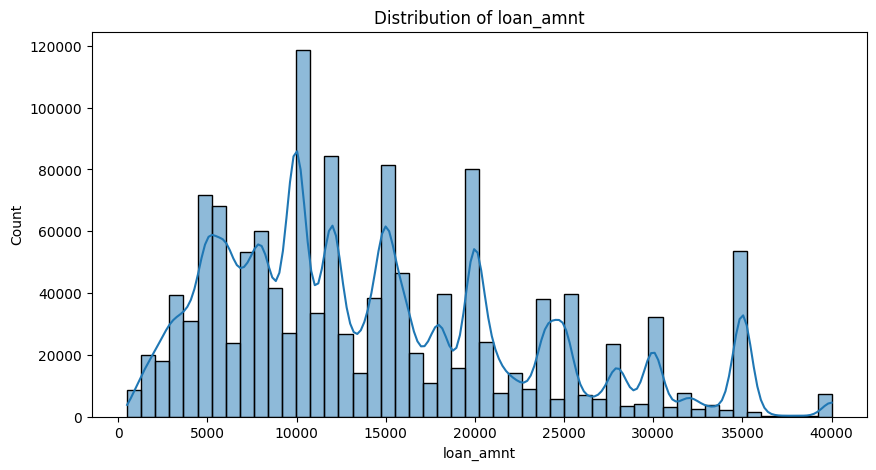

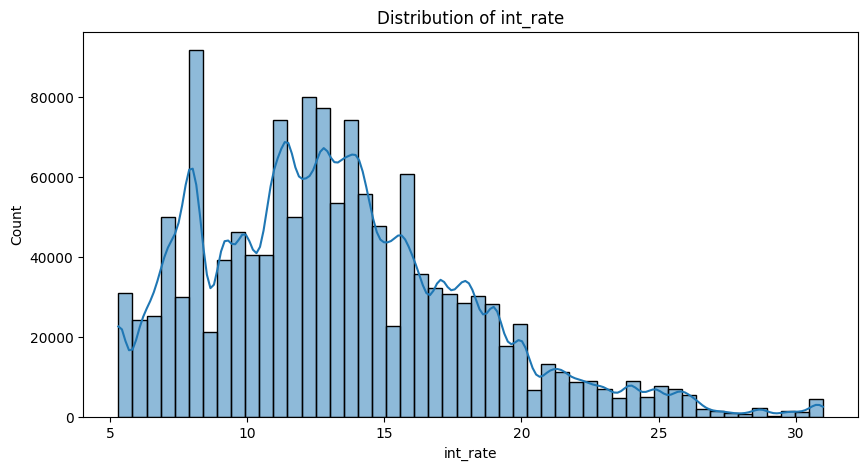

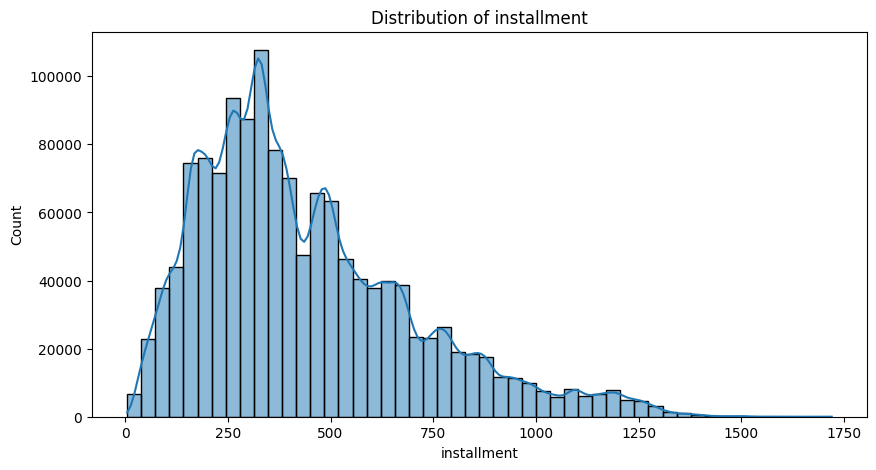

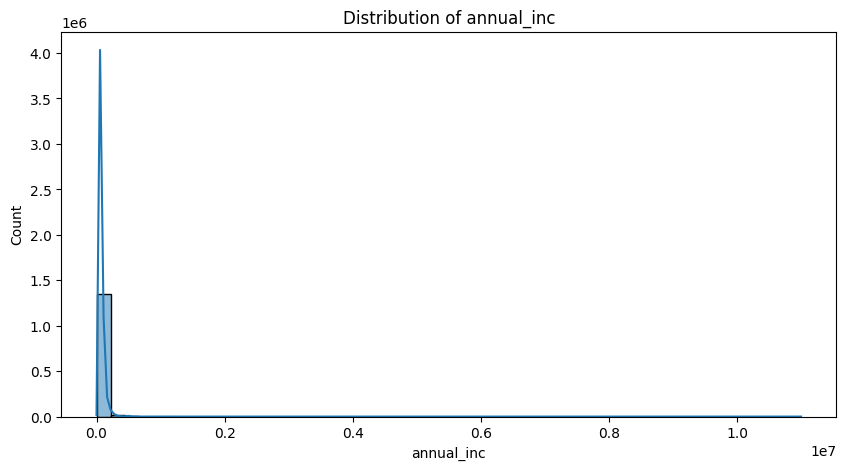

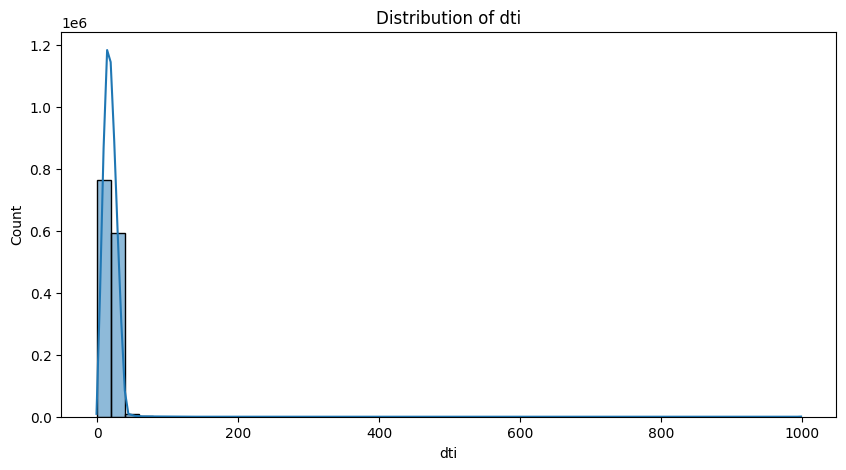

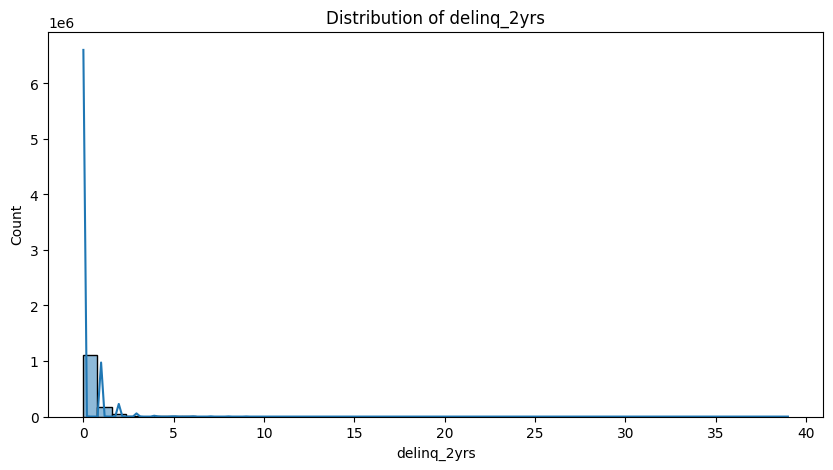

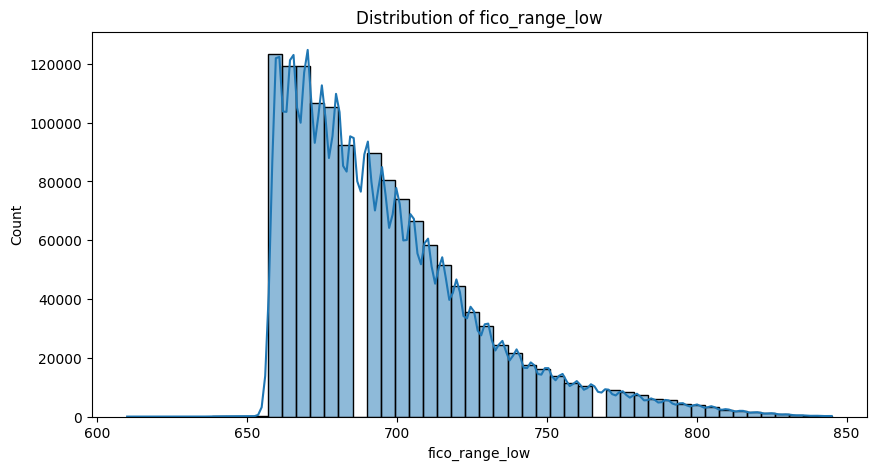

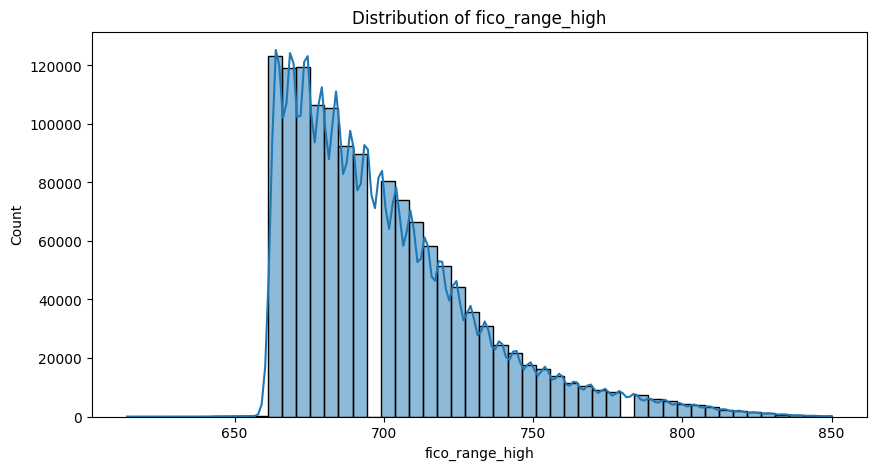

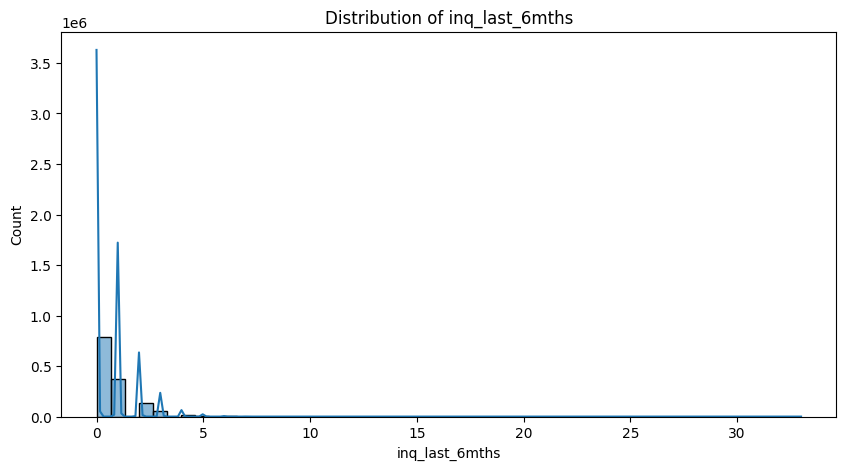

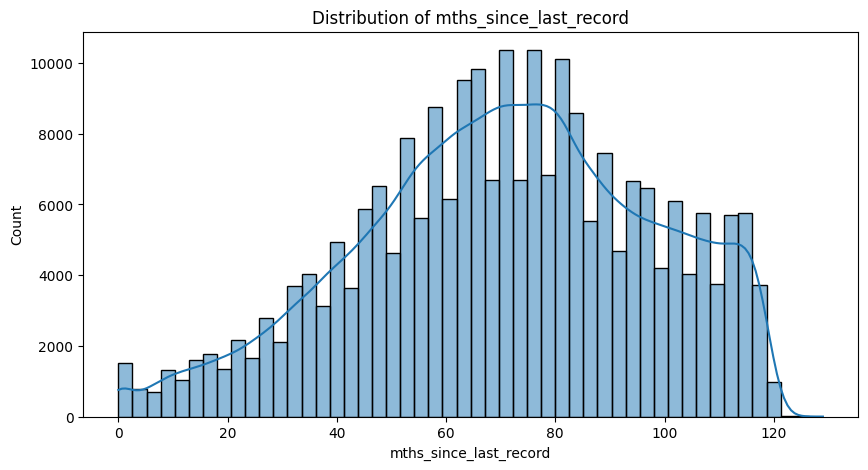

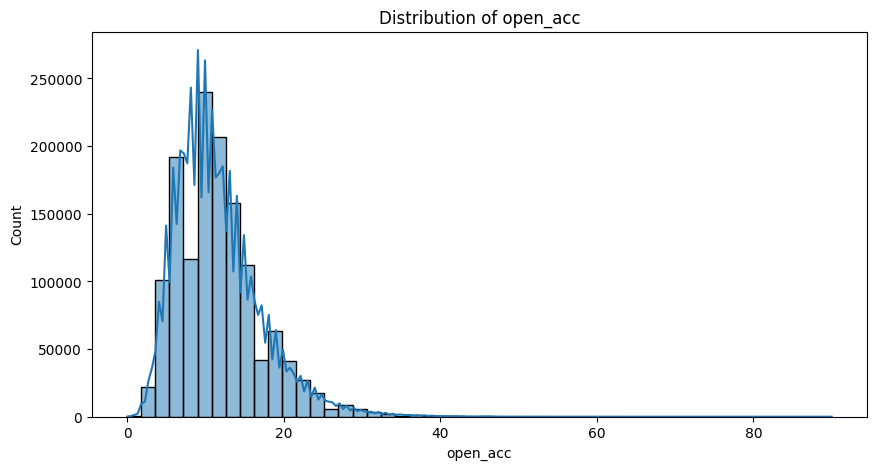

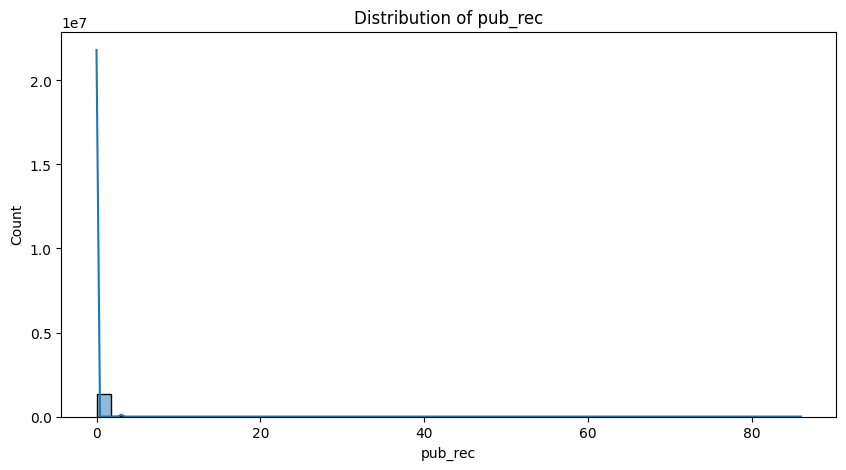

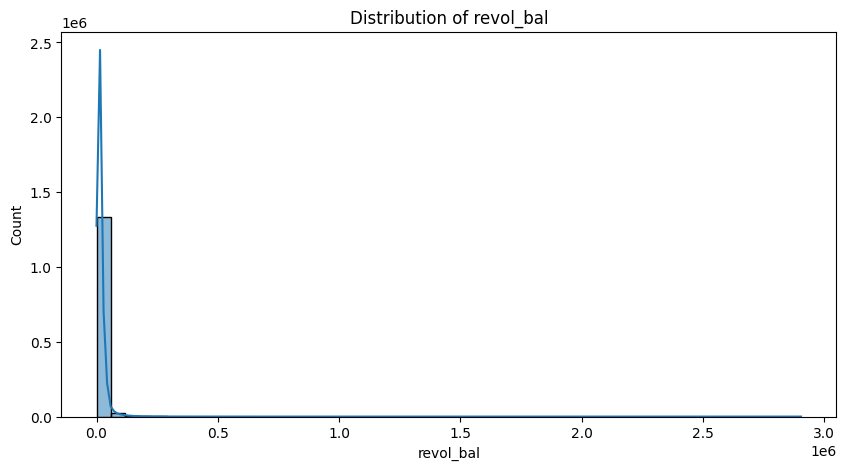

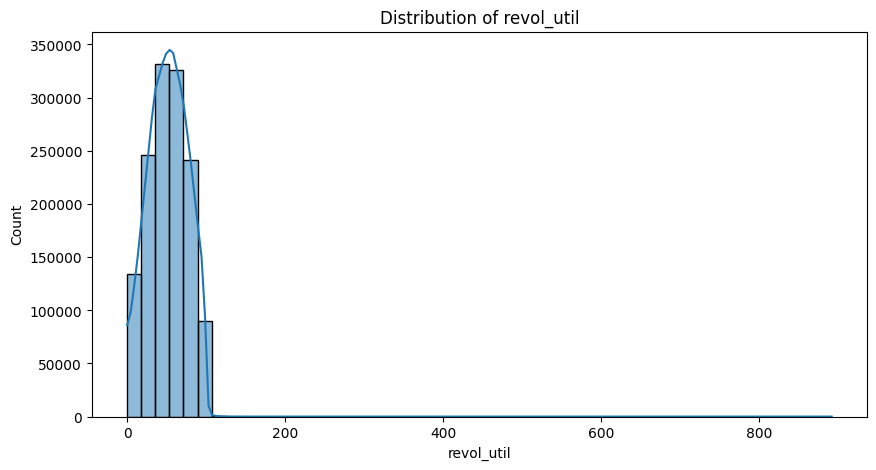

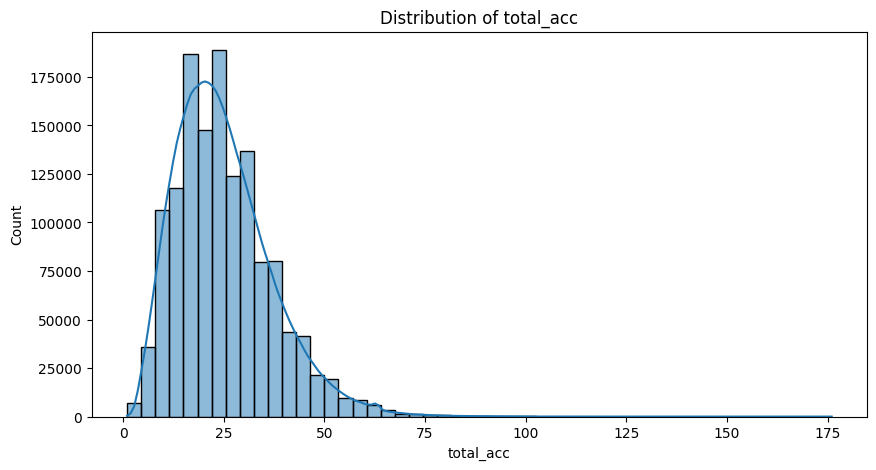

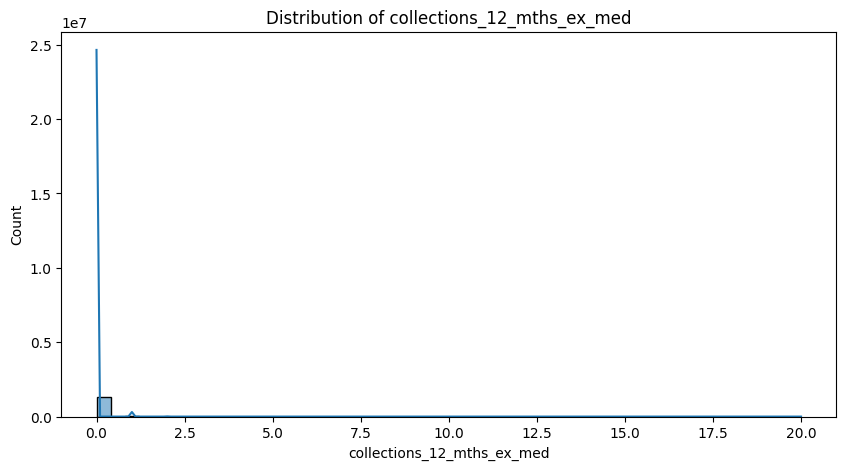

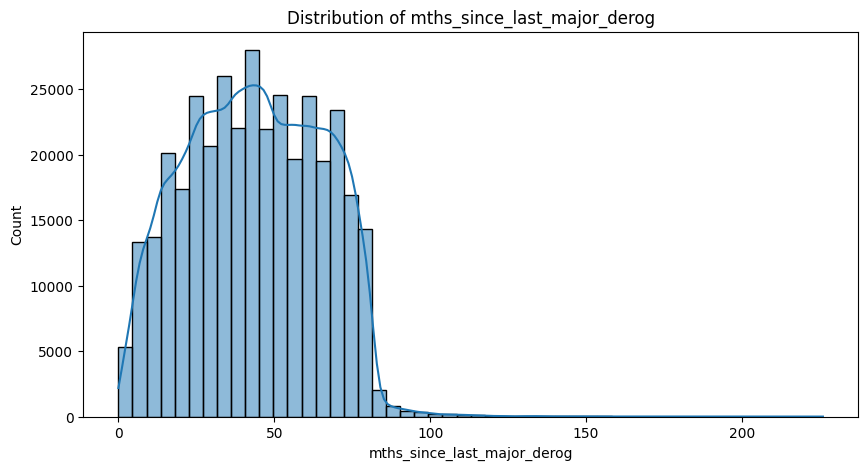

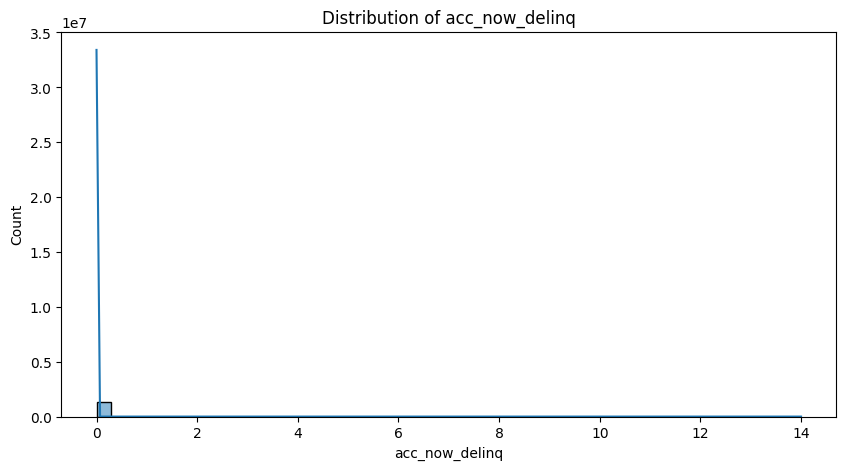

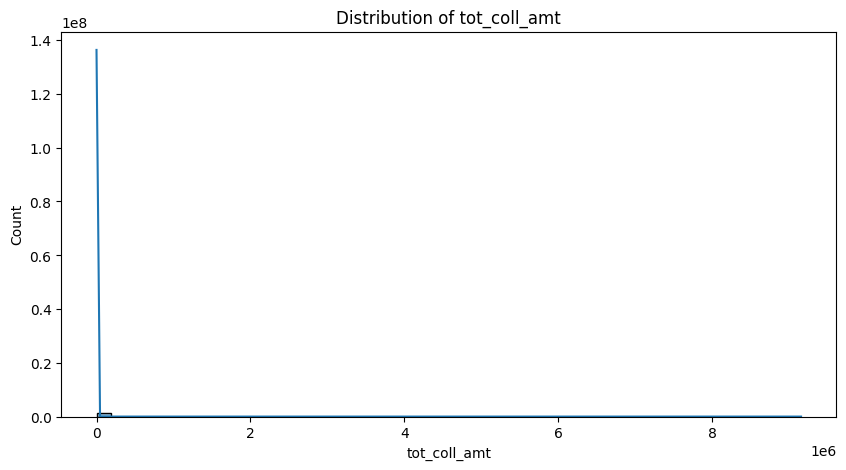

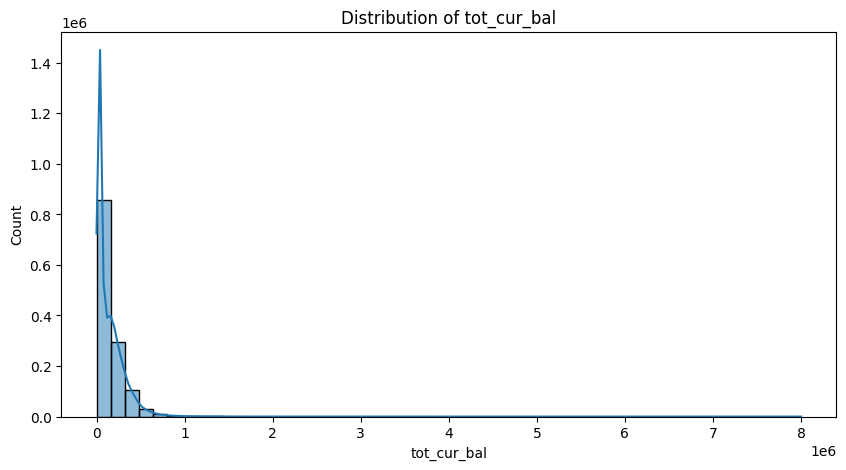

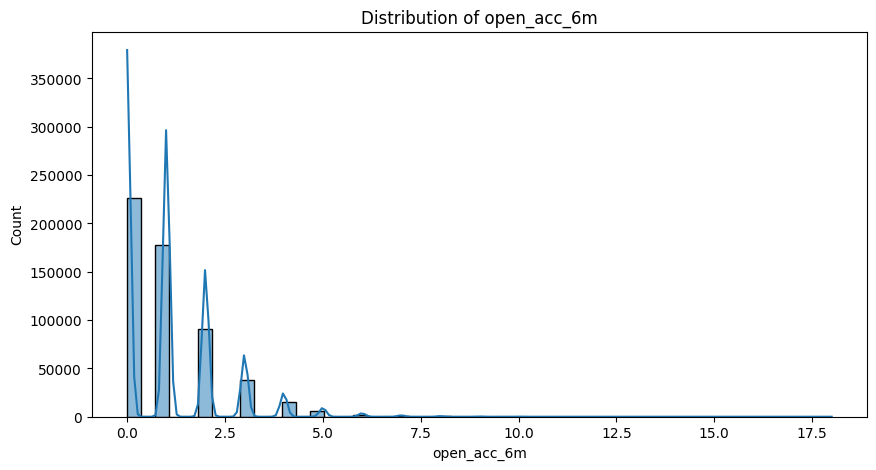

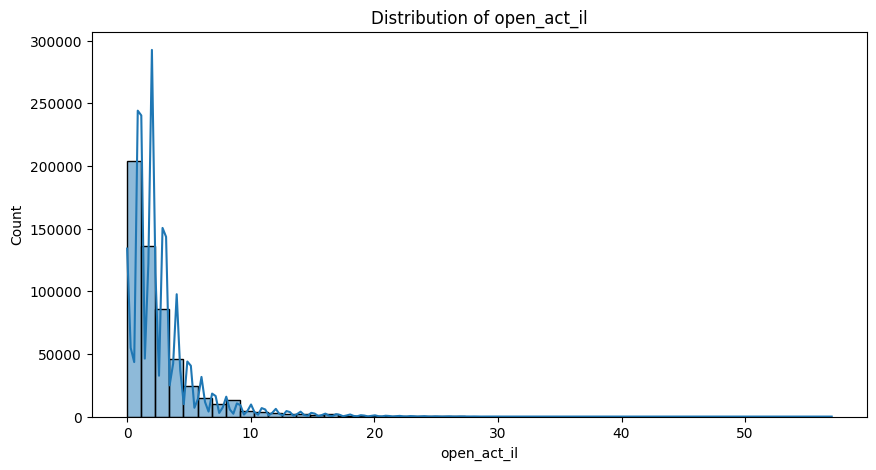

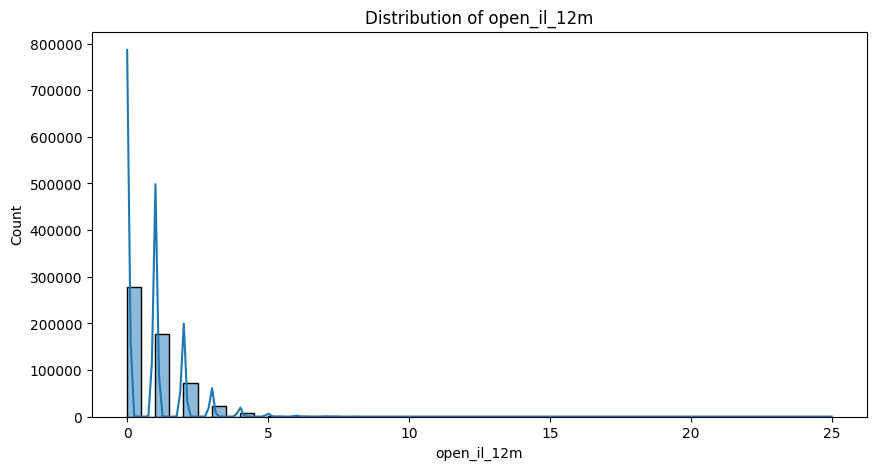

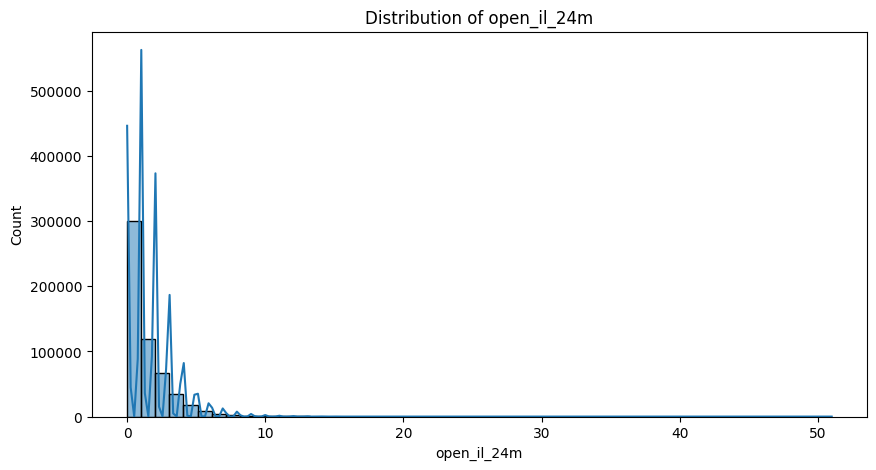

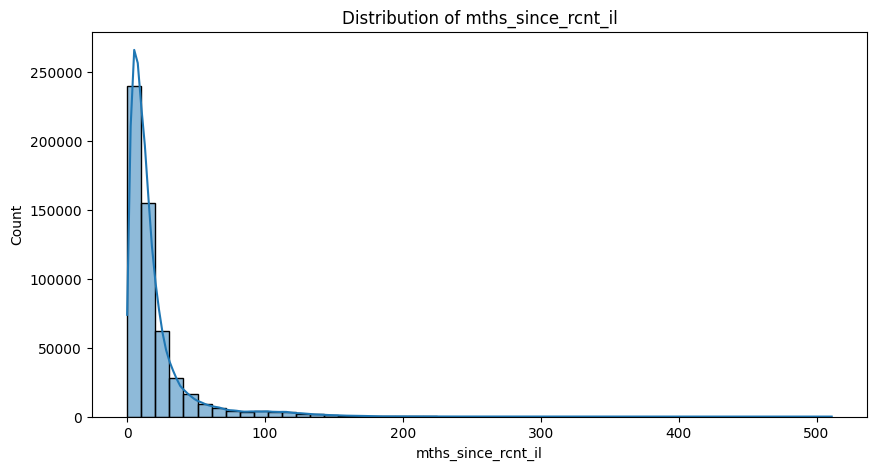

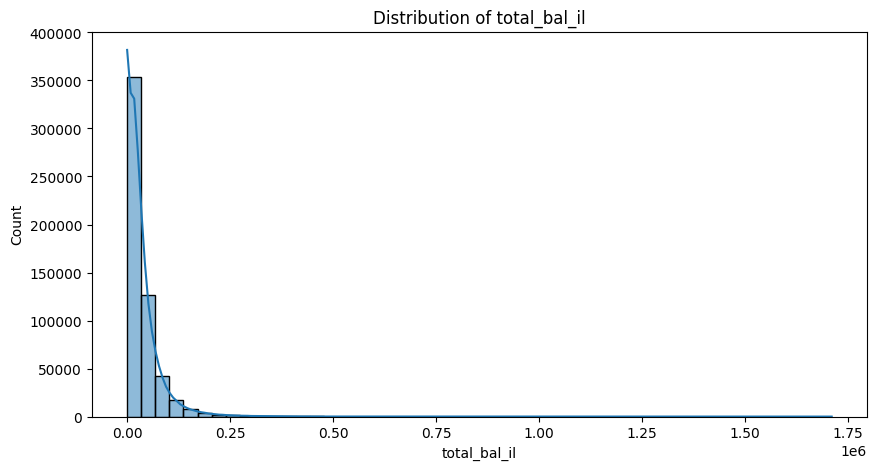

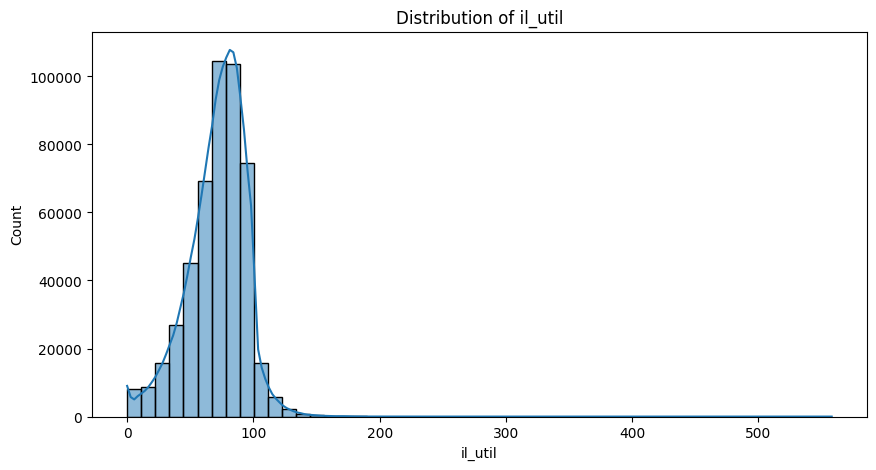

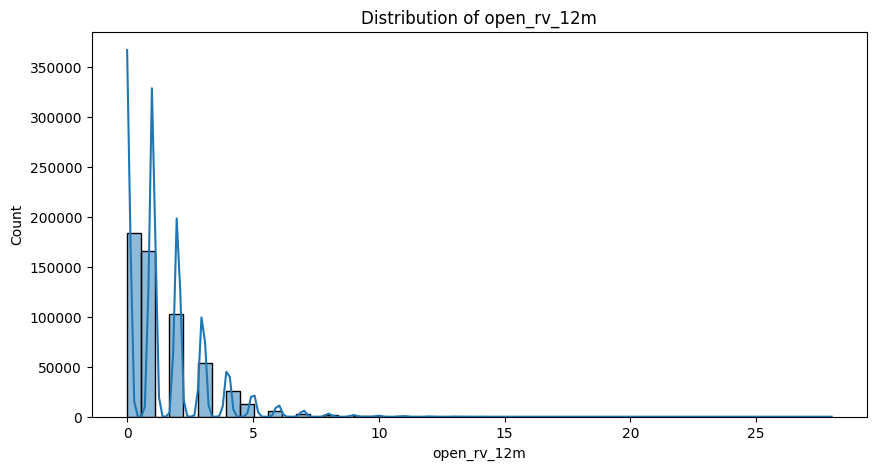

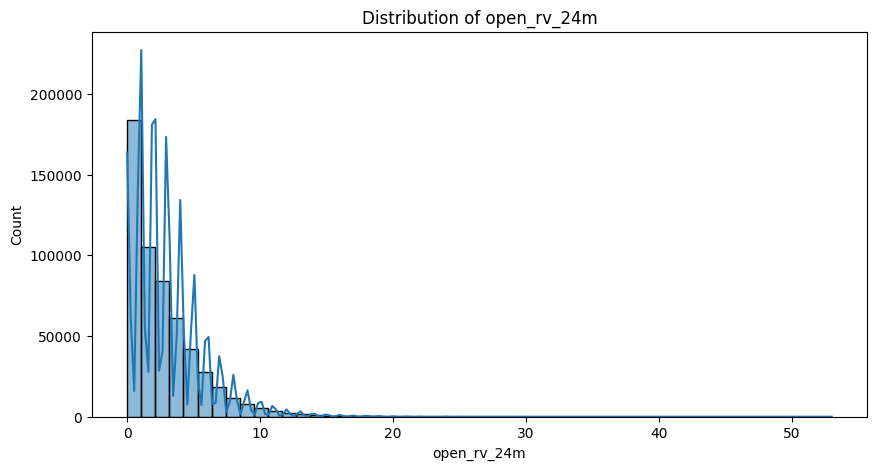

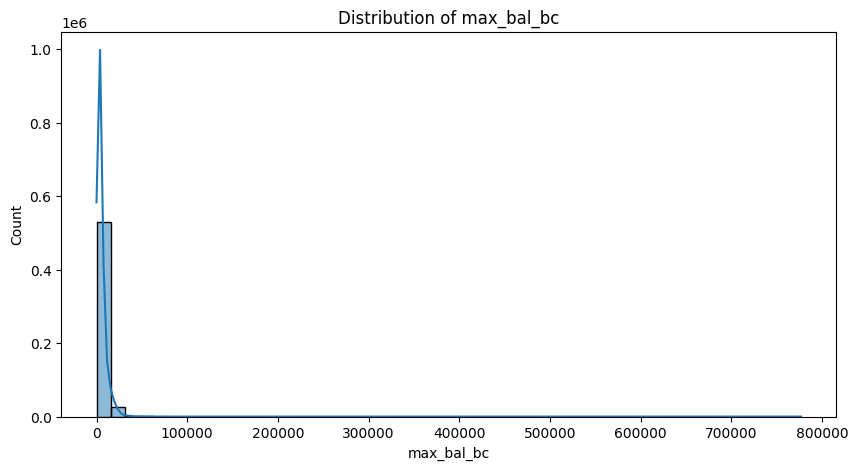

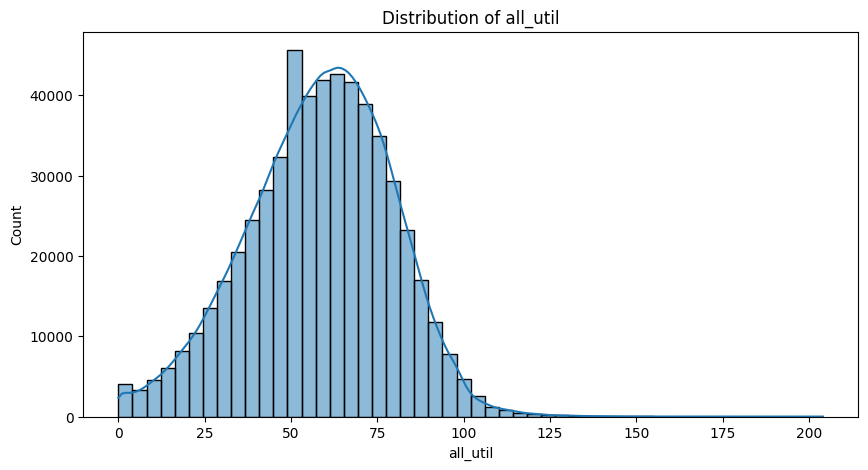

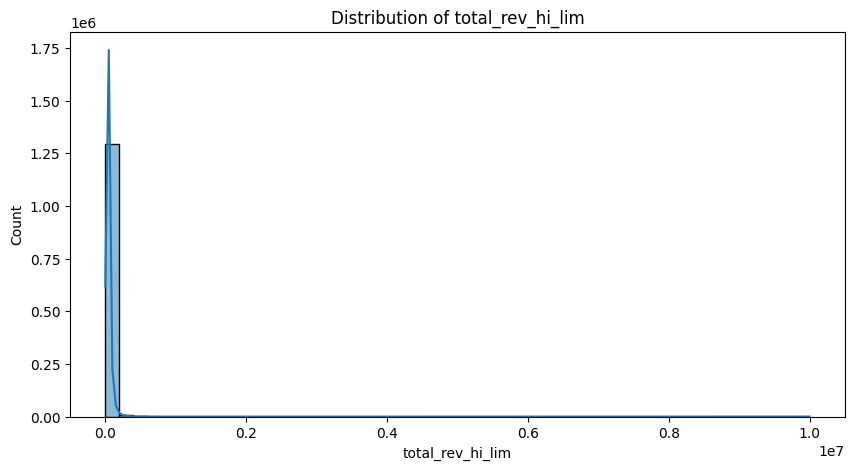

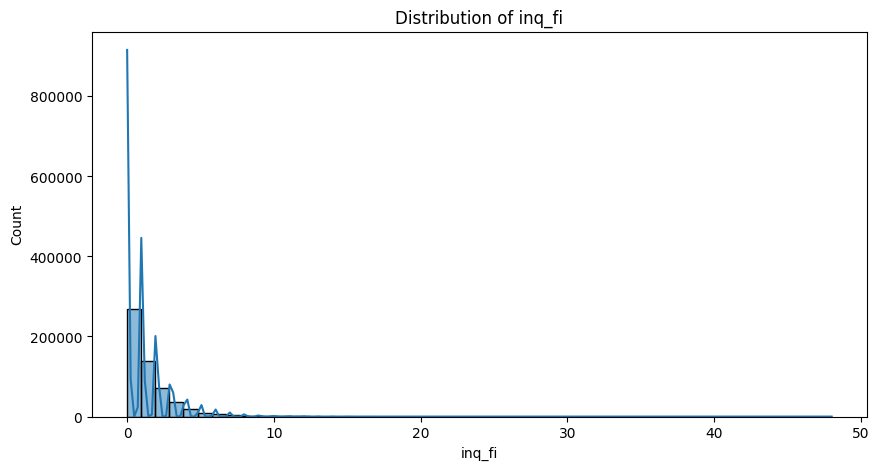

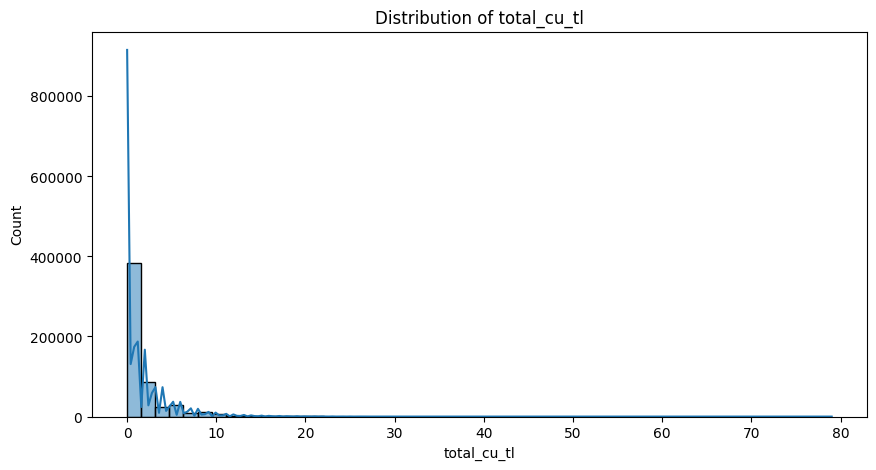

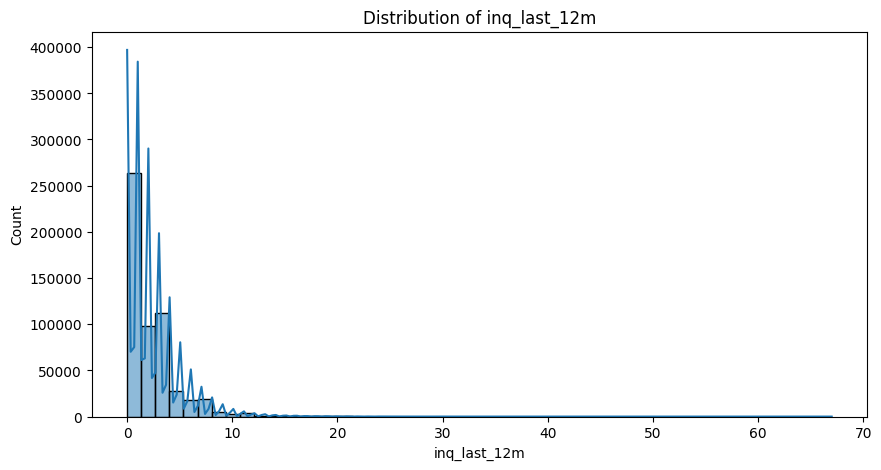

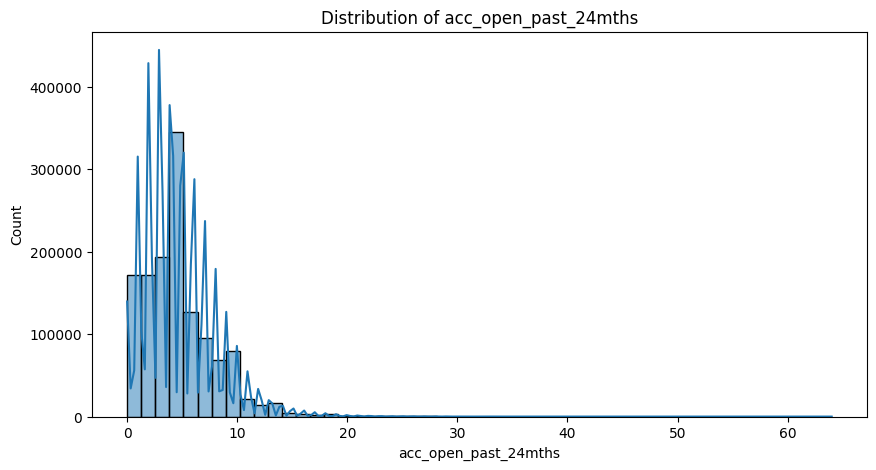

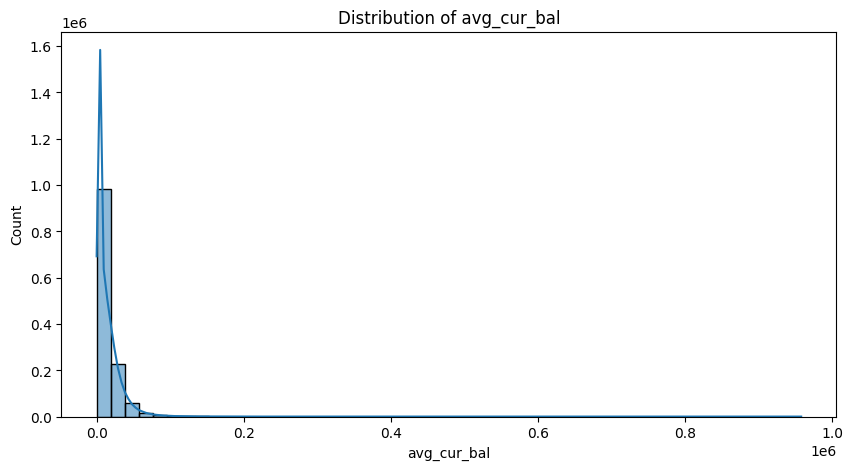

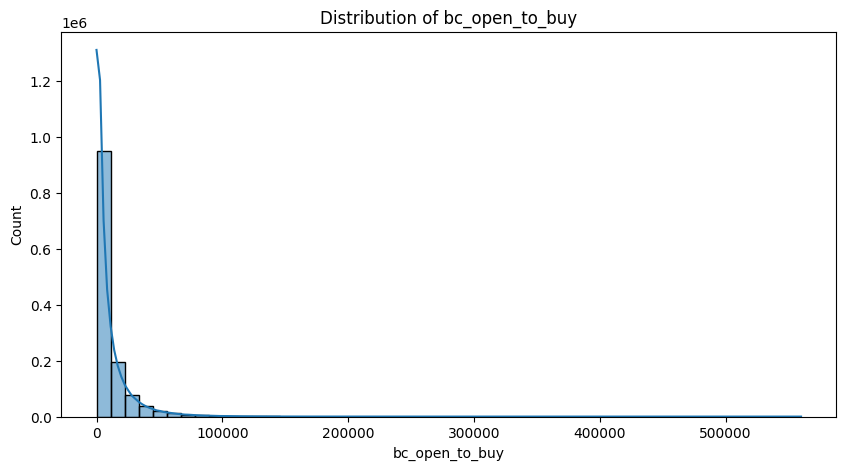

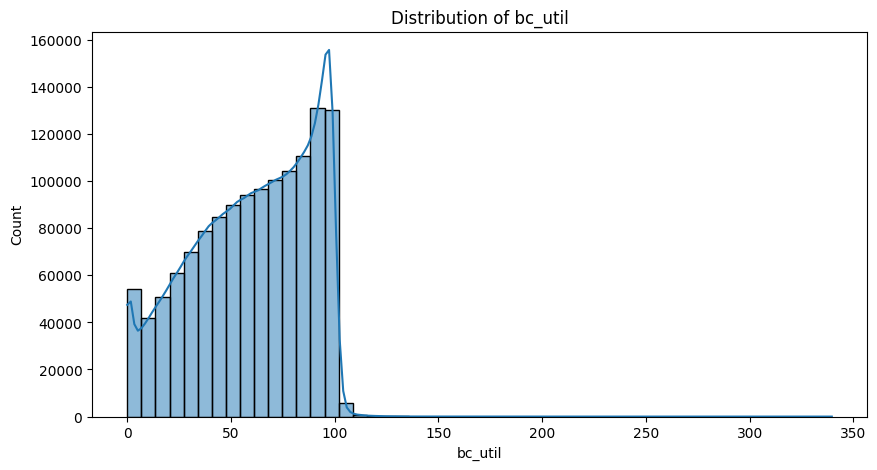

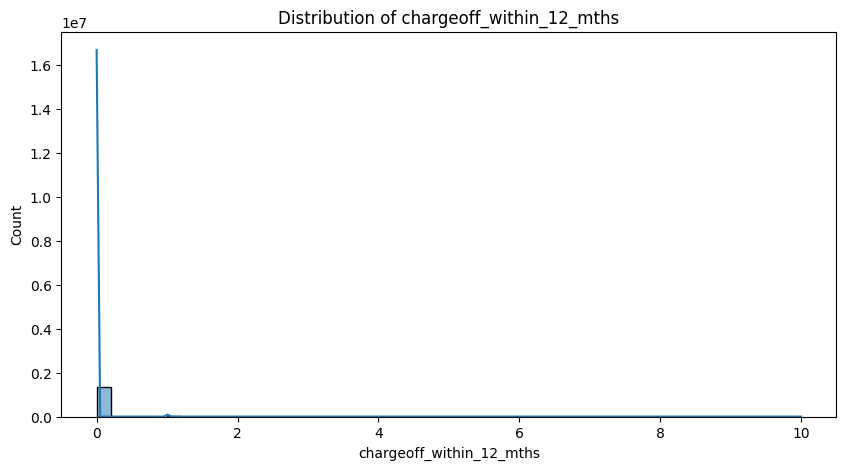

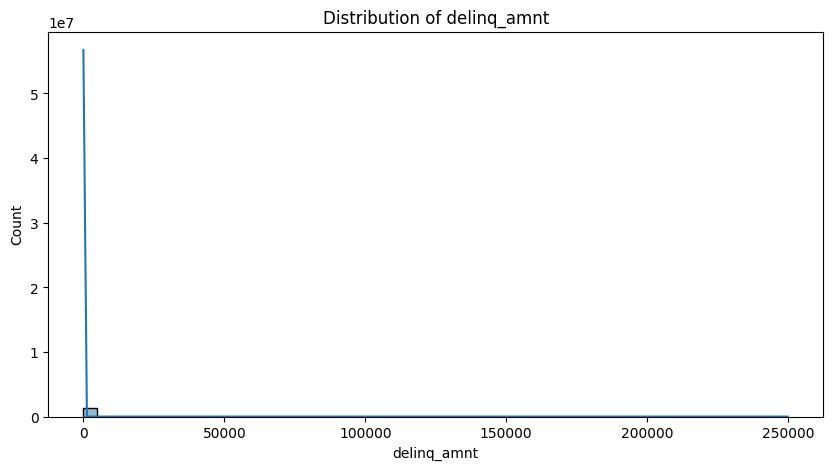

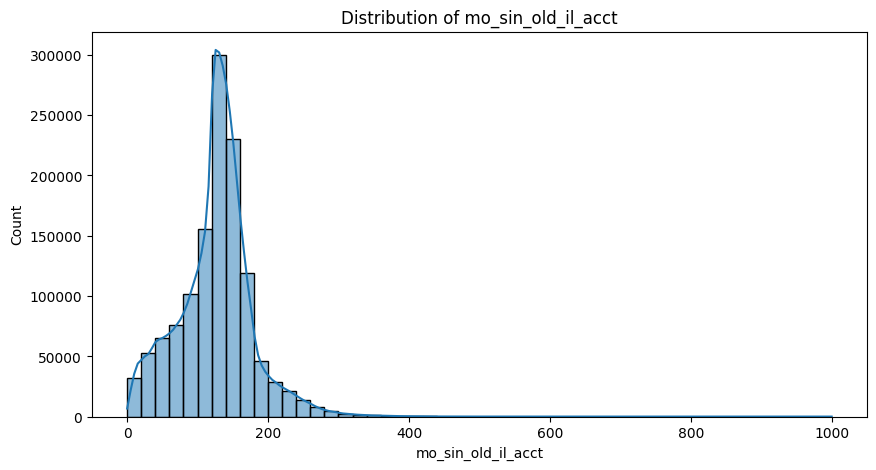

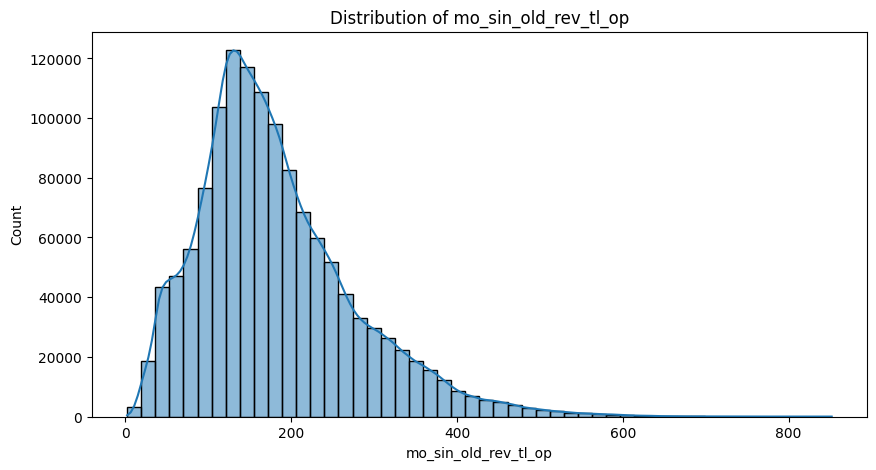

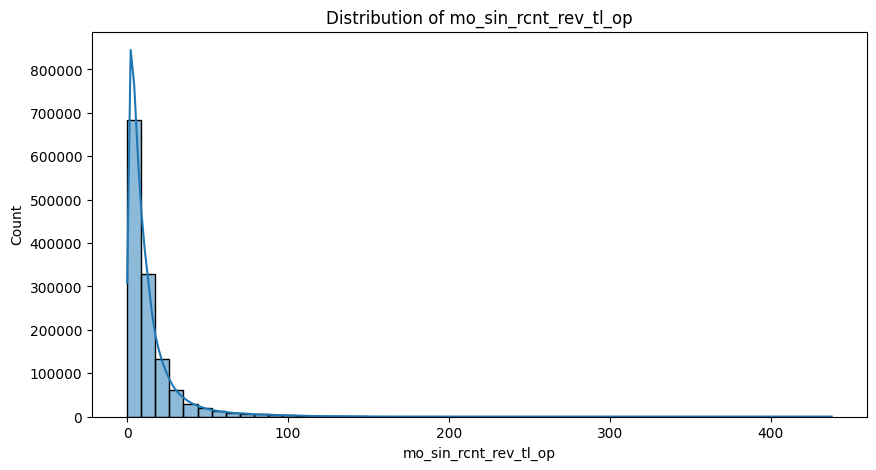

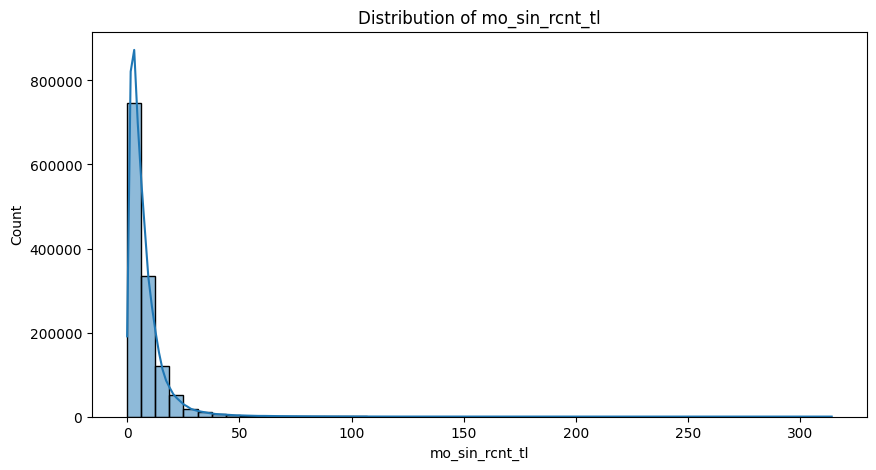

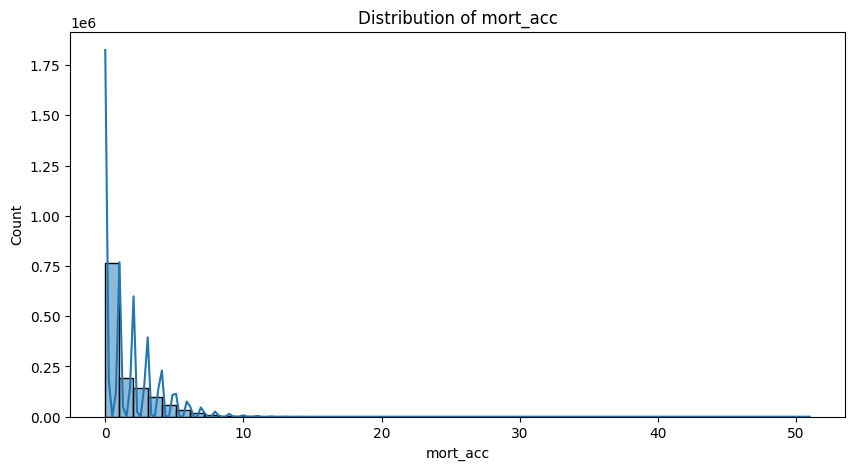

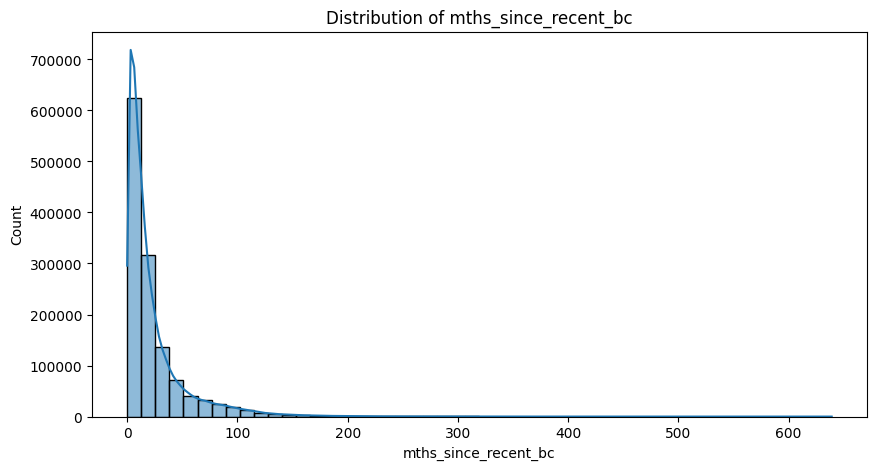

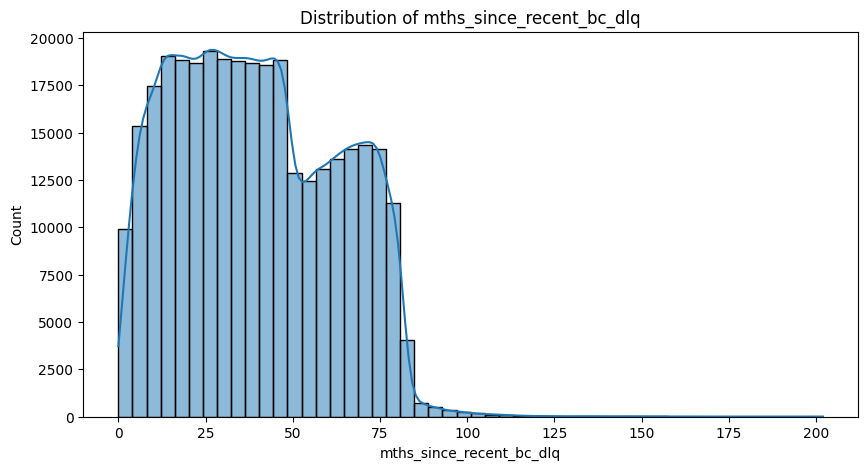

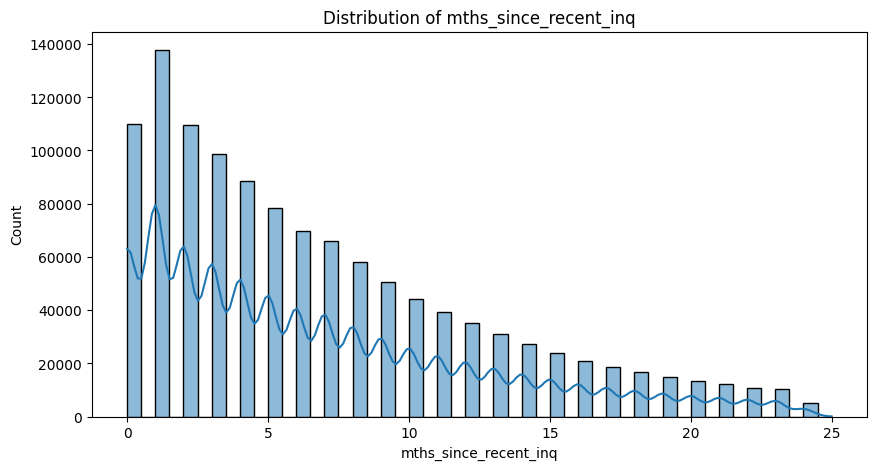

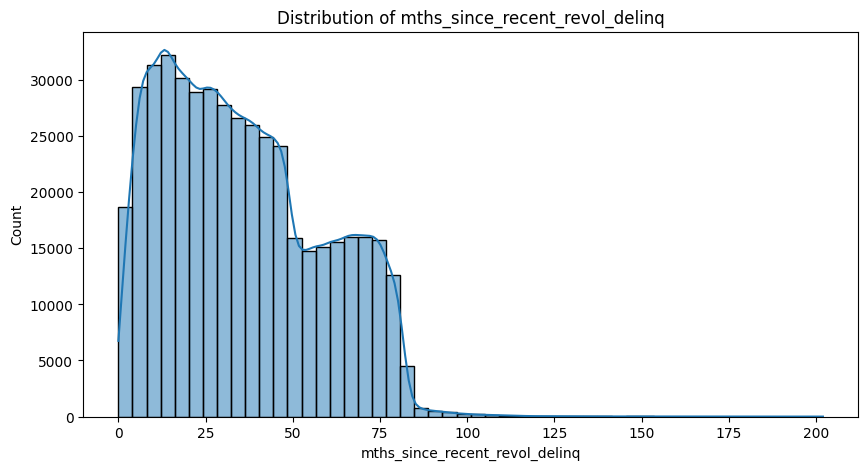

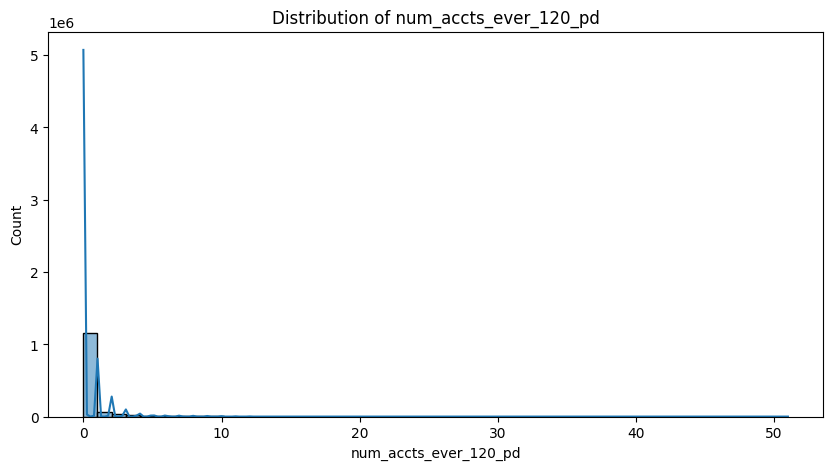

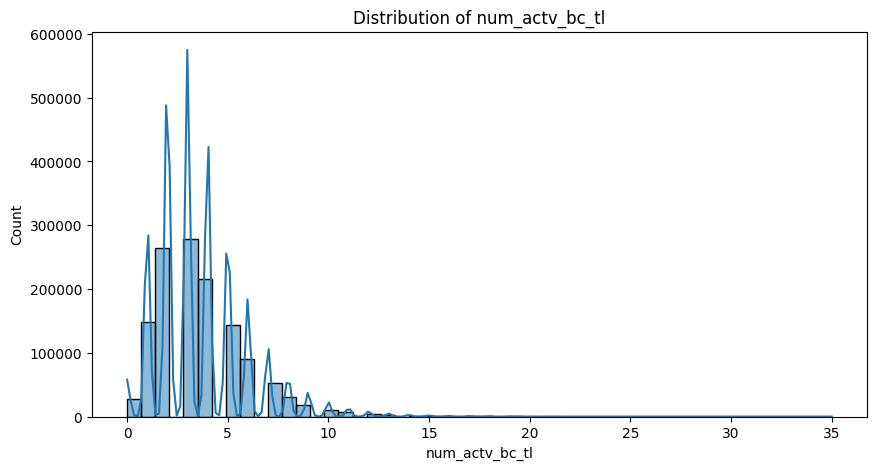

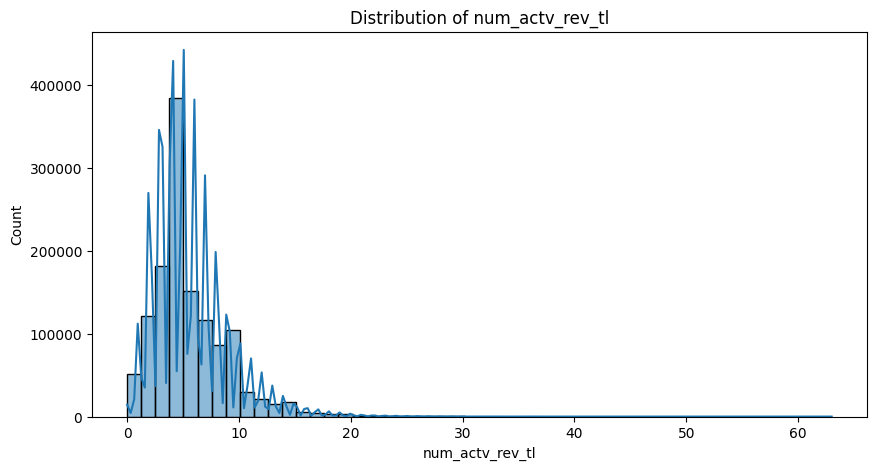

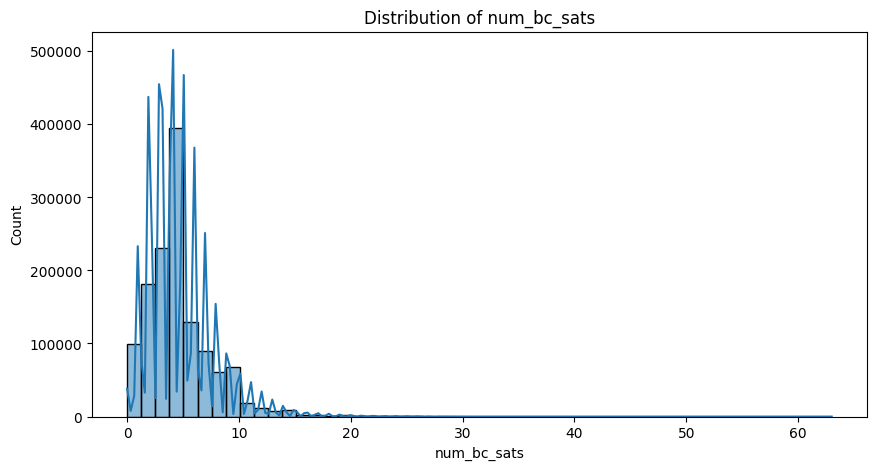

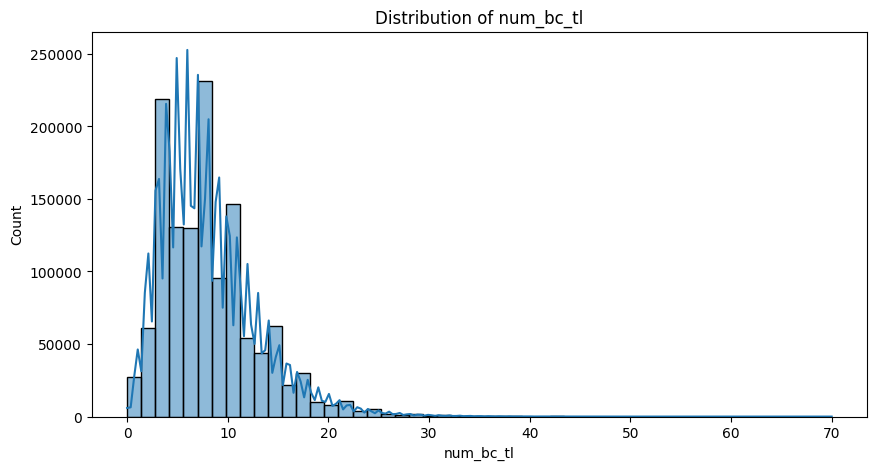

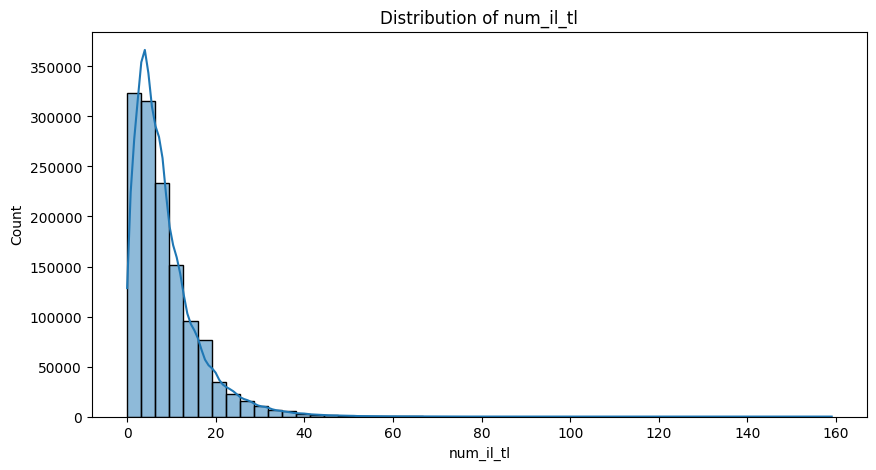

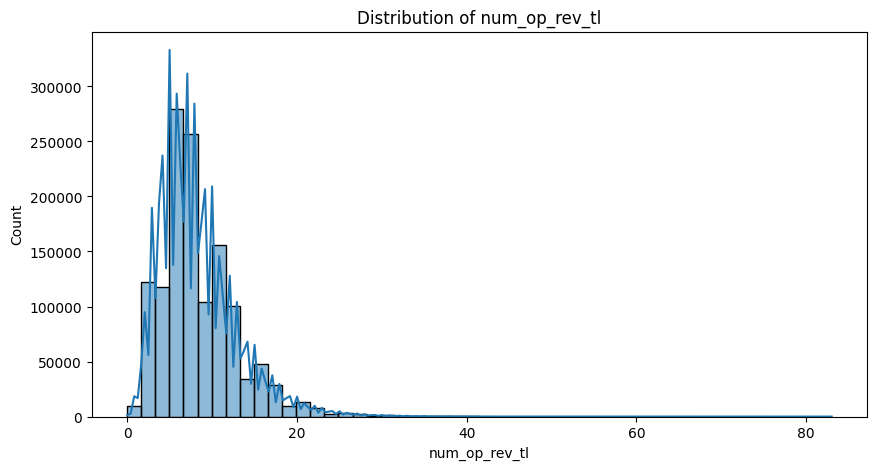

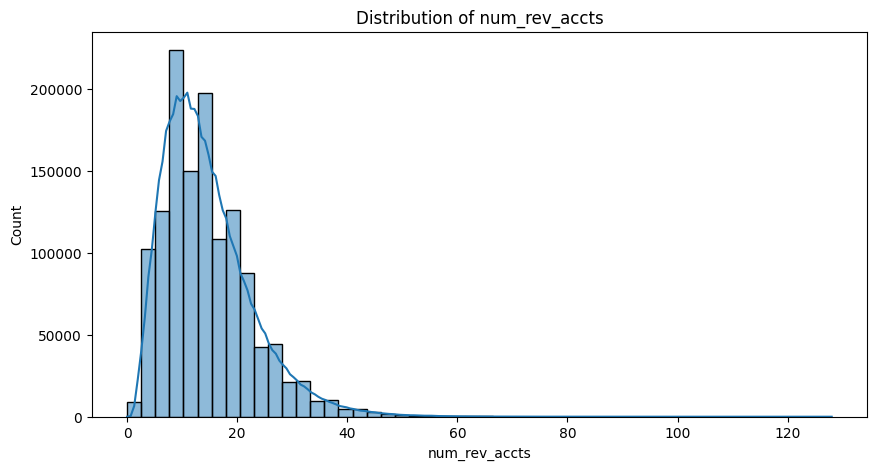

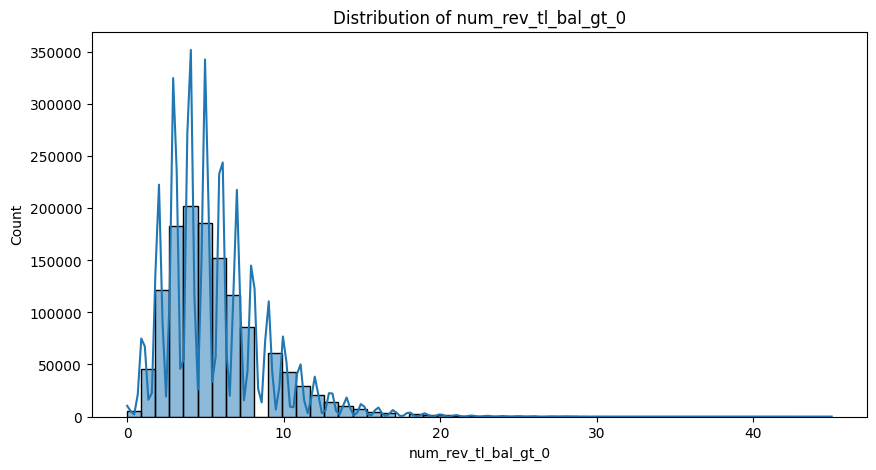

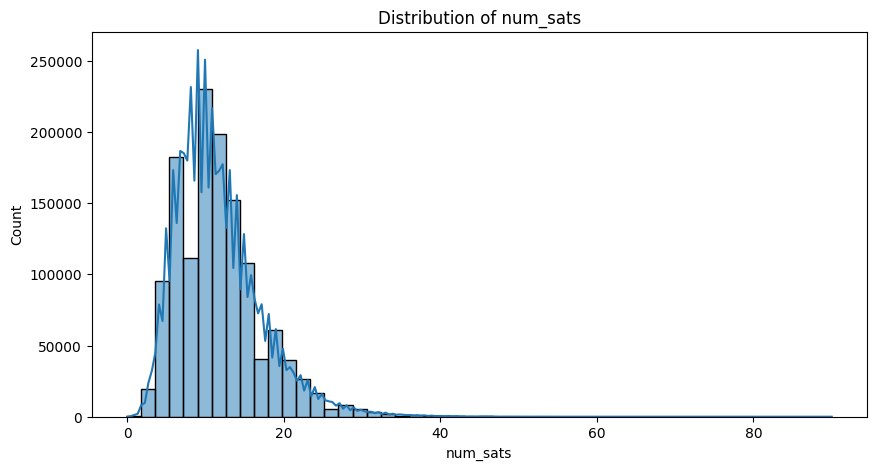

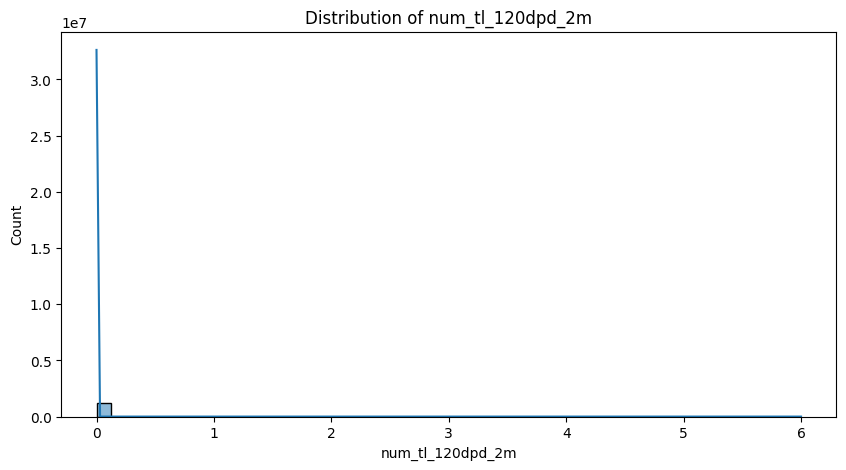

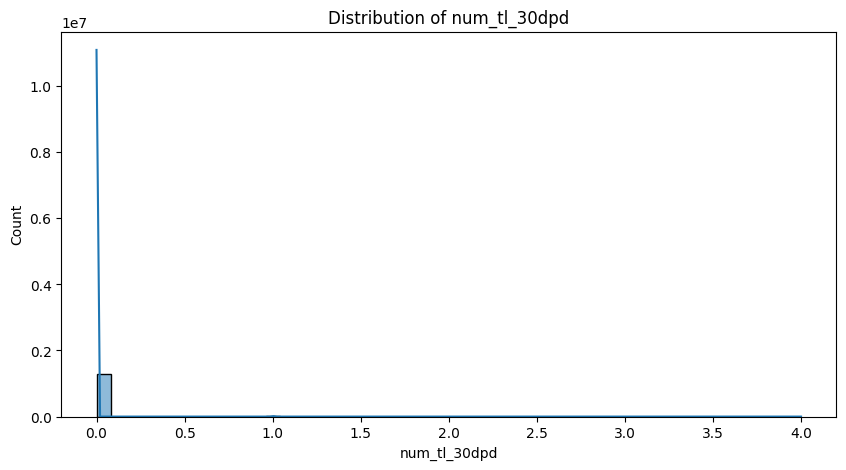

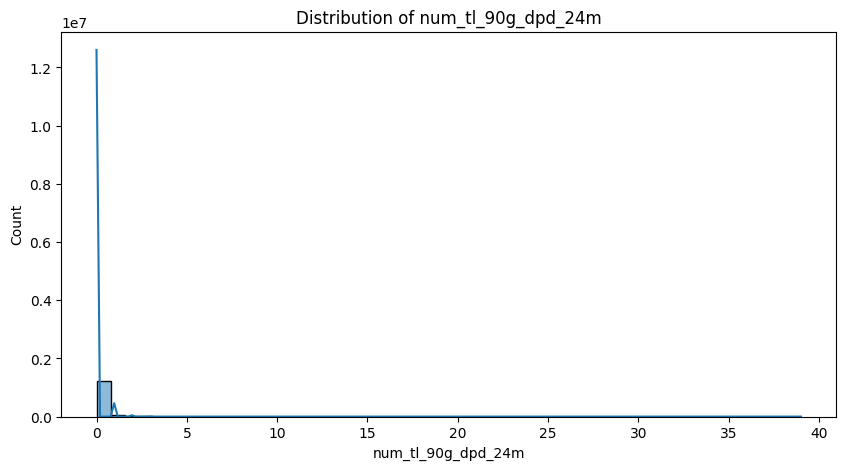

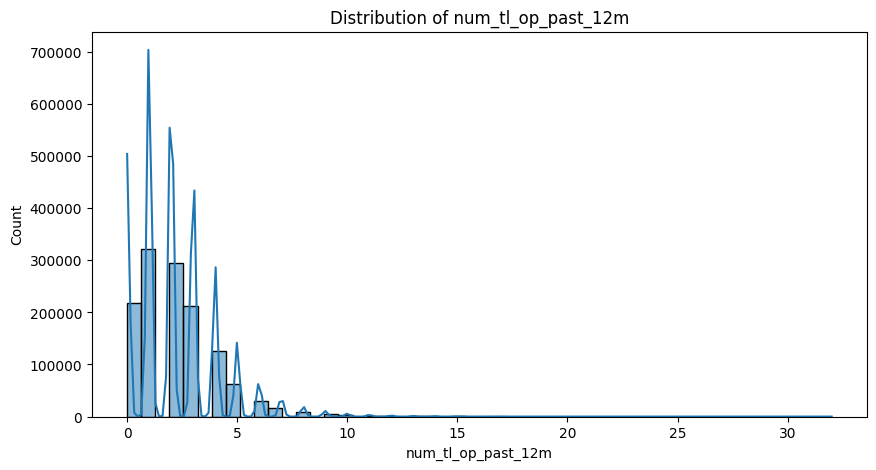

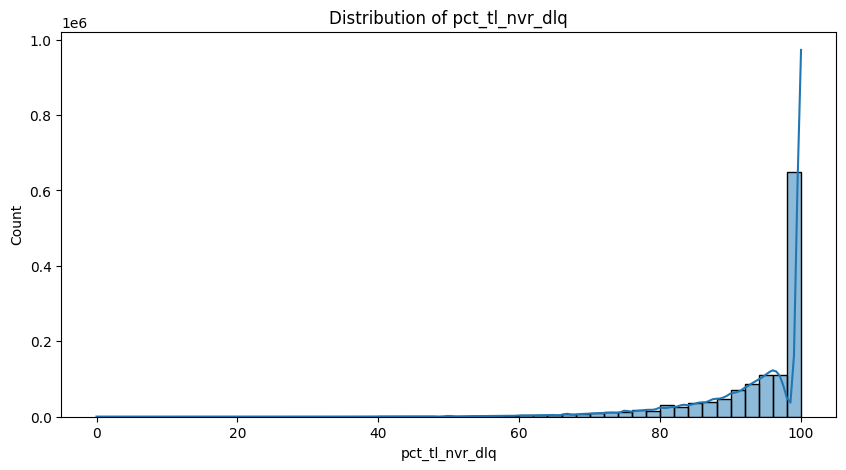

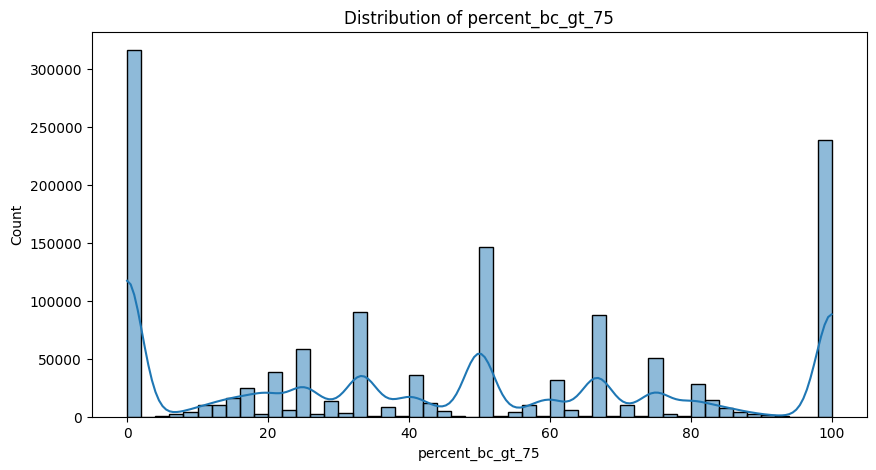

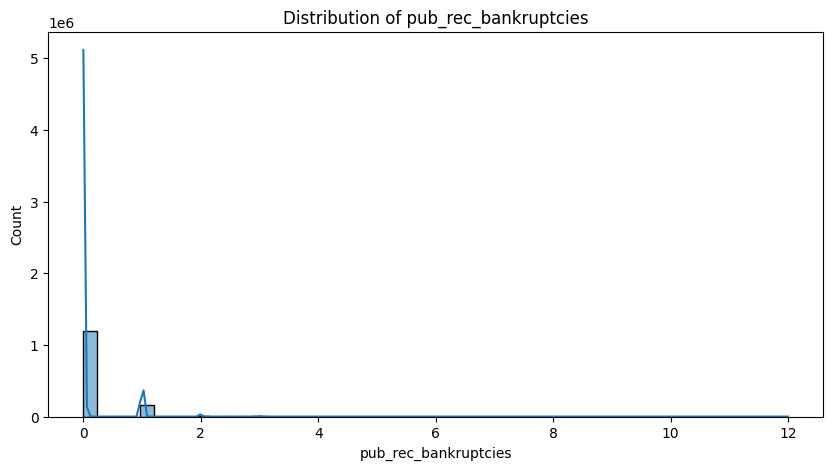

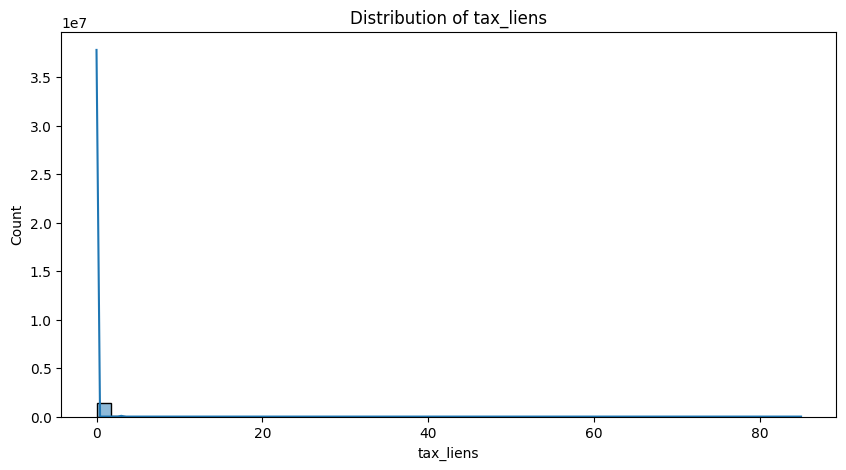

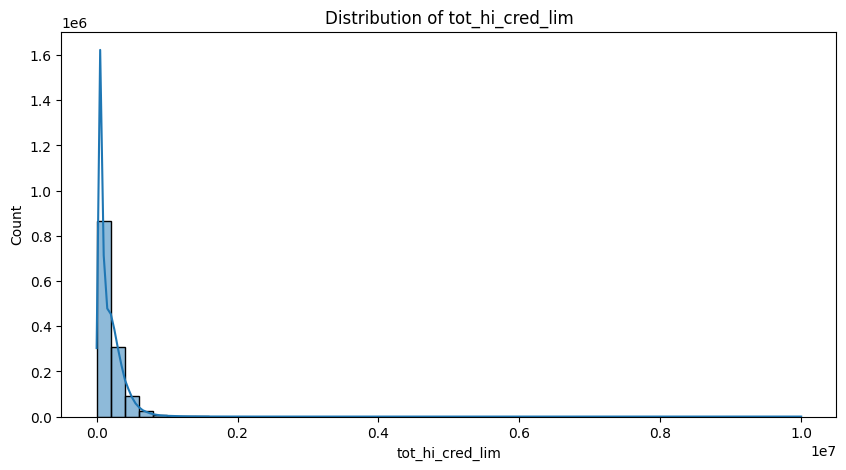

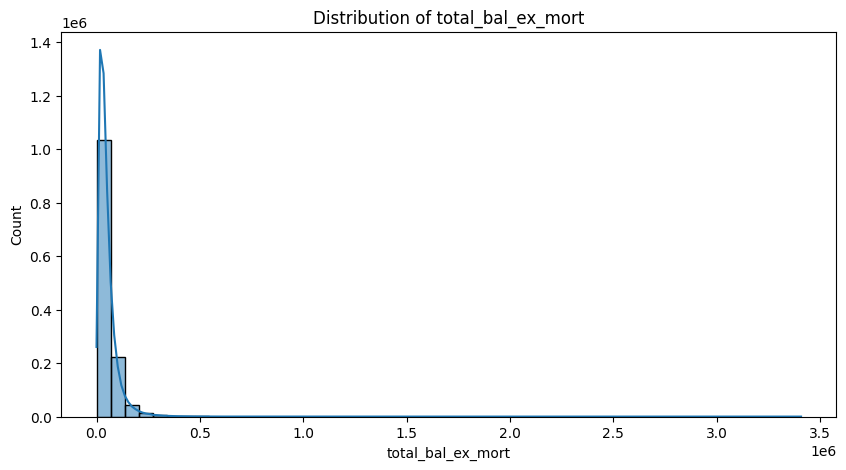

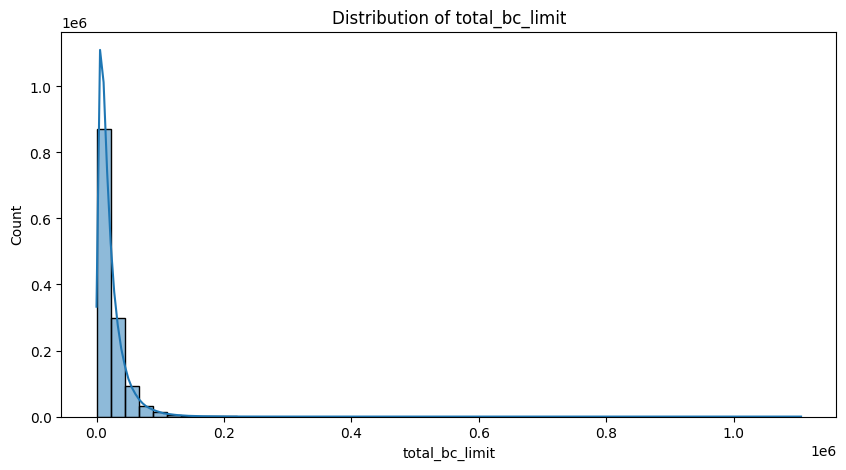

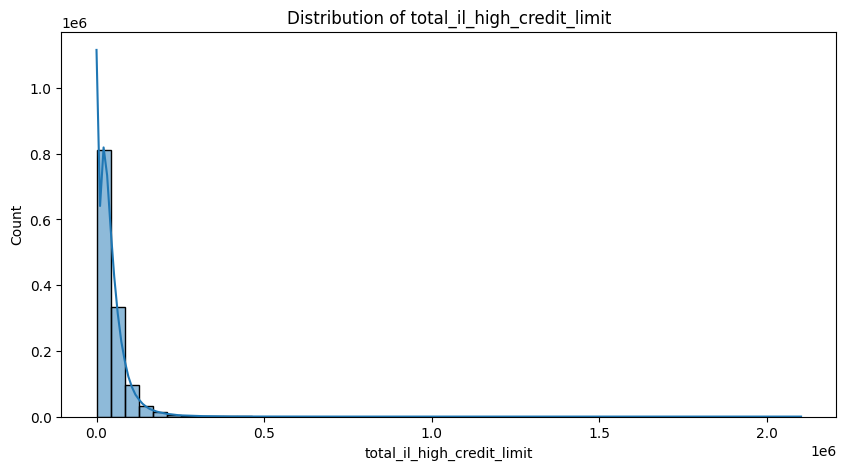

In [ ]:
for col in numerical_col:
    if col in X.columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(X[col].dropna(), bins=50, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()



Large Amount of Features that have a graph that's just a line straight up and down with little data after. Maybe needs to be purged.

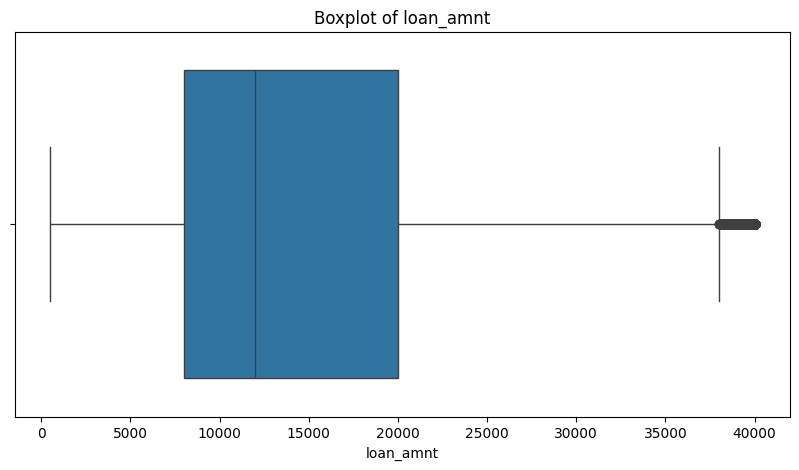

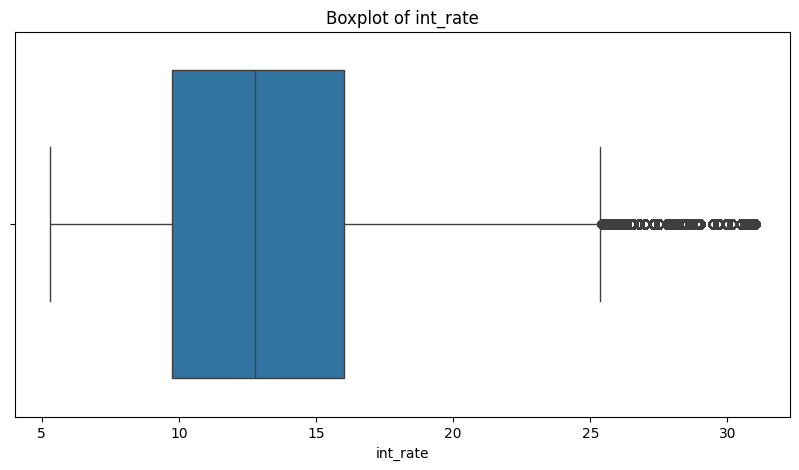

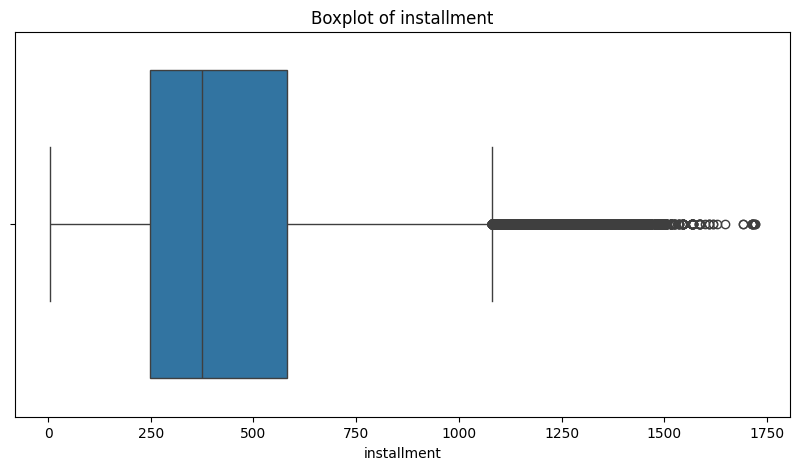

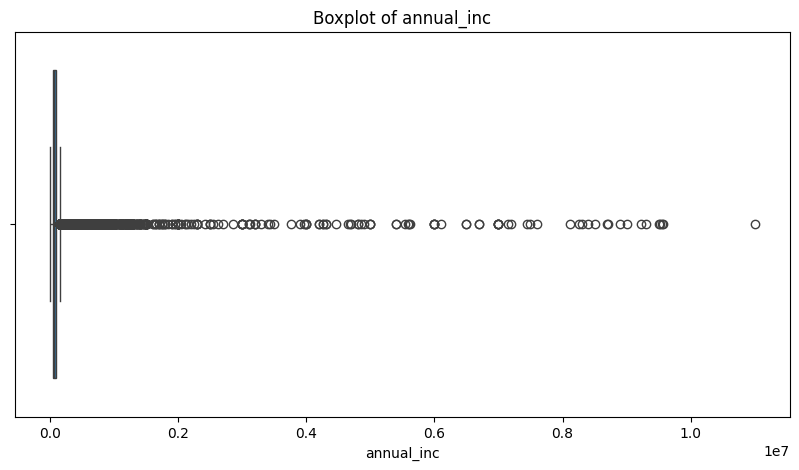

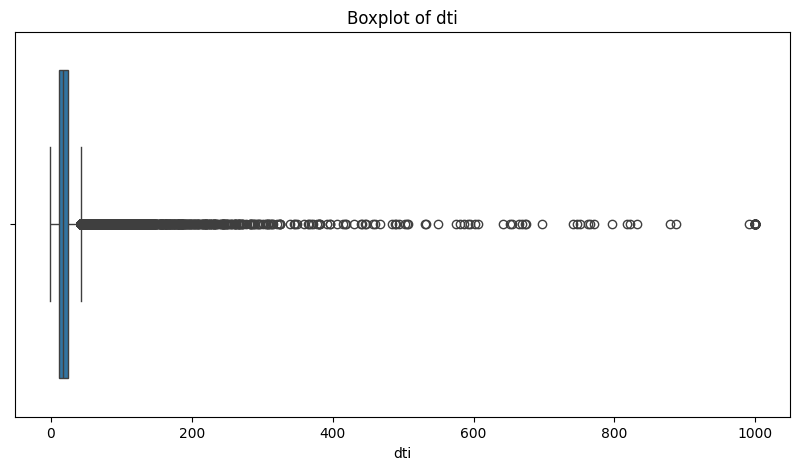

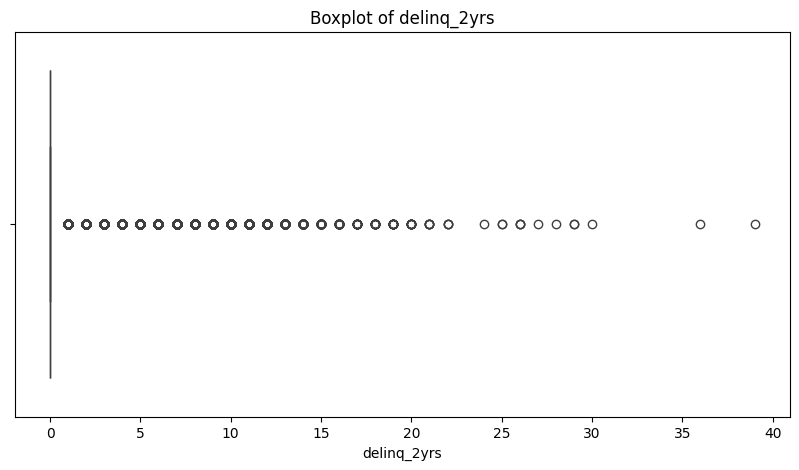

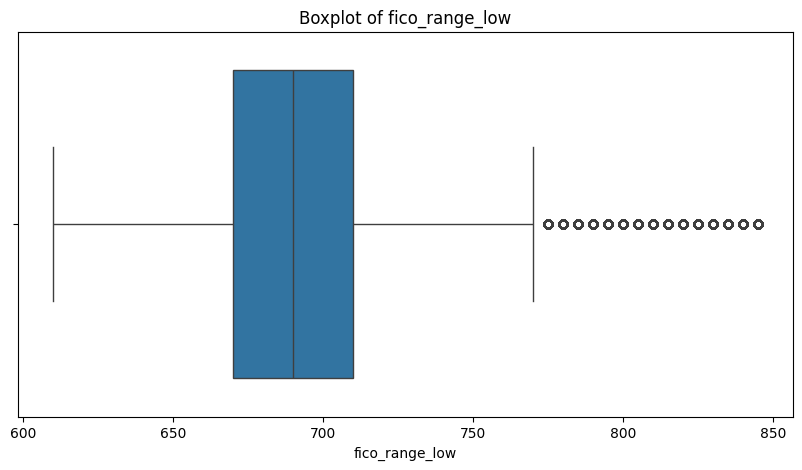

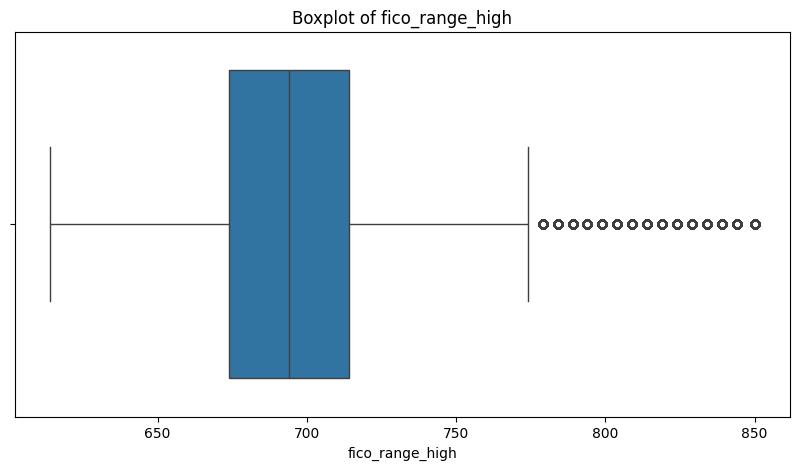

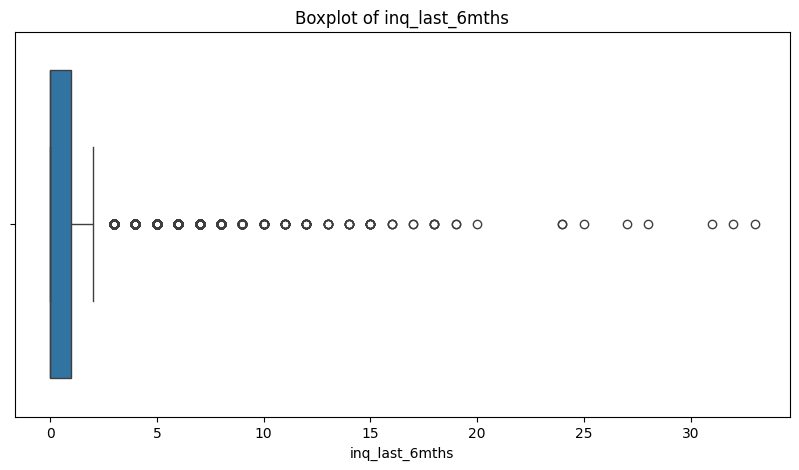

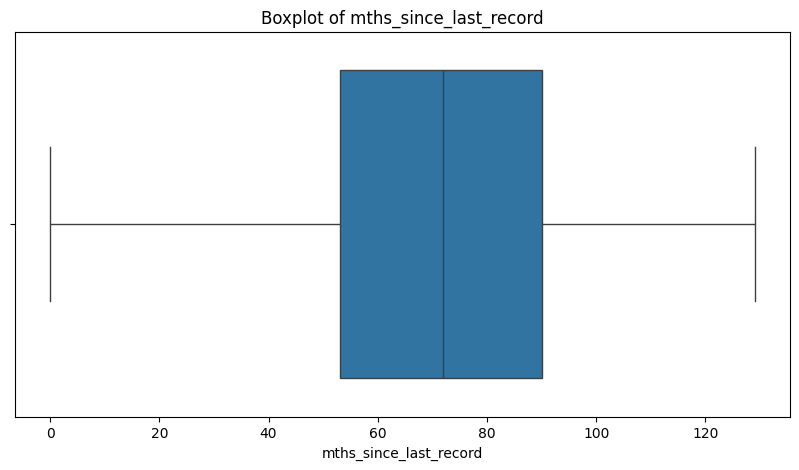

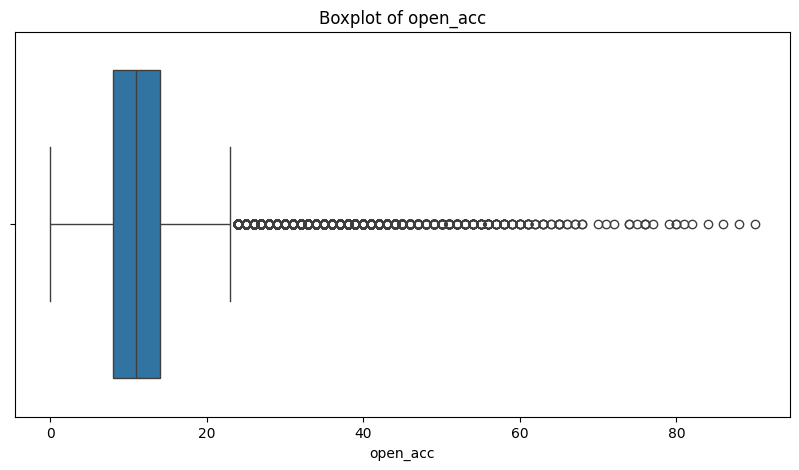

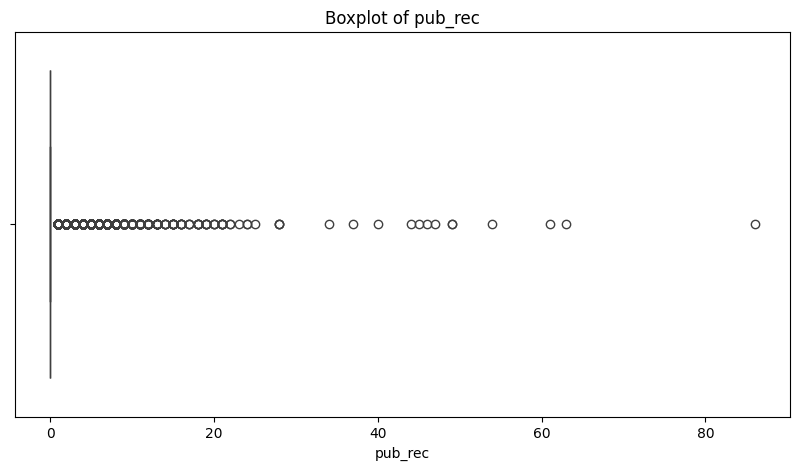

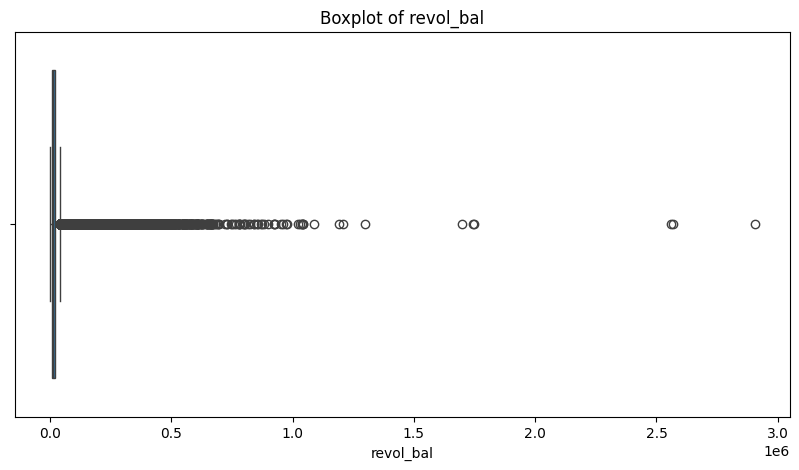

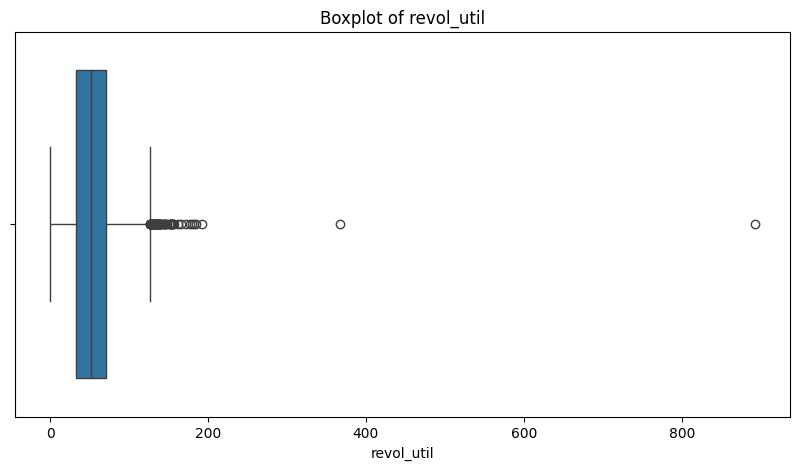

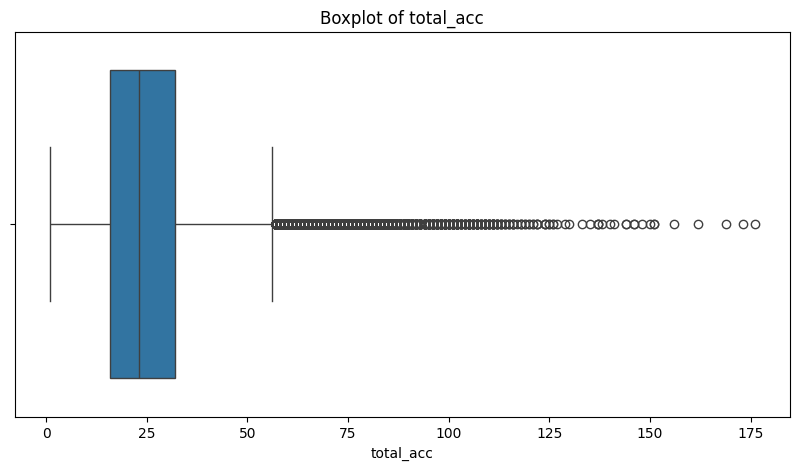

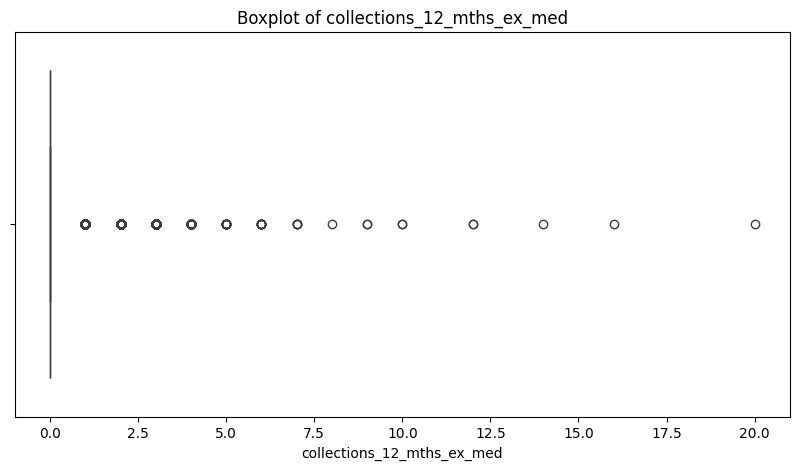

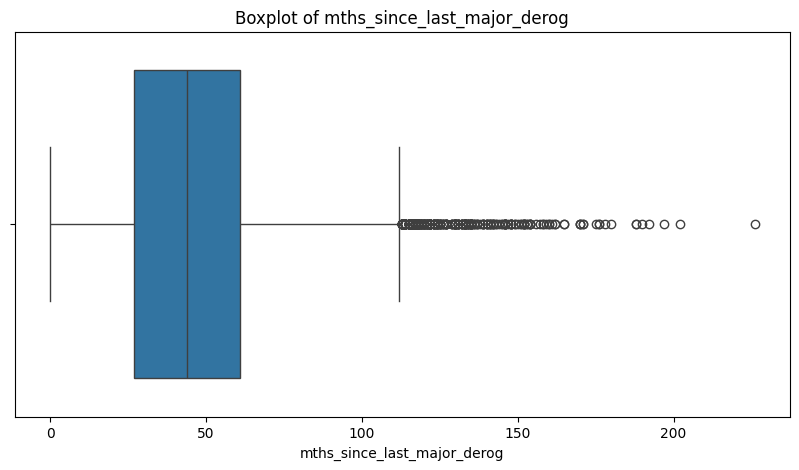

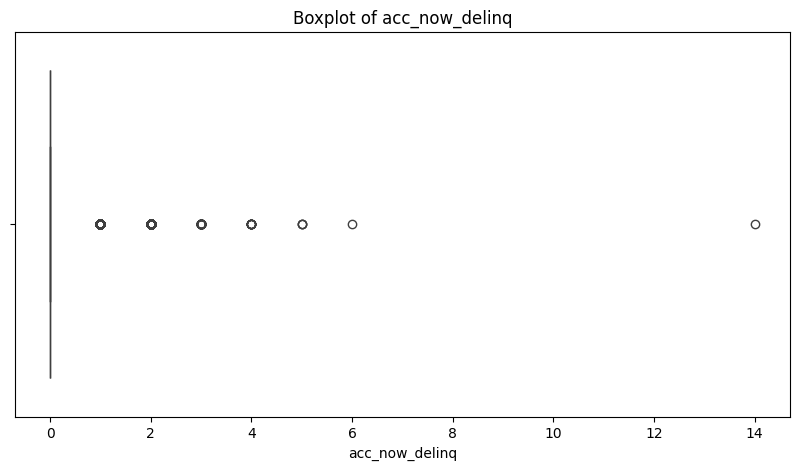

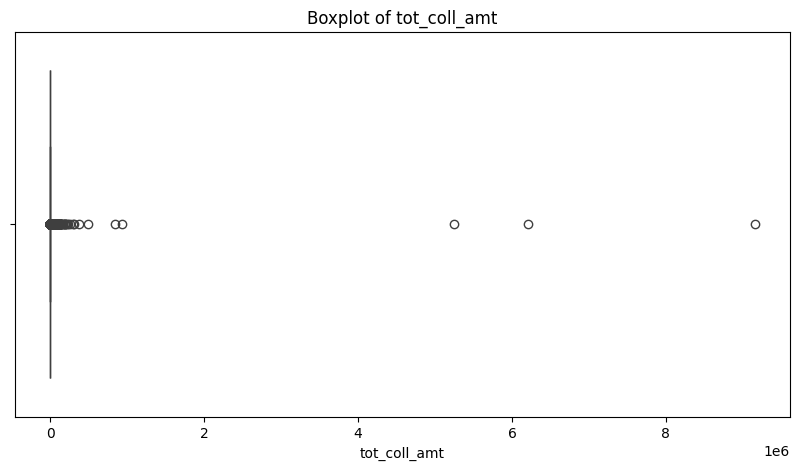

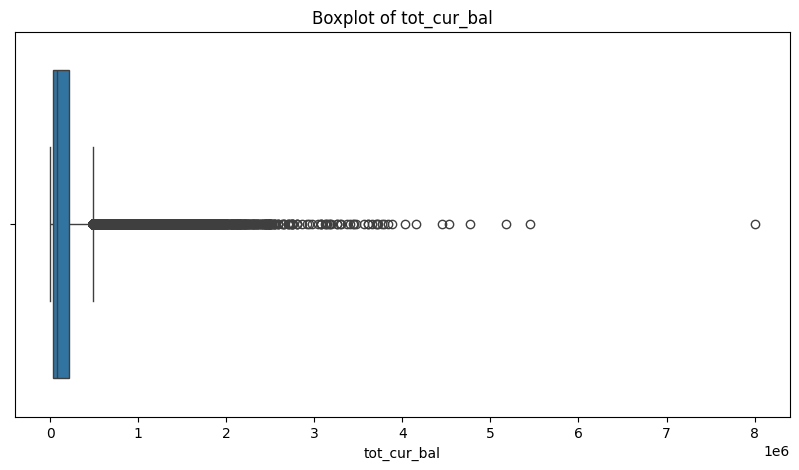

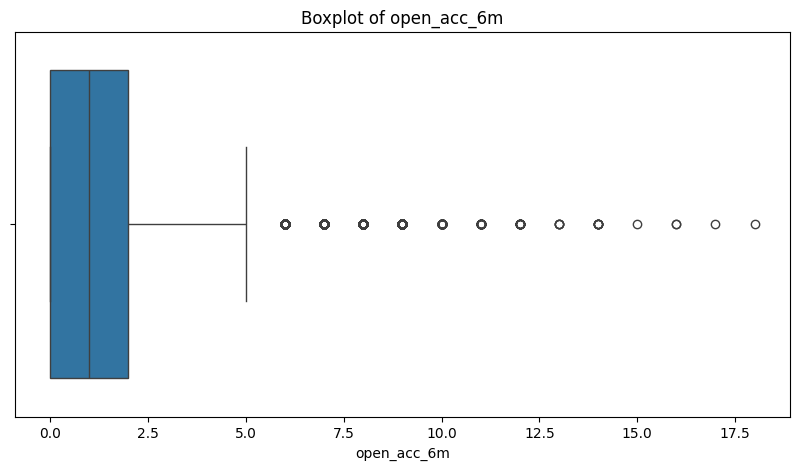

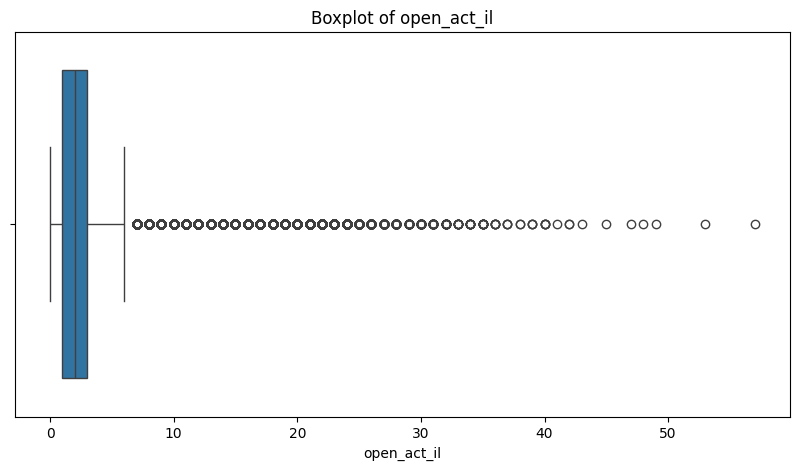

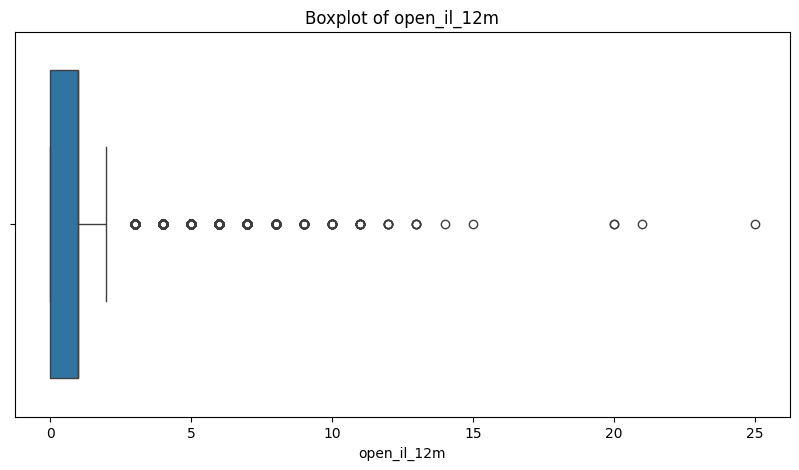

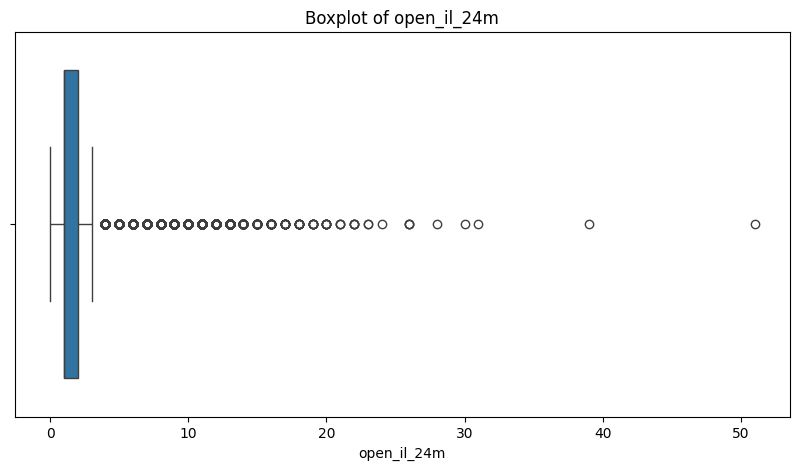

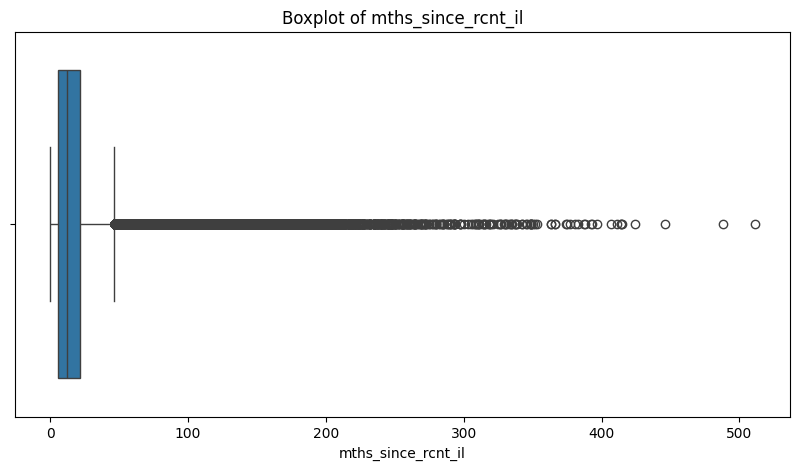

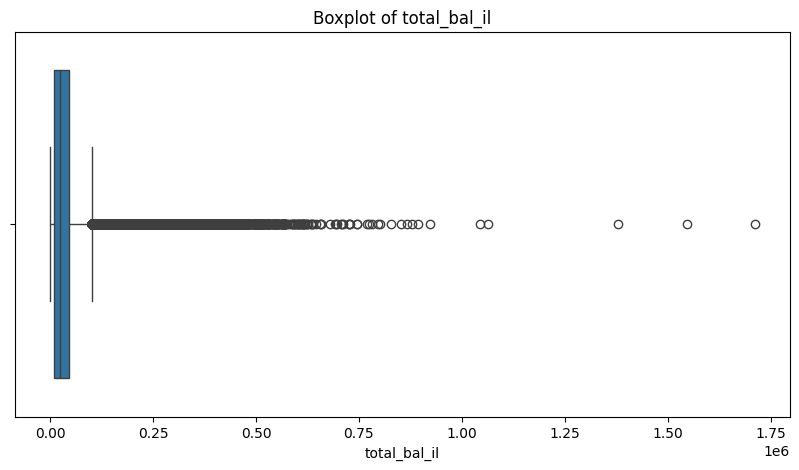

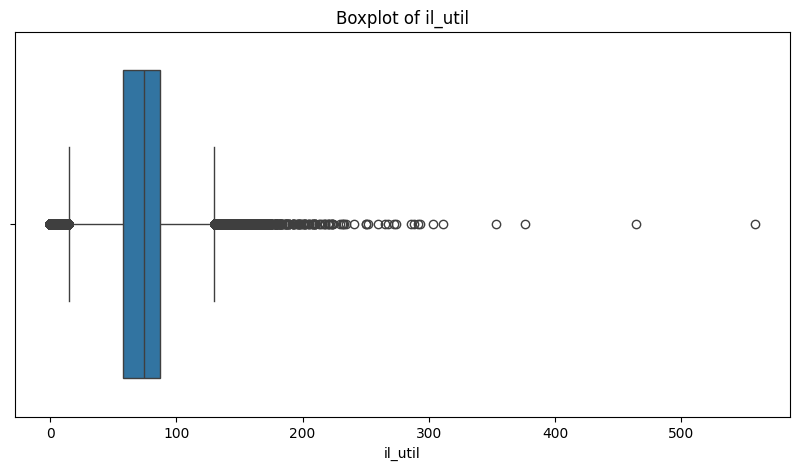

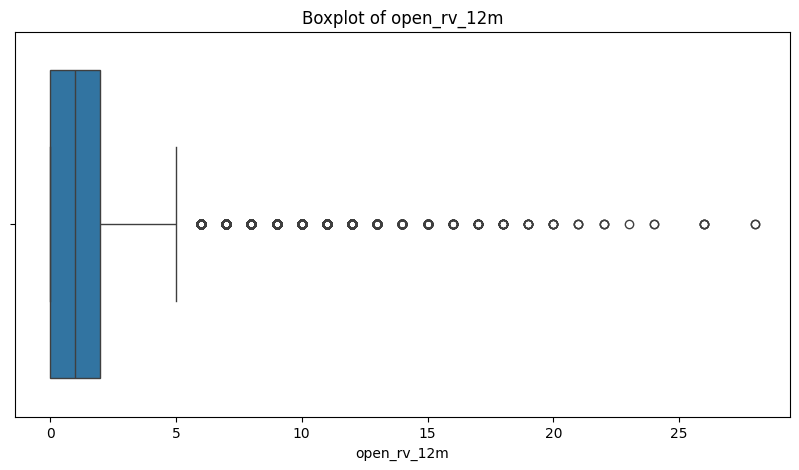

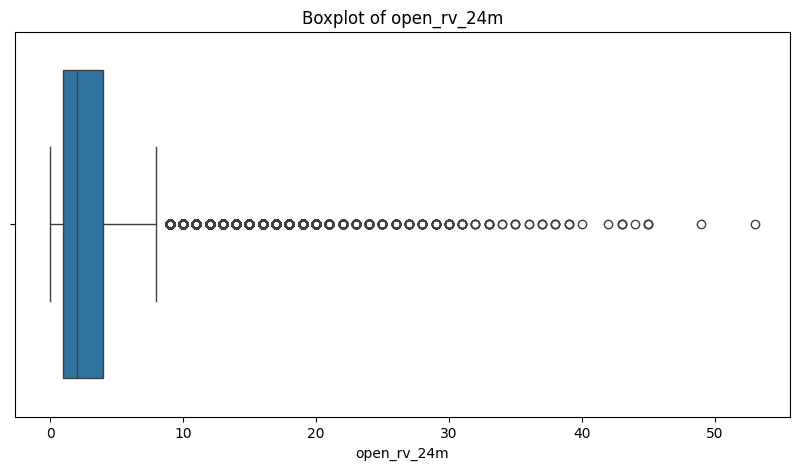

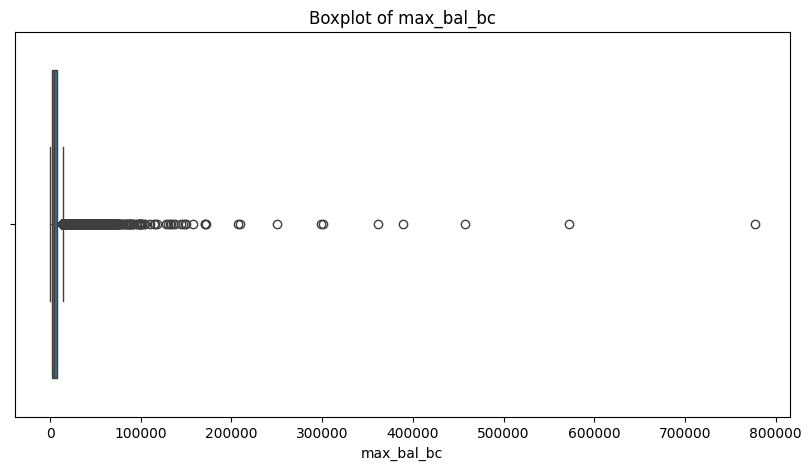

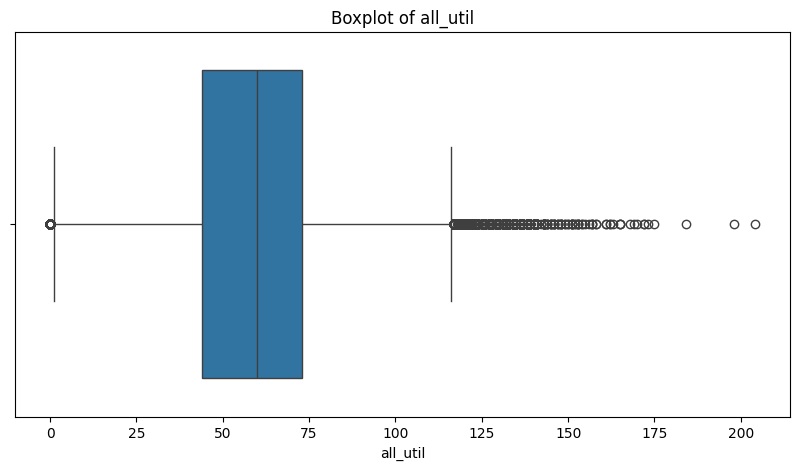

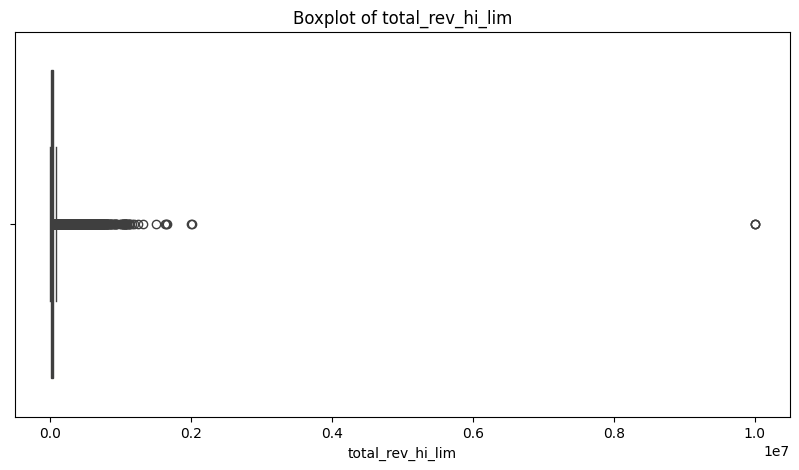

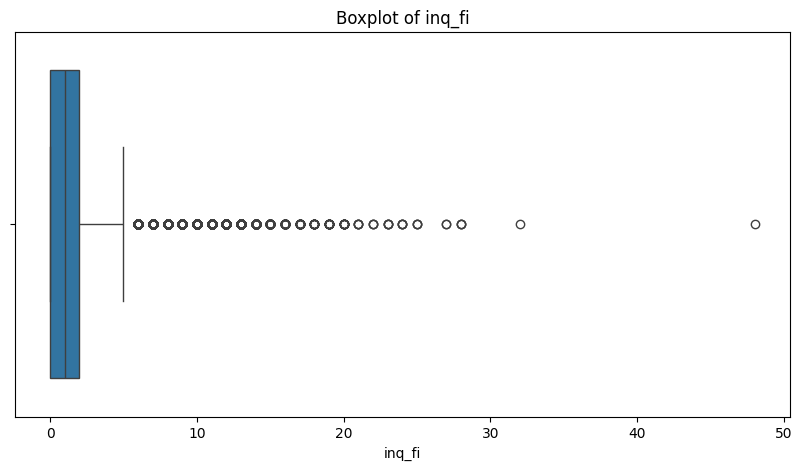

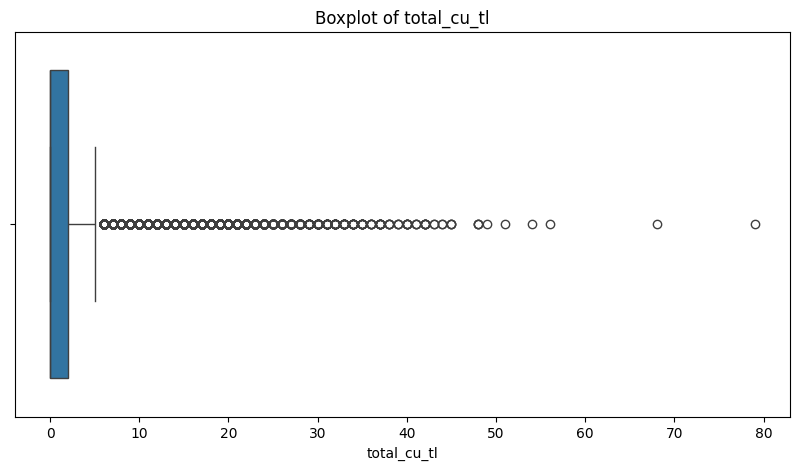

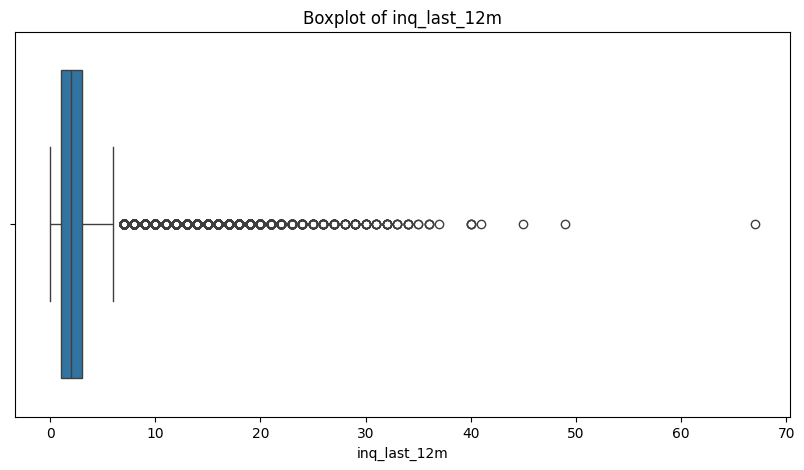

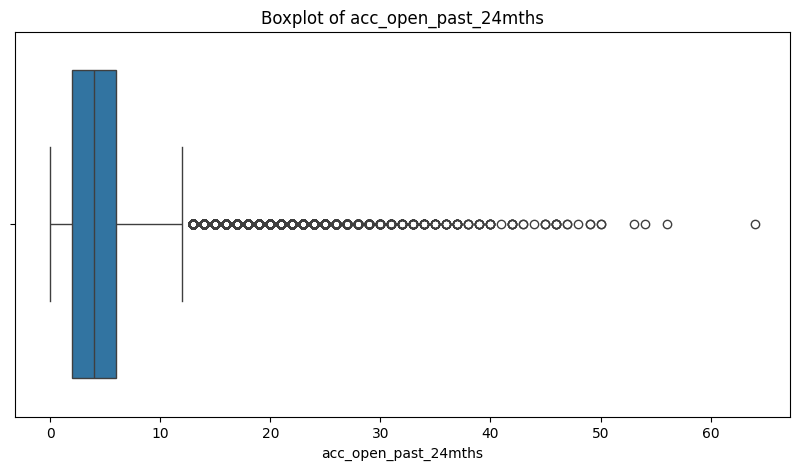

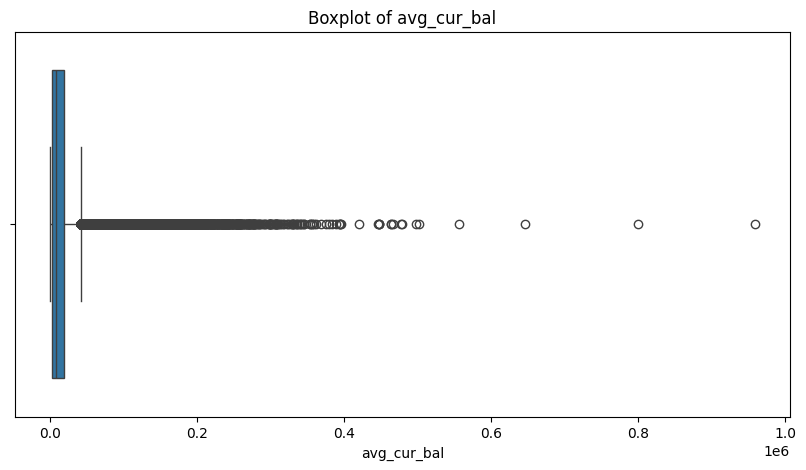

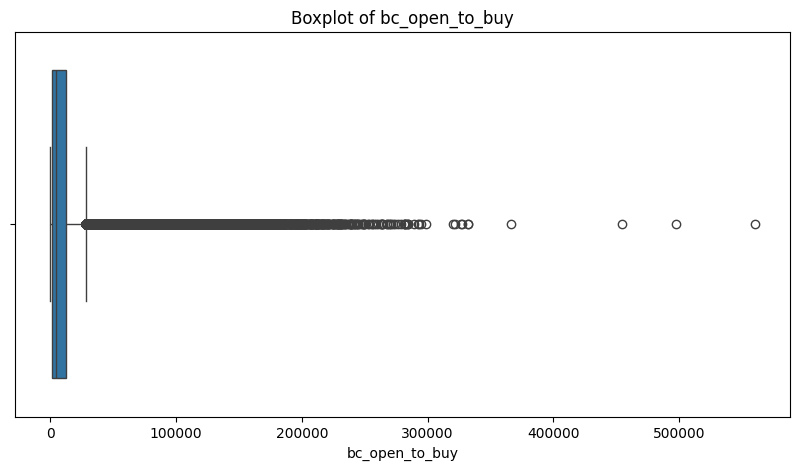

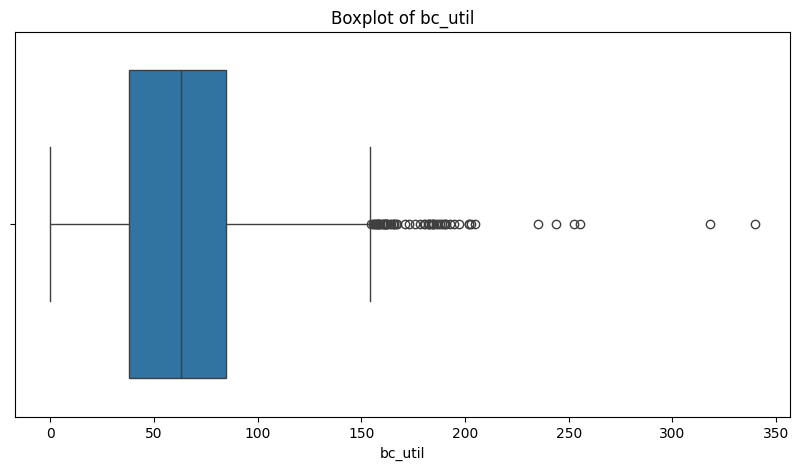

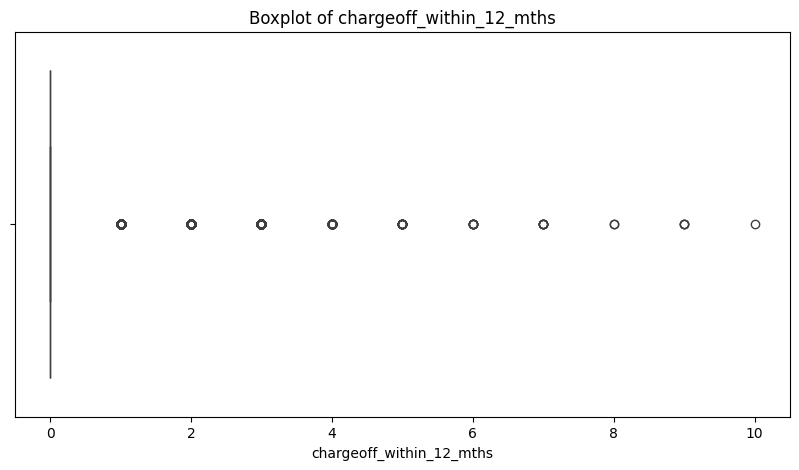

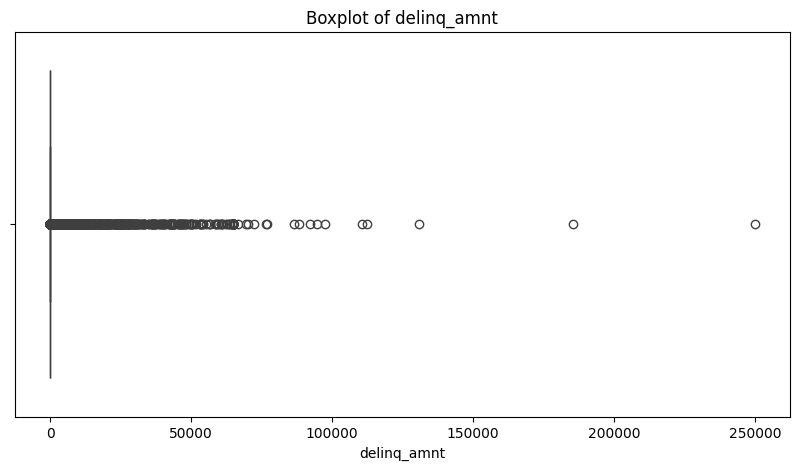

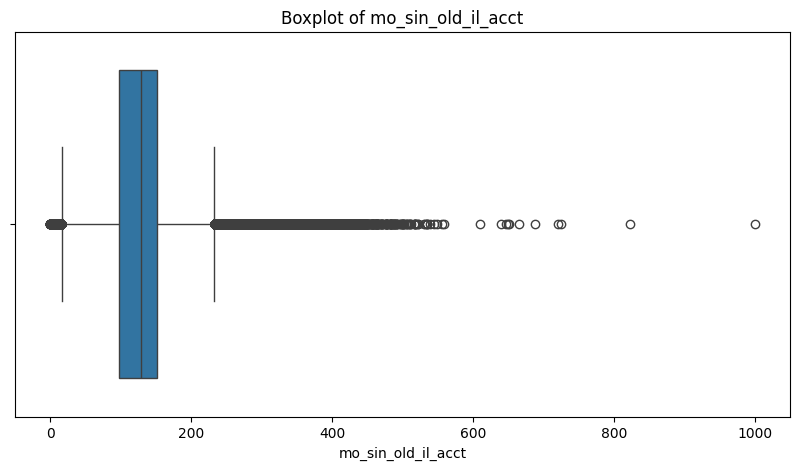

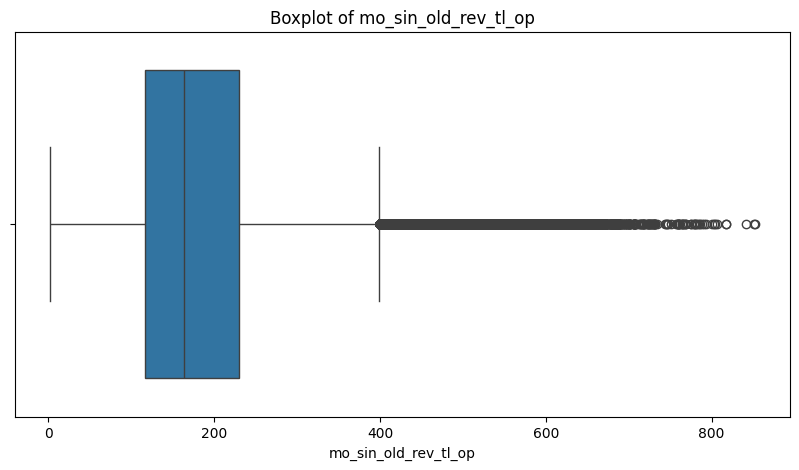

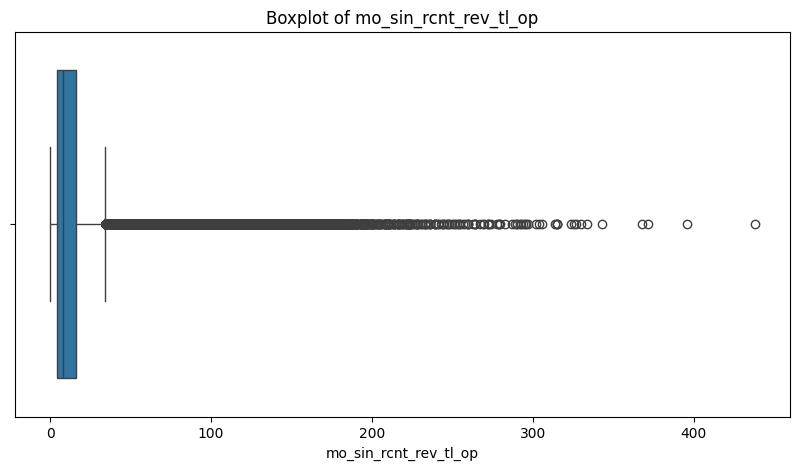

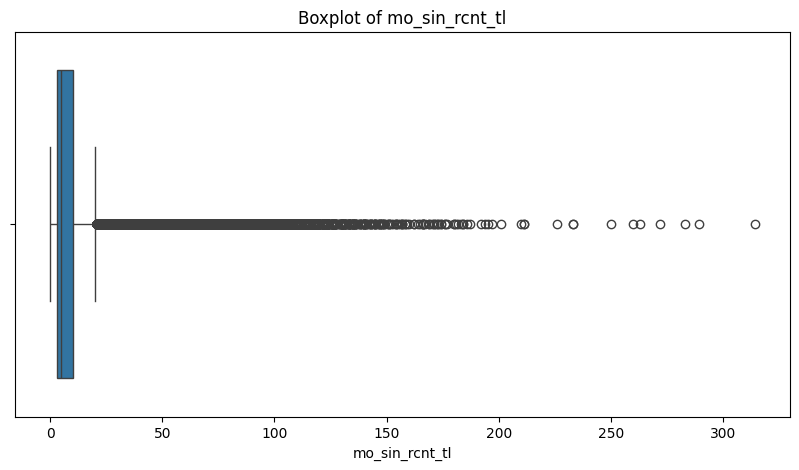

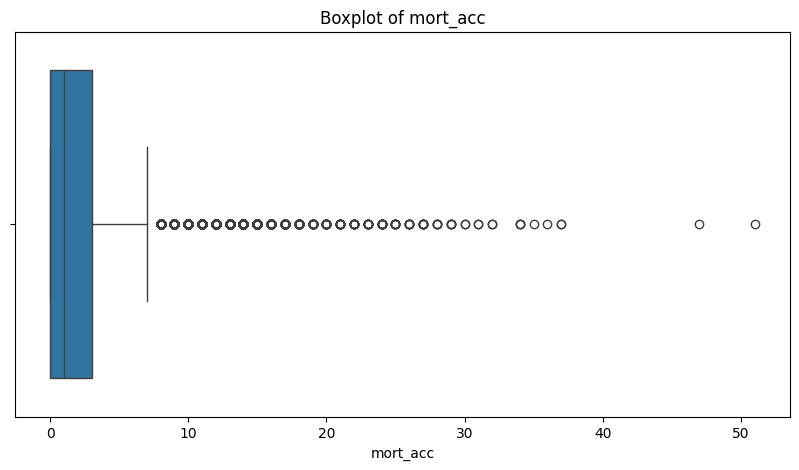

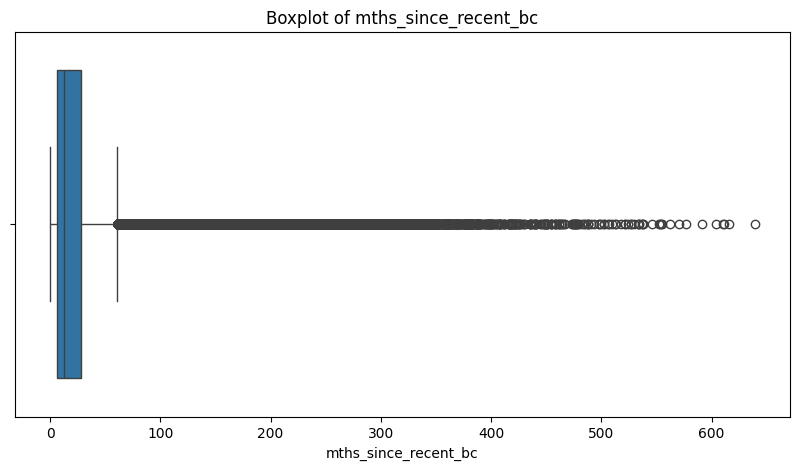

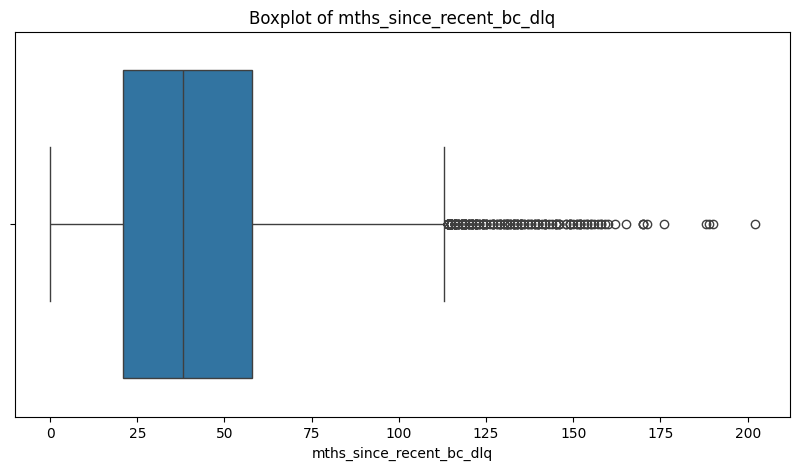

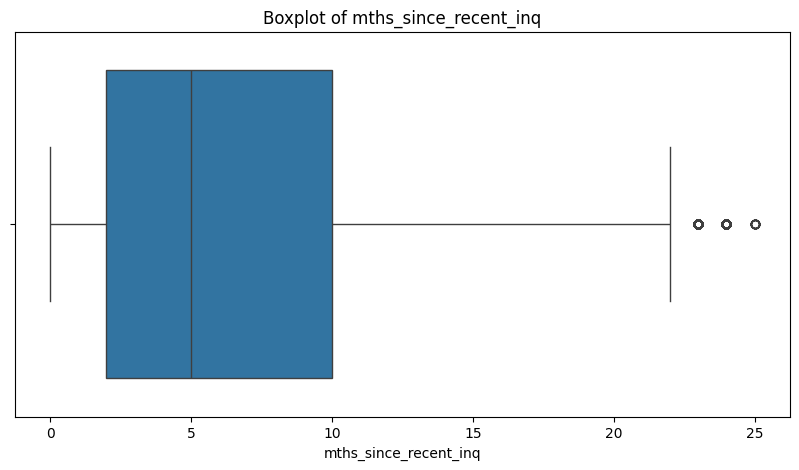

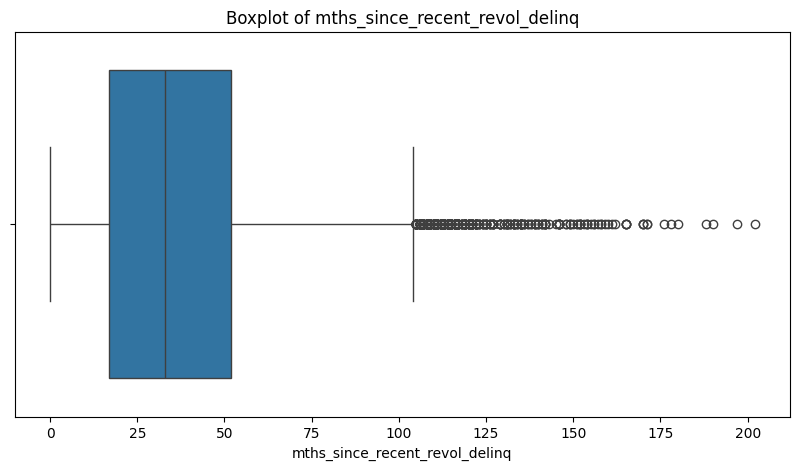

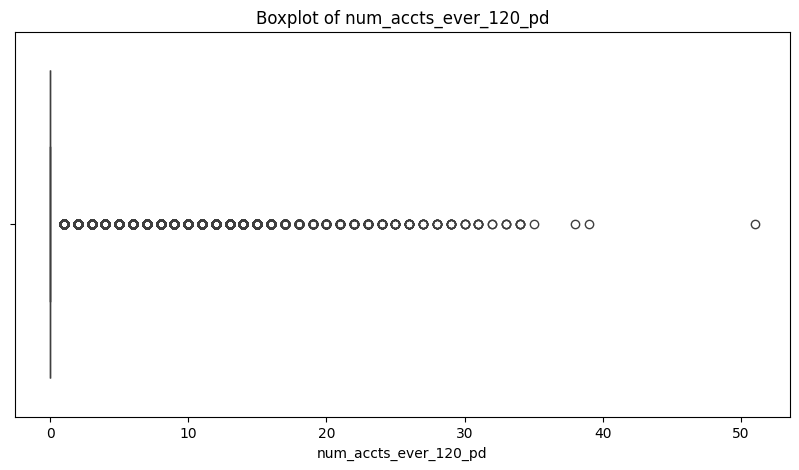

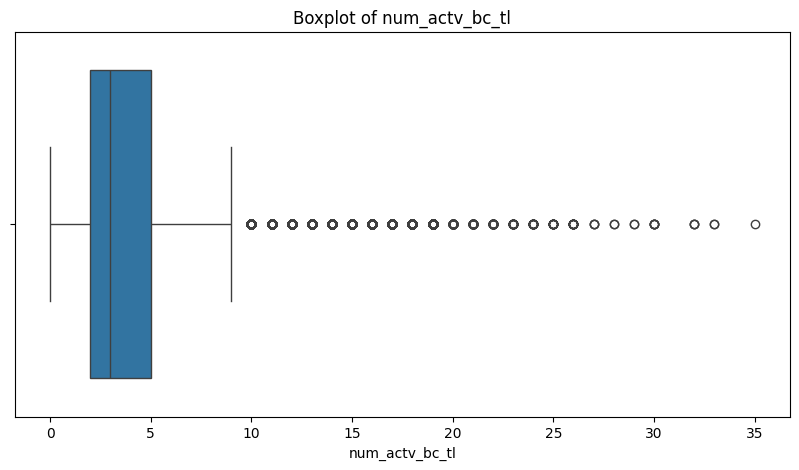

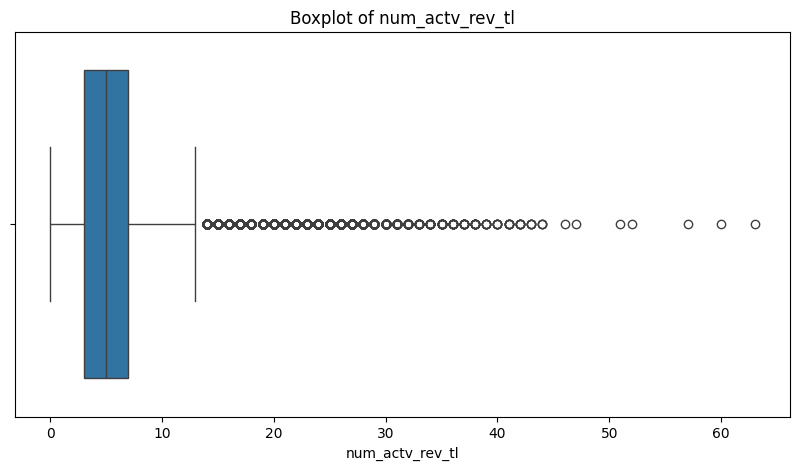

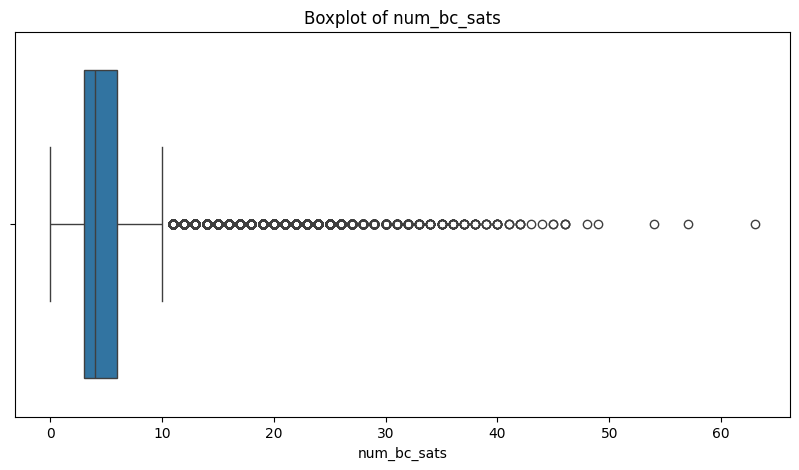

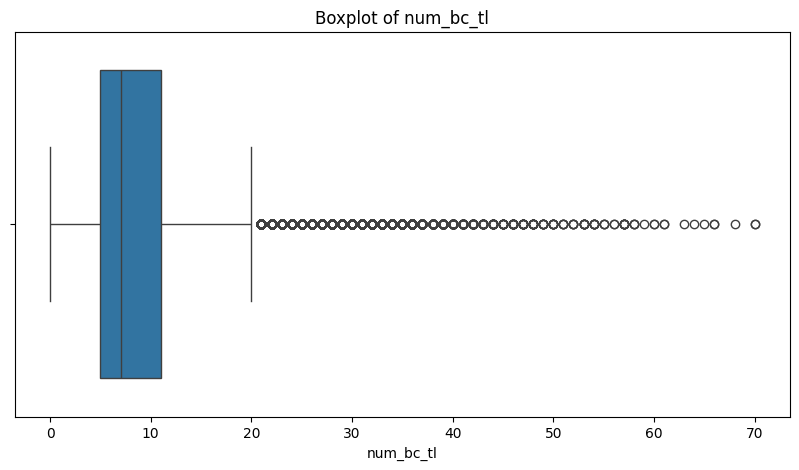

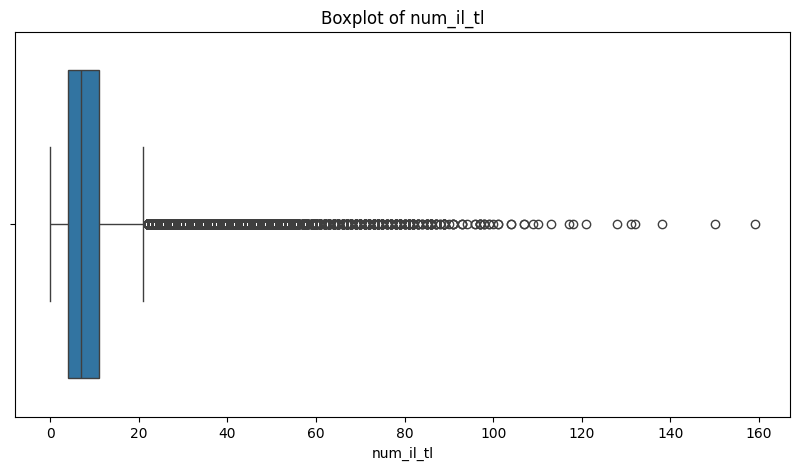

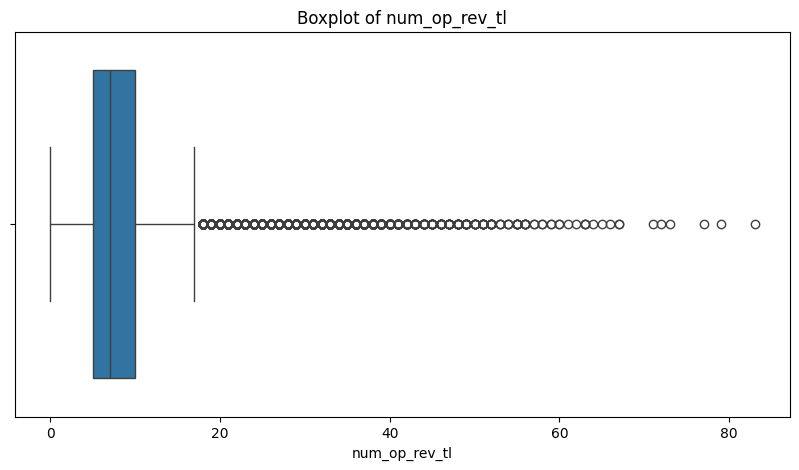

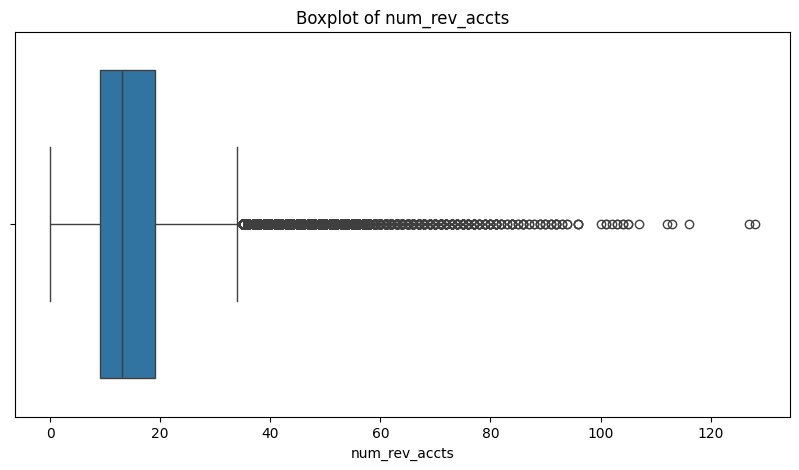

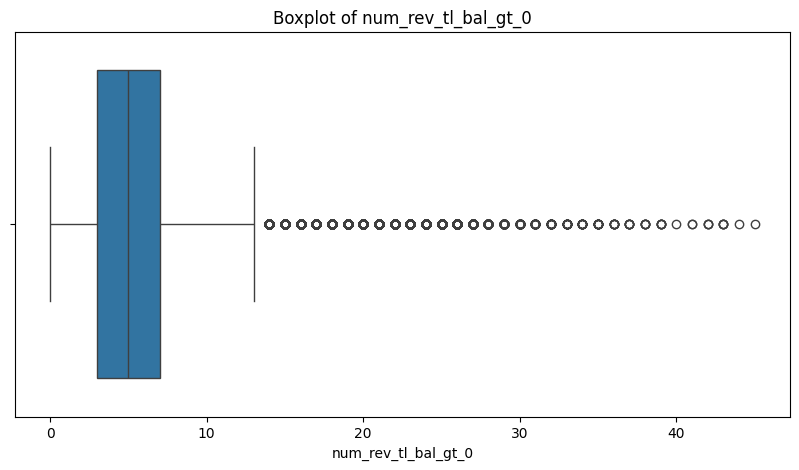

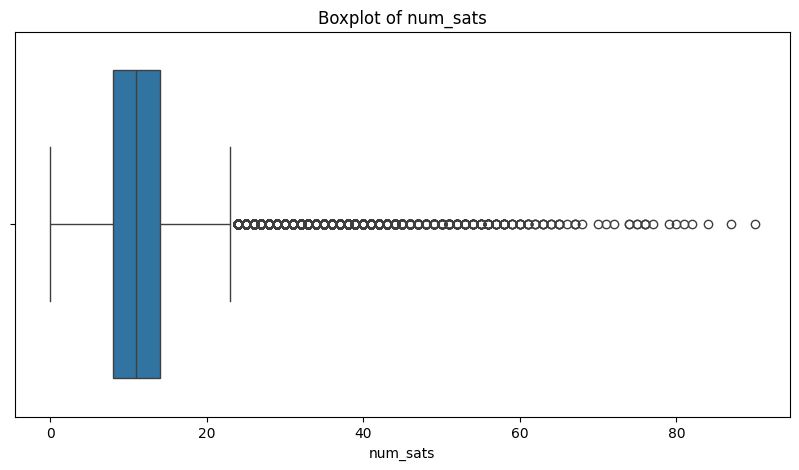

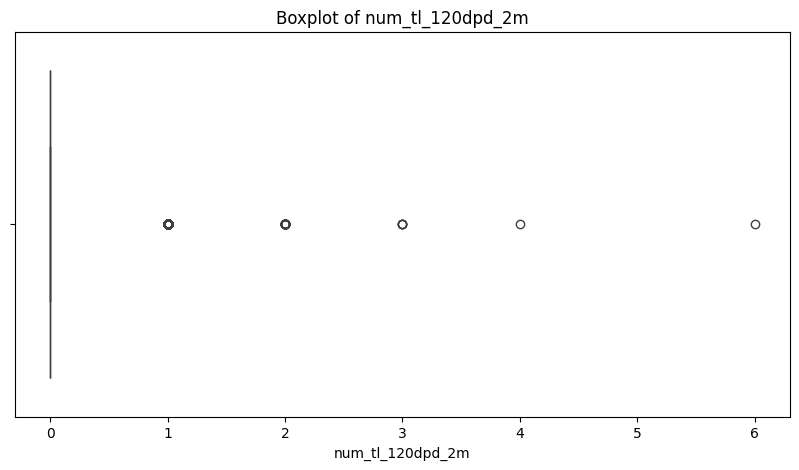

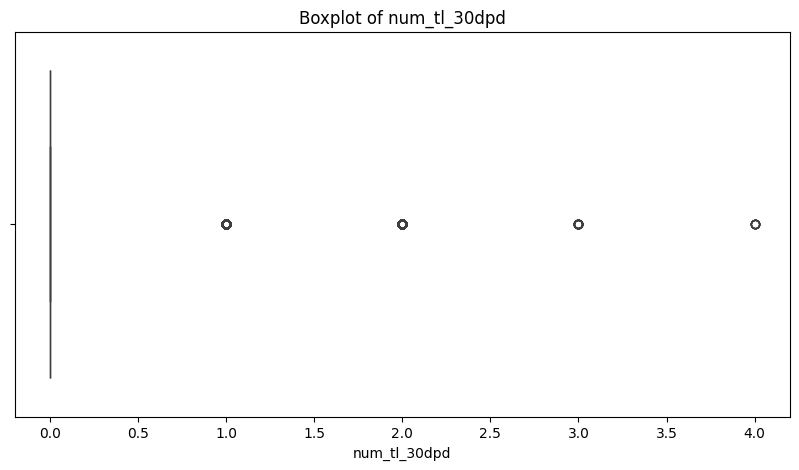

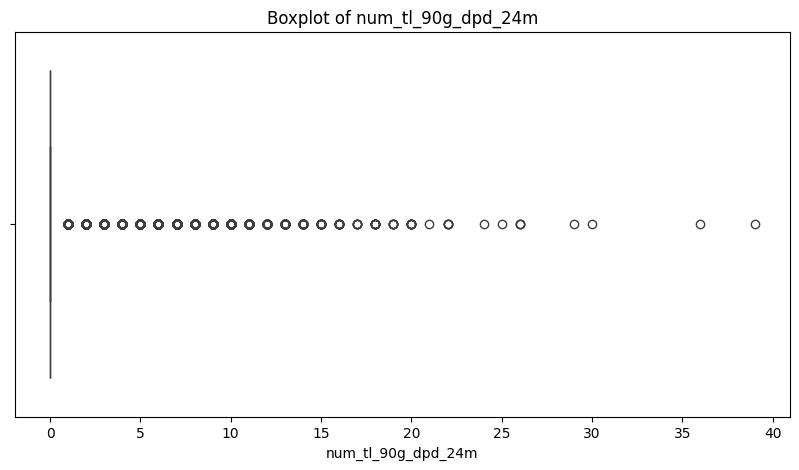

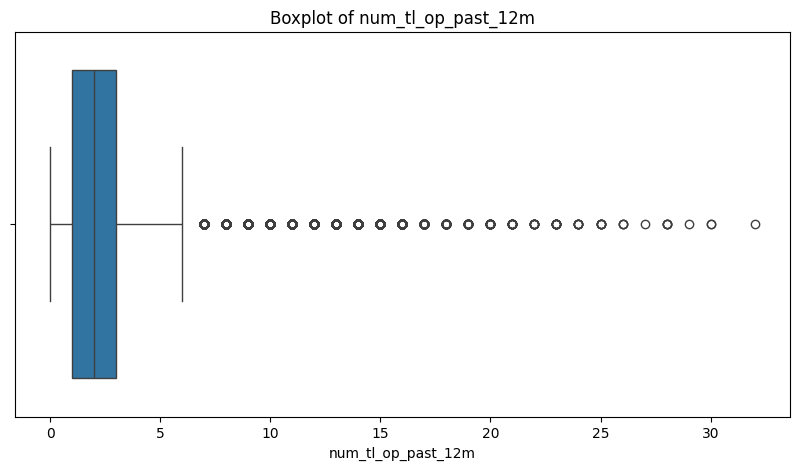

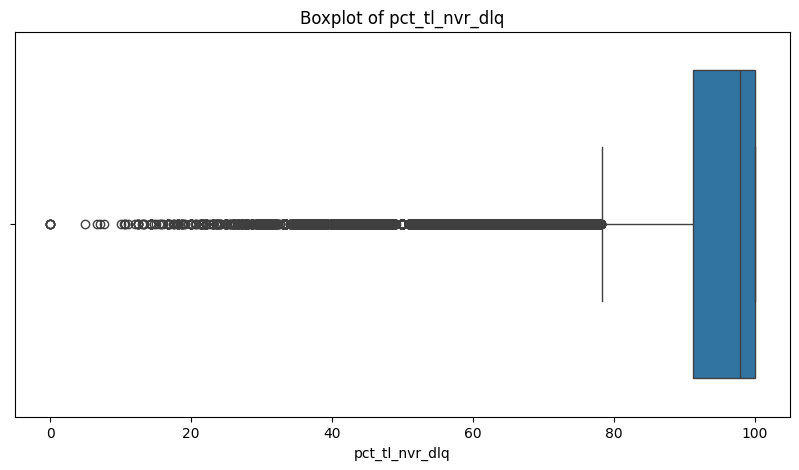

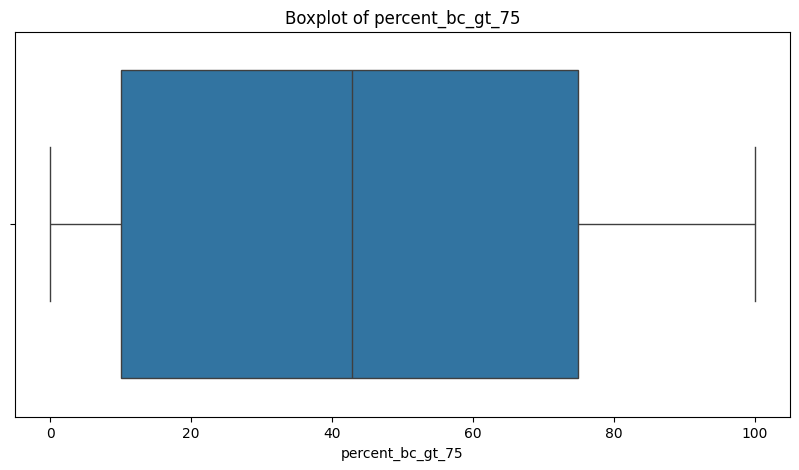

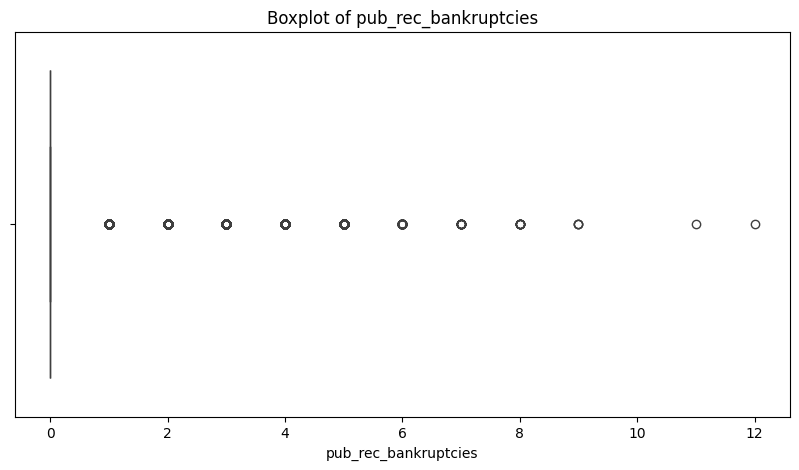

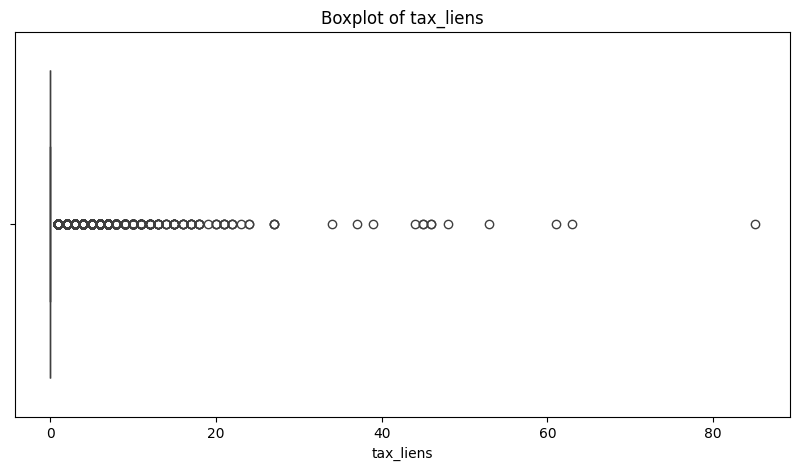

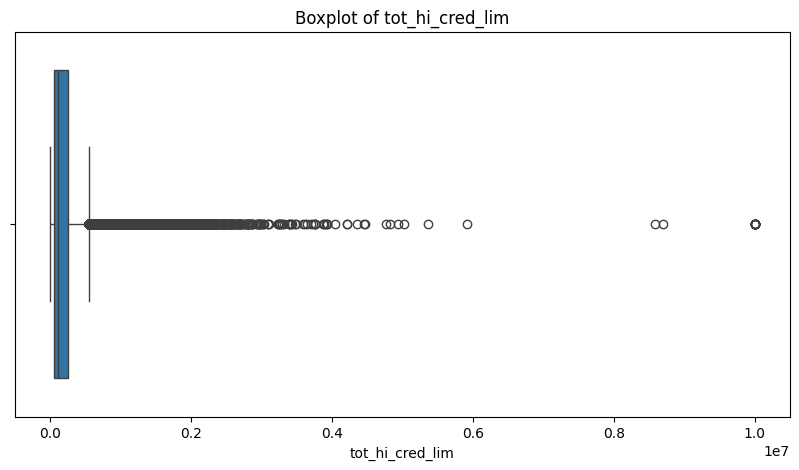

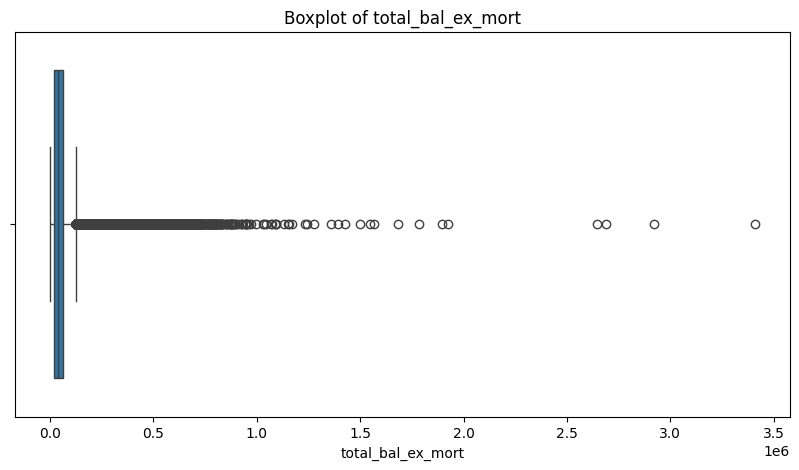

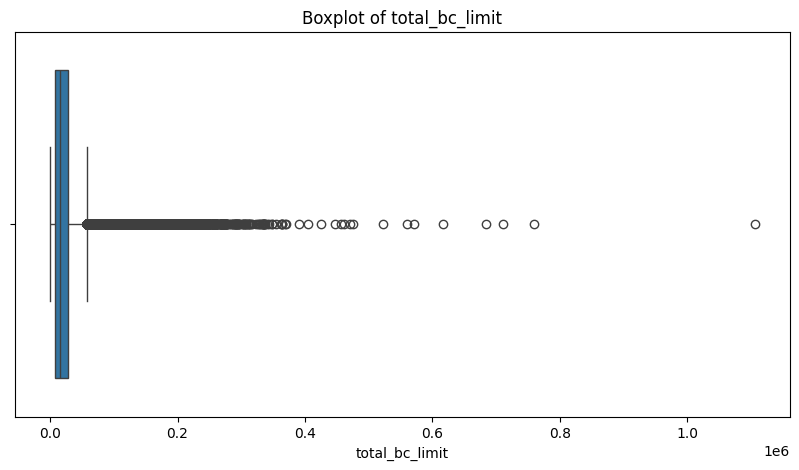

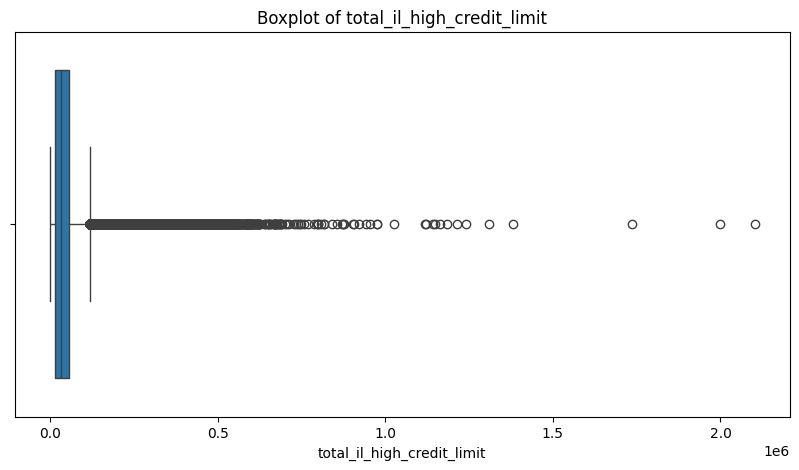

In [ ]:
for col in numerical_col:
    if col in X.columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=X[col].dropna())
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.show()

This allows me to figure out which of these features will need to be "transformed" prior to training the model. 

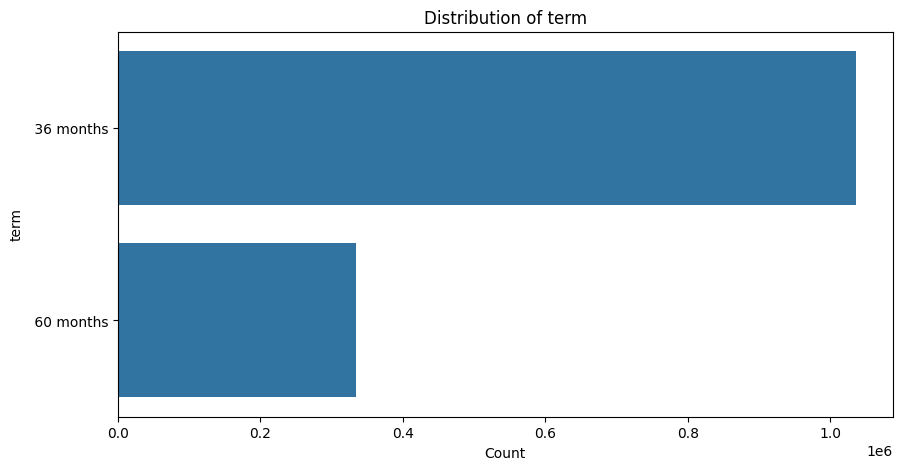

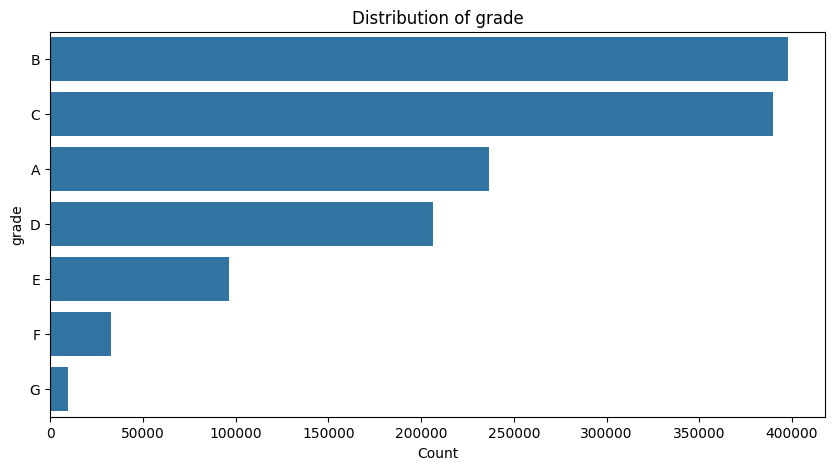

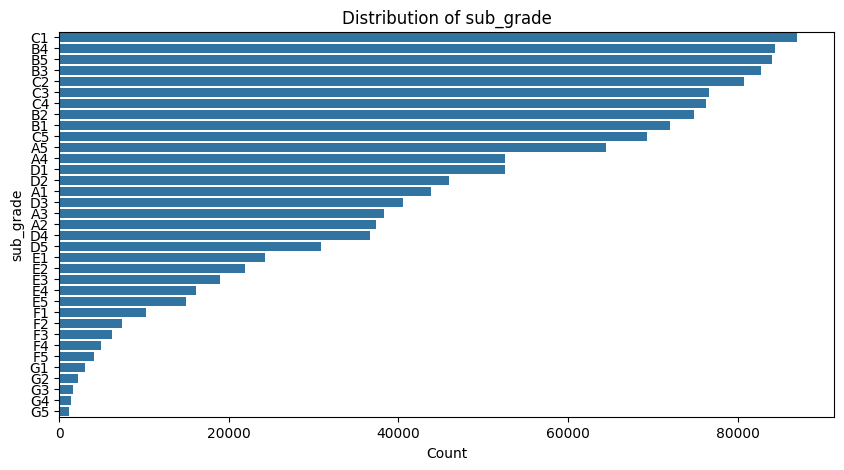

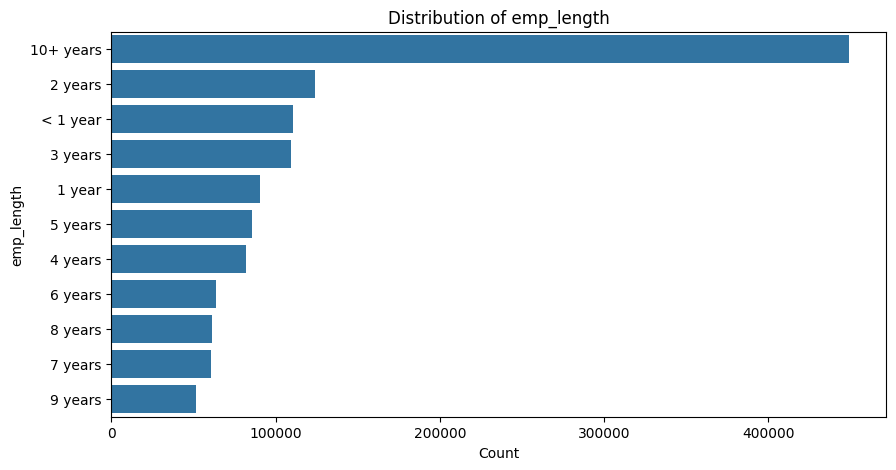

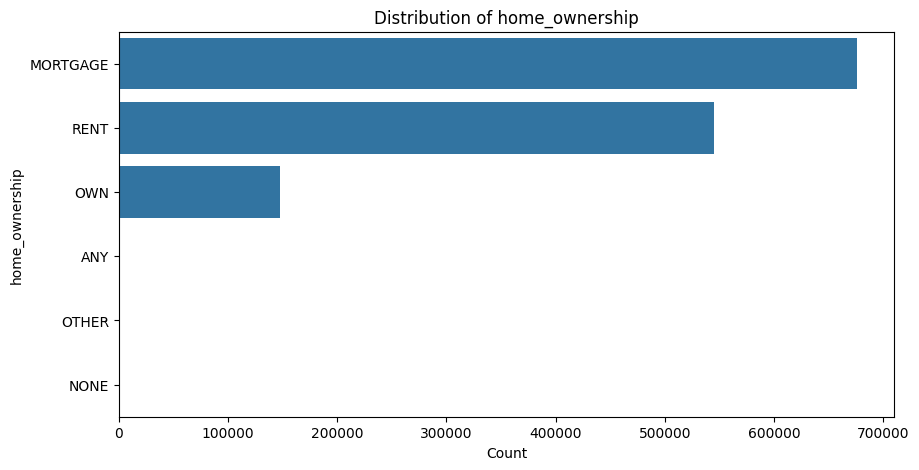

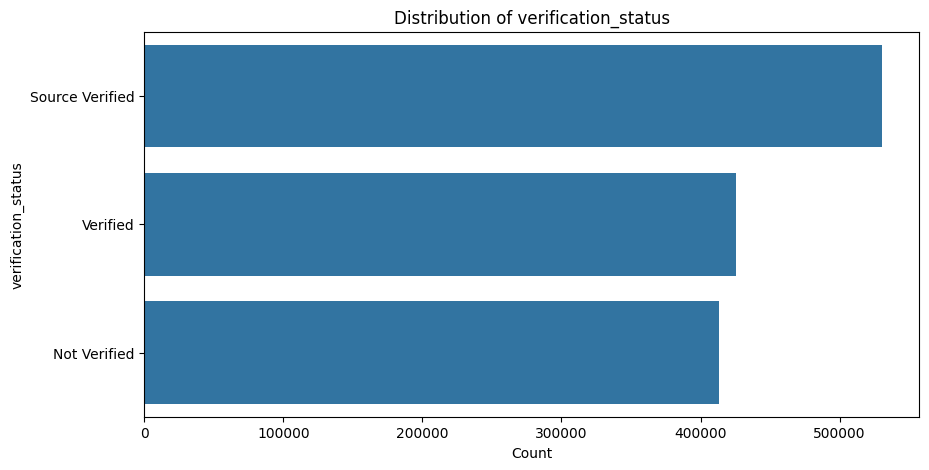

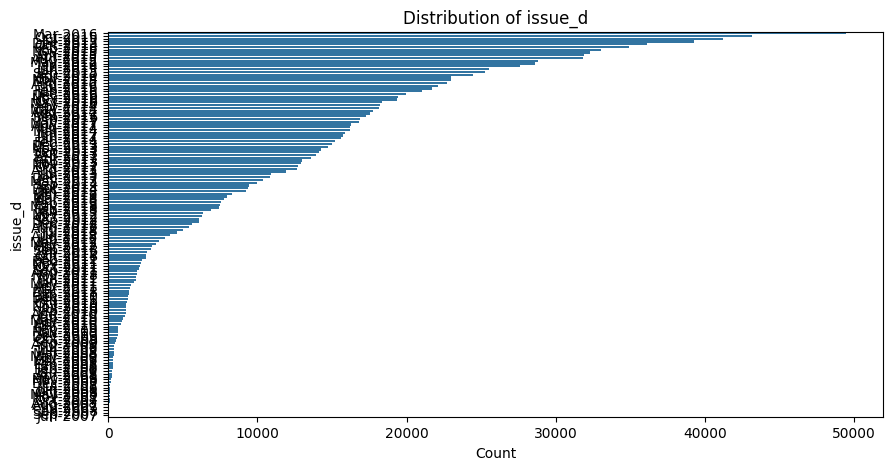

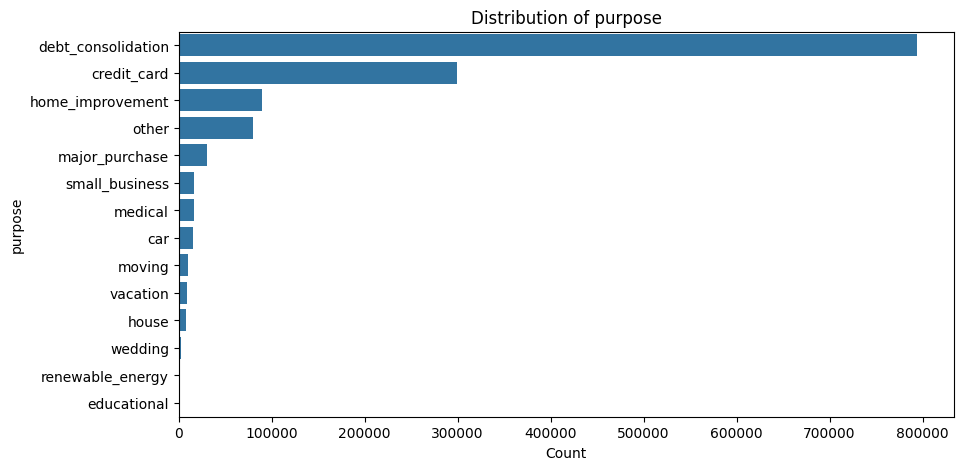

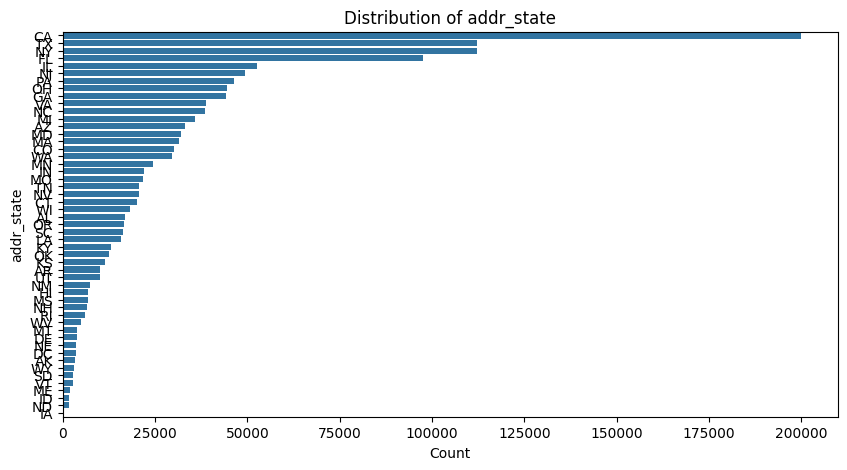

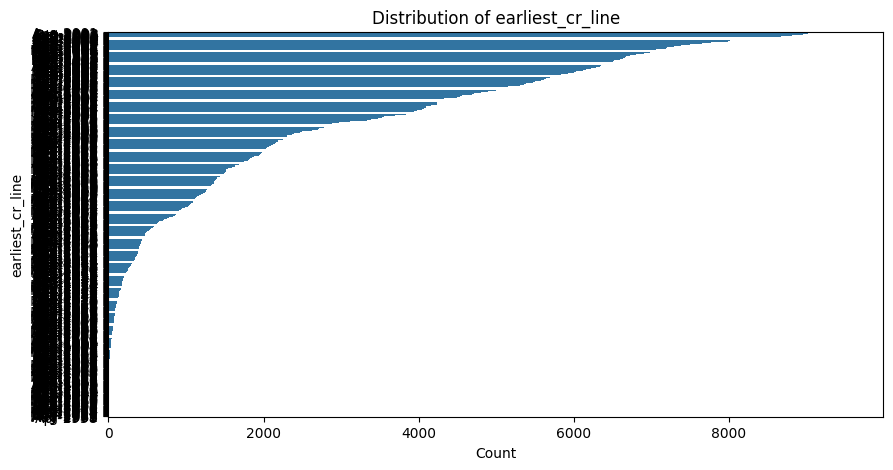

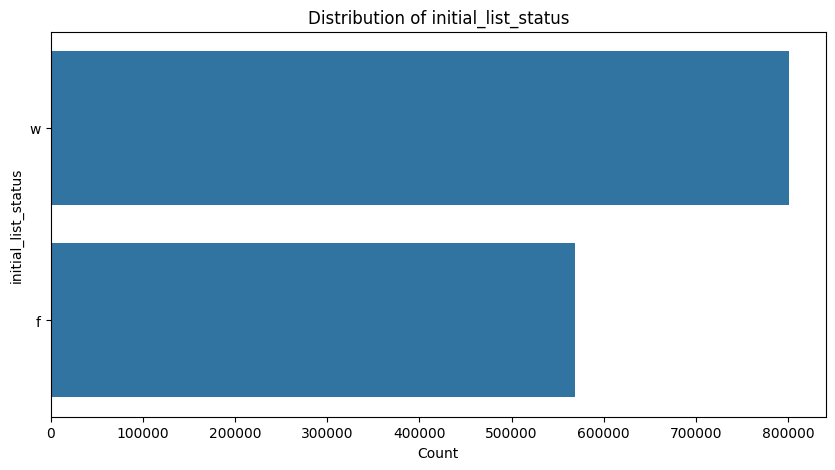

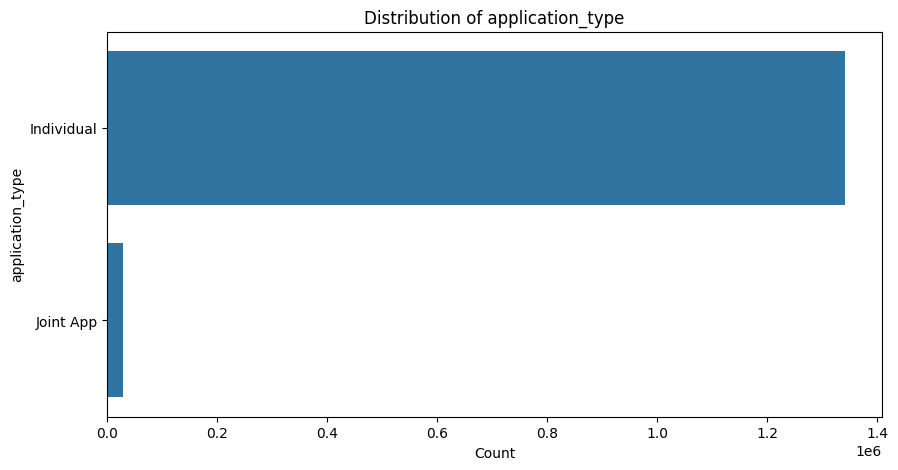

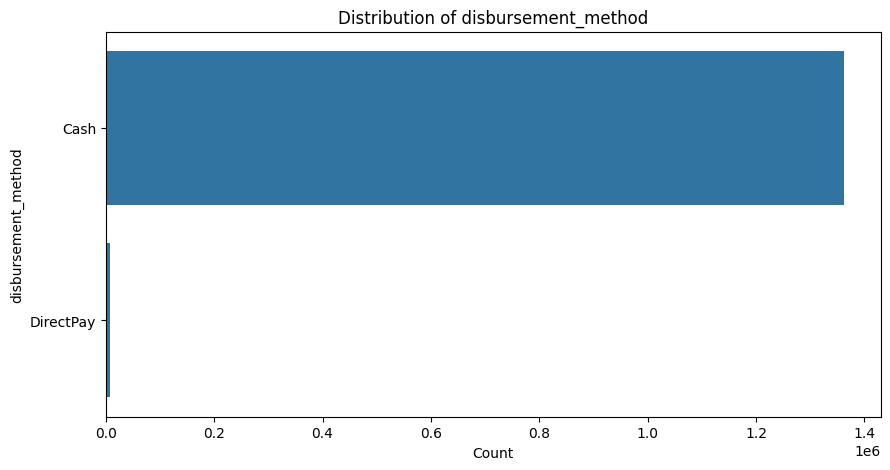

In [ ]:
categorical_col = X.select_dtypes(include=['object']).columns.tolist()  # List of categorical features

for col in categorical_col:
    if col in X.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(y=X[col].dropna(), order=X[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

**numbered list** of each categorical feature that may need to be altered

1. **term** – A lot more 36 months than 60 months (essentially triple).
2. **grade** – Tie for B and C, another tie for A and D, E, F, and G are less.
3. **sub_grade** – Many subgrades, C1 is the largest, G5 is the smallest.
4. **emp_length** – 10+ years is the overwhelming majority.
5. **home_ownership** – Mortgage and Rent are the majority.
6. **verification_status** – Source Verified is most; Verified and Not Verified are about equal.
7. **issue_d** – March 2016 is the highest.
8. **purpose** – Debt consolidation is the highest amount.
9. **addr_state** – CA is the highest.
10. **application_type** – Individual is the overwhelming majority.
11. **disbursement_method** – Cash is essentially all.

**numbered list** of each numerical feature that may need to be altered

1. **int_rate** – got some outliers  
2. **installment** – has major outliers  
3. **annual income** – major skewed right  
4. **DTI** – major skewed right  
5. **delinq_2yrs** – no box, just all outliers  
6. **inq_last_6mths** – small box, major outliers to the right  
7. **open_acc** – small box, major outliers to the right  
8. **pub_rec** – same as delinq_2yrs  
9. **revol_bal** – same as delinq_2yrs  
10. **revol_util** – small box, some outliers close right and 2 farther  
11. **total_acc** – dispersed outliers to the right  
12. **collections_12_mths_ex_med** – no box, just dispersed outliers to the right  
13. **mths_since_last_major_derog** – considerable number of outliers  
14. **acc_now_delinq** – no box, many outliers  
15. **tot_coll_amt** – no box, many close to start and a few far right  
16. **tot_cur_ball** – small box, dispersed outliers, close right vicinity  
17. **open_acc_6m** – box with varied outliers to the right  
18. **open_act_il** – box with varied outliers to the right  
19. **open_il_12m** – box with varied outliers to the right  
20. **open_il_24m** – box with varied outliers to the right  
21. **mths_since_rcnt_il** – box with varied outliers to the right  
22. **total_bal_il** – box with varied outliers to the right  
23. **il_util** – outliers on left and right, small box  
24. **open_rv_12m** – standard, many outliers to the right  
25. **open_rv_24m** – standard, many outliers to the right  
26. **max_bal_bc** – no box, major outliers to the right  
27. **all_util** – normal, big box, some outliers on right and one on left  
28. **total_rev_hi_lim** – no box, major outliers condensed on left, one on right  
29. **inq_fi** – small box, dispersed outliers on right  
30. **total_cu_tl** – small box, staggered outliers to right  
31. **inq_last_12m** – small box, staggered outliers to right  
32. **acc_open_past_24mths** – small box, staggered outliers to right  
33. **avg_cur_bal** – small box, condensed outliers on left, few on right  
34. **bc_open_to_buy** – small box, condensed outliers on left, few on right  
35. **bc_util** – some outliers on right  
36. **chargeoff_within_12mths** – only outliers, sparse  
37. **delinq_amnt** – only outliers, sparse  
38. **mo_sin_old_il_acct** – left and right outliers (many)  
39. **mo_sin_old-rev_tl_op** – many on right, largely condensed  
40. **mo_sin_rcnt_rev_tl_op** – small box, many outliers to right  
41. **mo_sin_rcnt_tl** – small box, many outliers to right  
42. **mort_acc** – small box, few outliers to right  
43. **mths_since_recent_bc** – small box, many condensed outliers to right  
44. **mths_since_recent_bc_dlq** – standard box, some outliers  
45. **num_accts_ever_120_pd** – no box, dispersed outliers to right  
46. **num_tl_120dpd_2m** – no box, dispersed outliers to right  
47. **num_tl_30dpd** – no box, dispersed outliers to right  
48. **num_tl_90g_dpd_24m** – no box, dispersed outliers to right  
49. **pct_tl_nvr_dlq** – many outliers to left, box on right  
50. **pub_rec_bankruptcies** – only outliers  
51. **tax_liens** – only outliers  

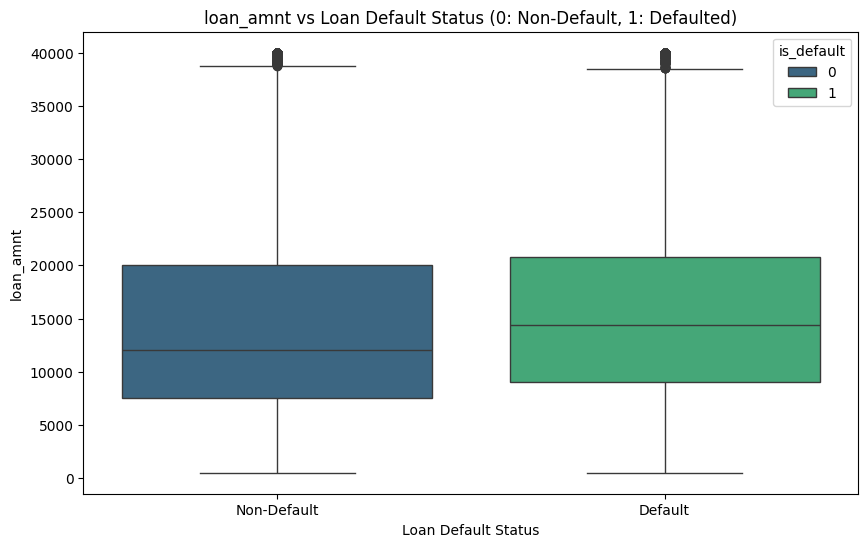

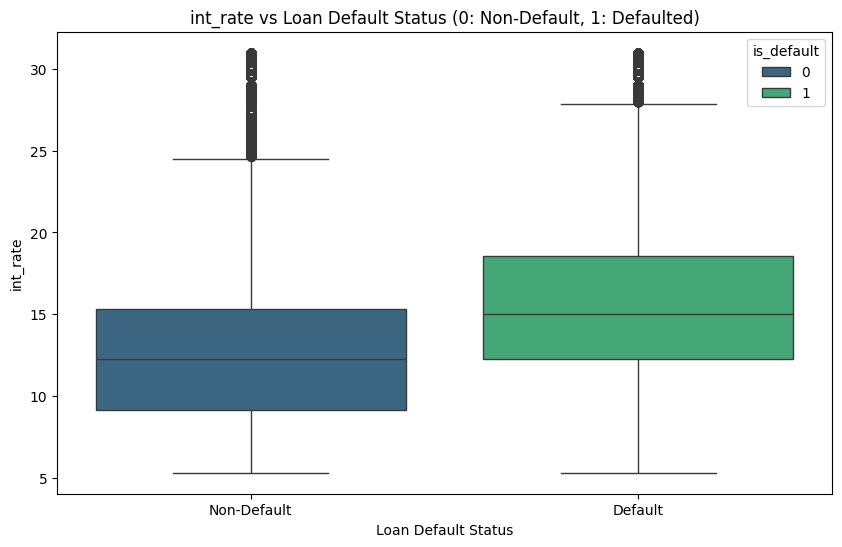

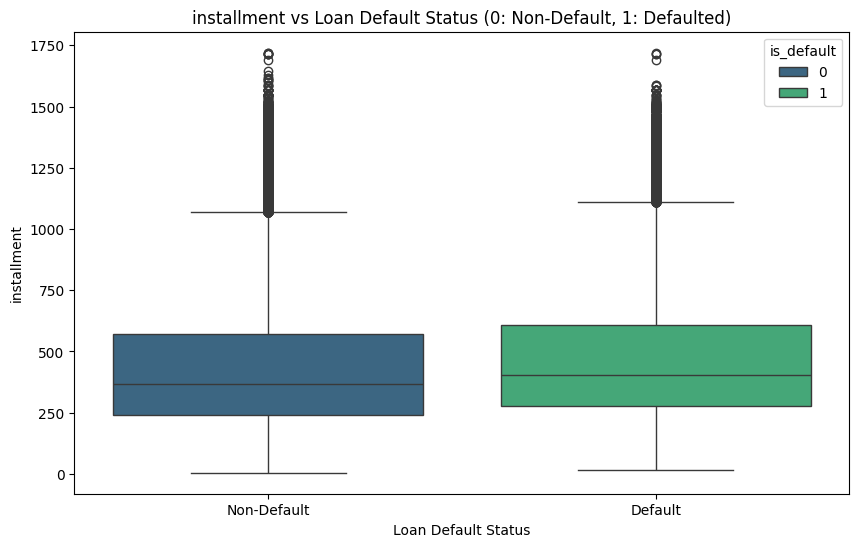

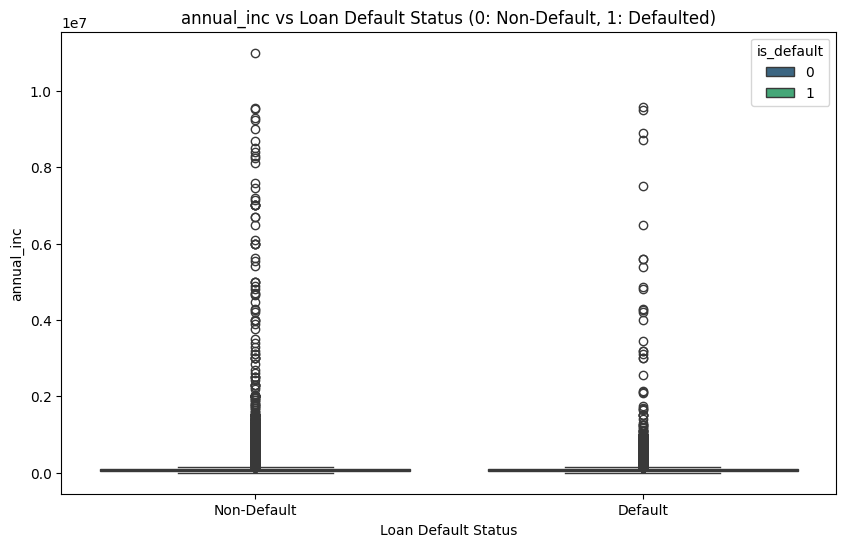

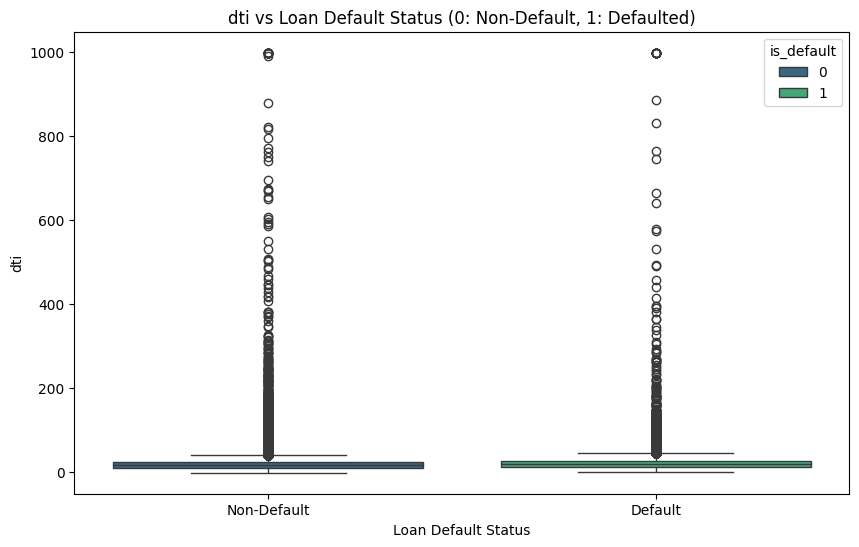

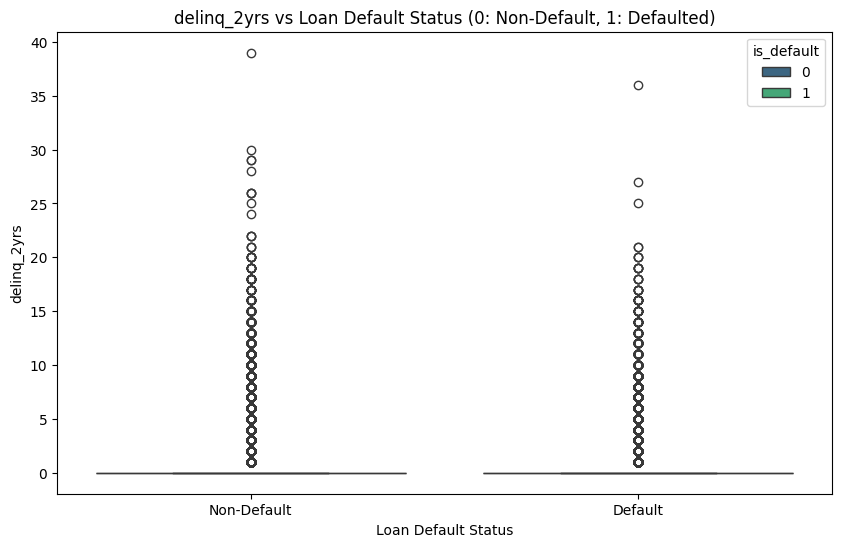

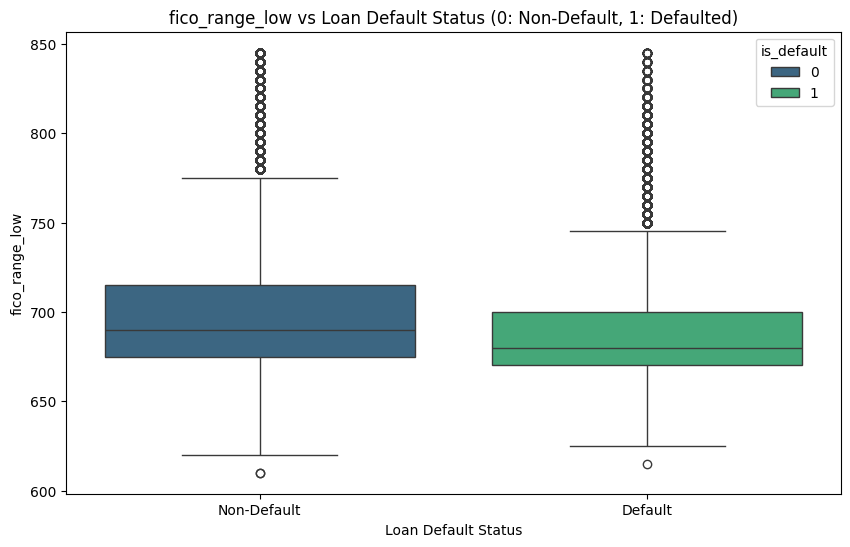

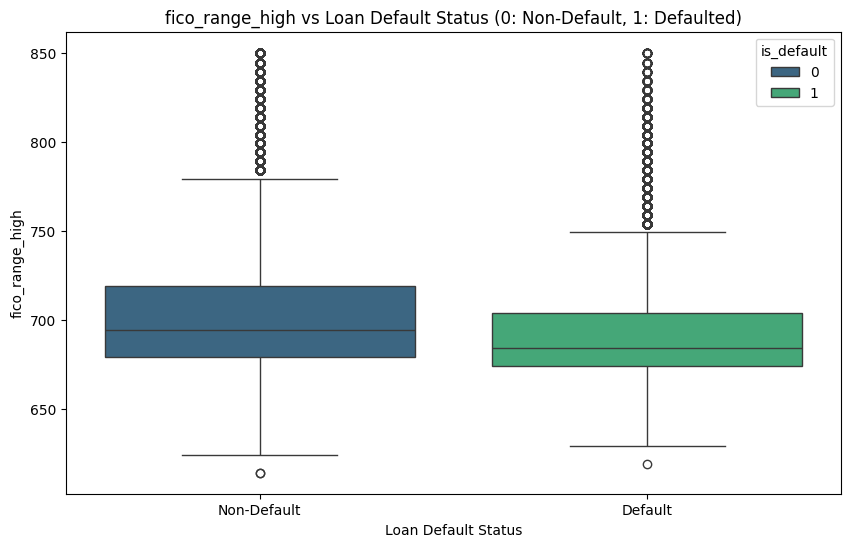

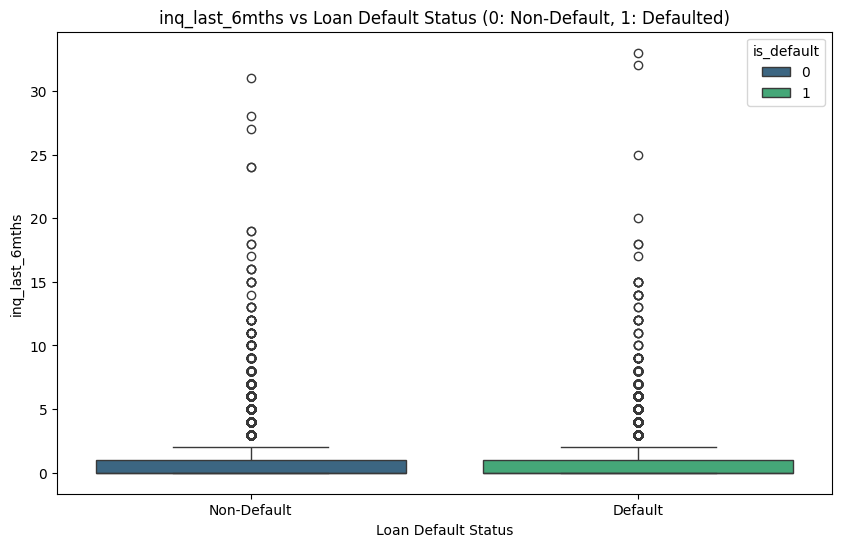

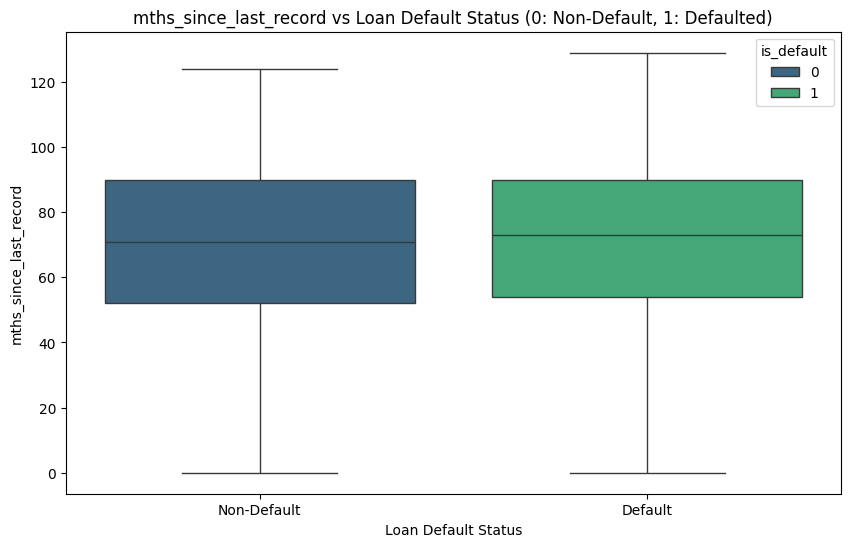

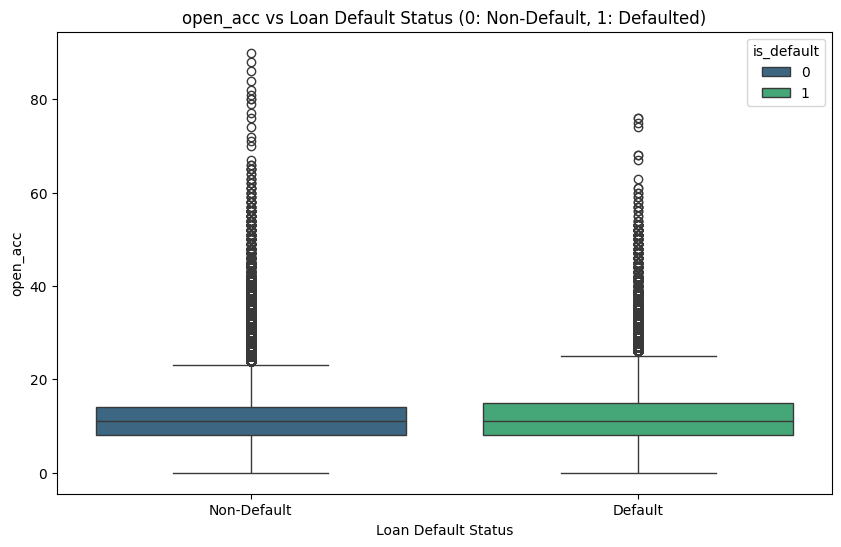

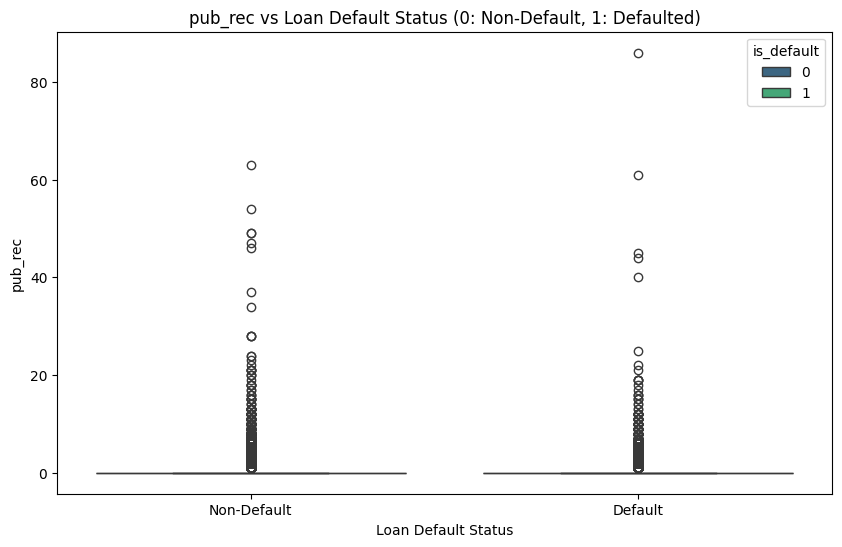

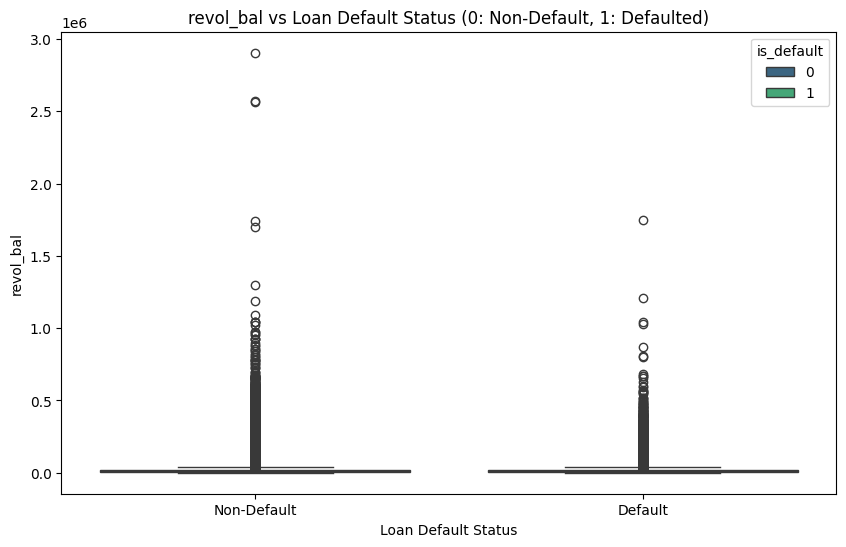

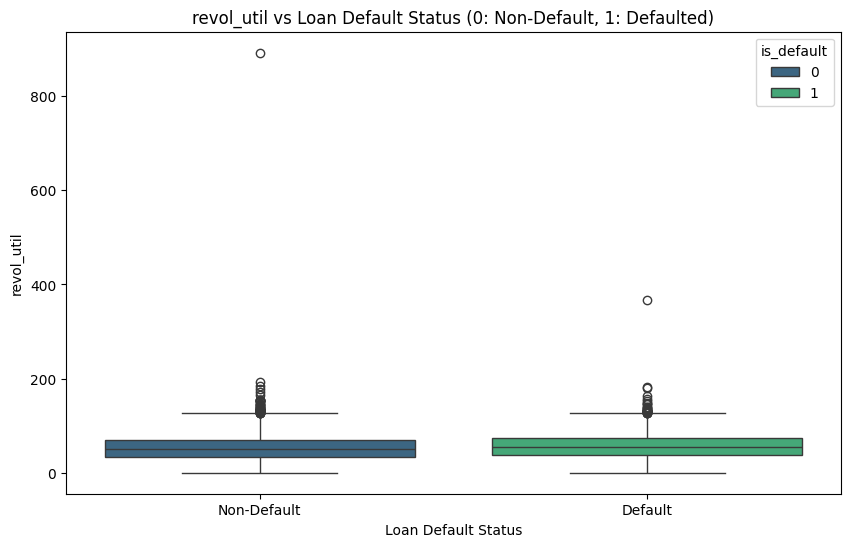

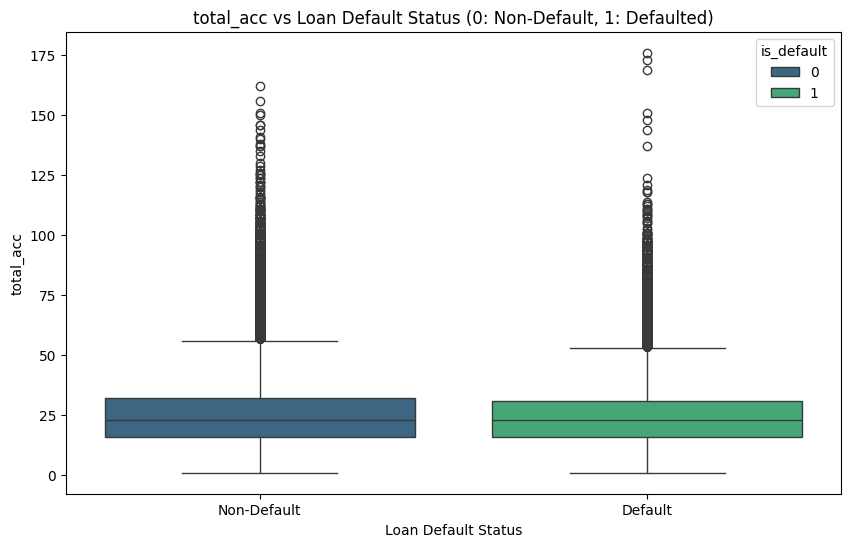

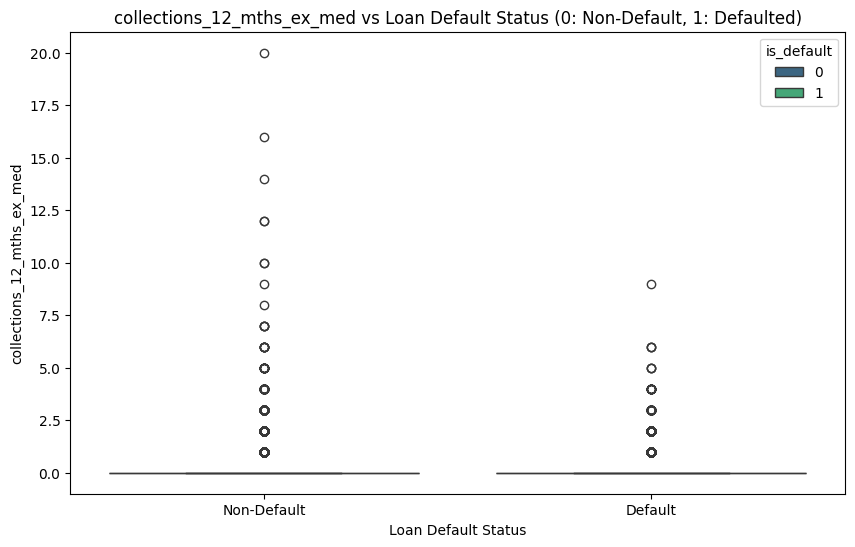

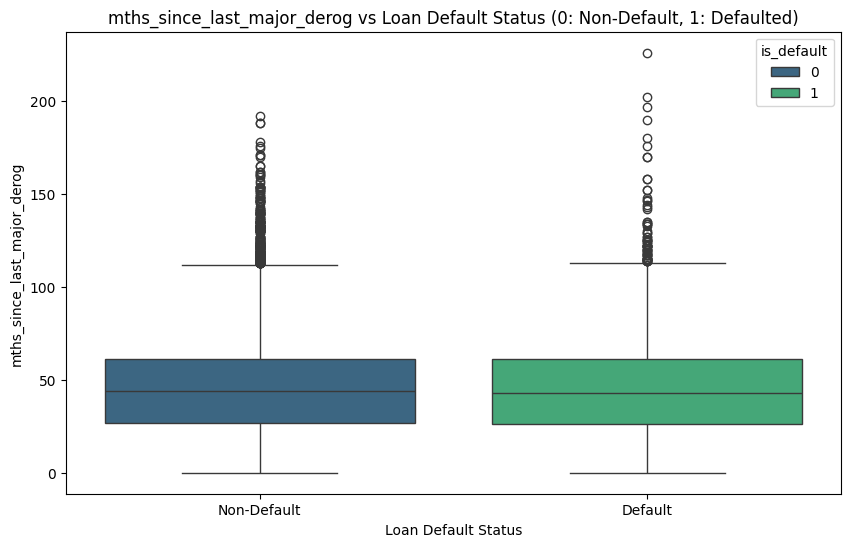

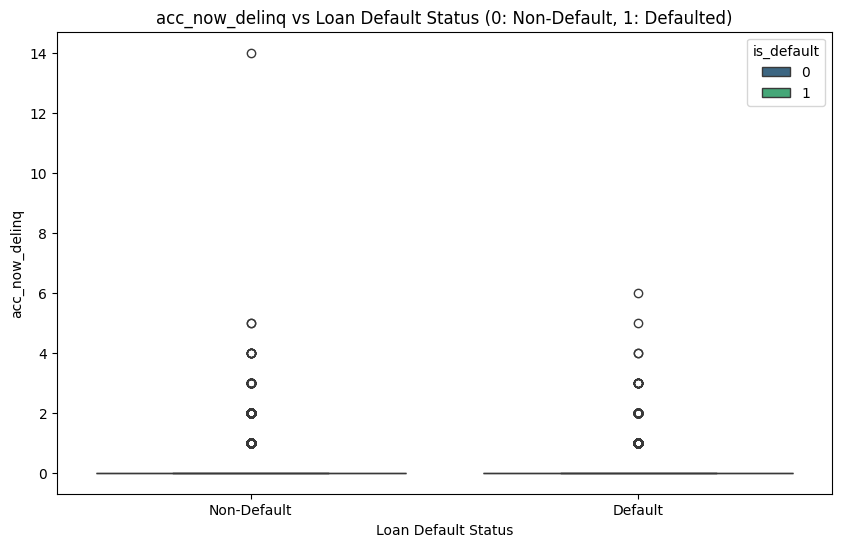

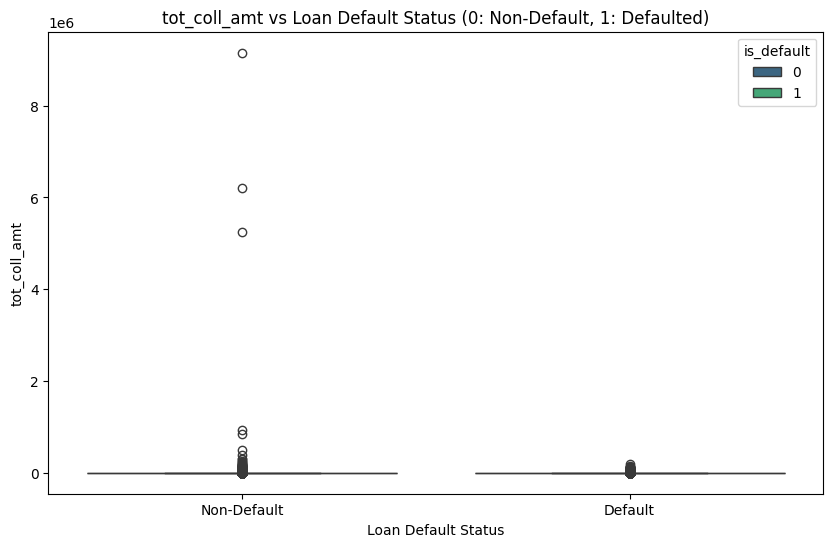

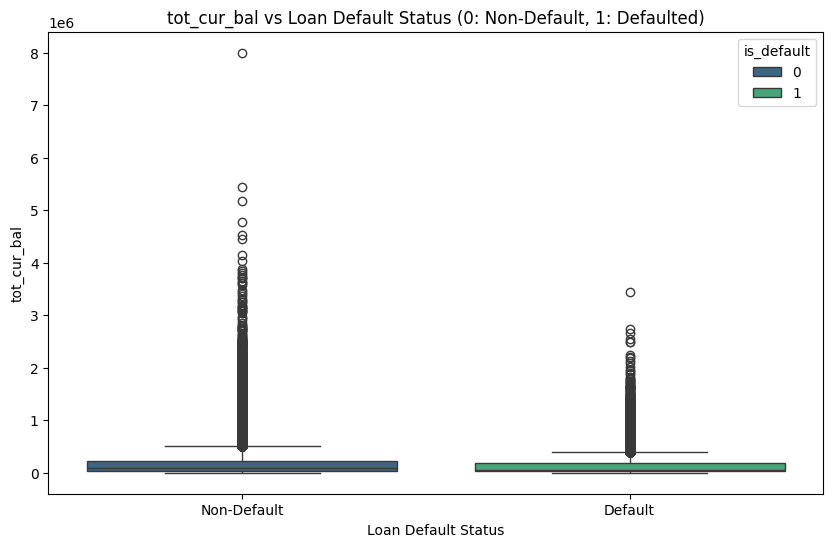

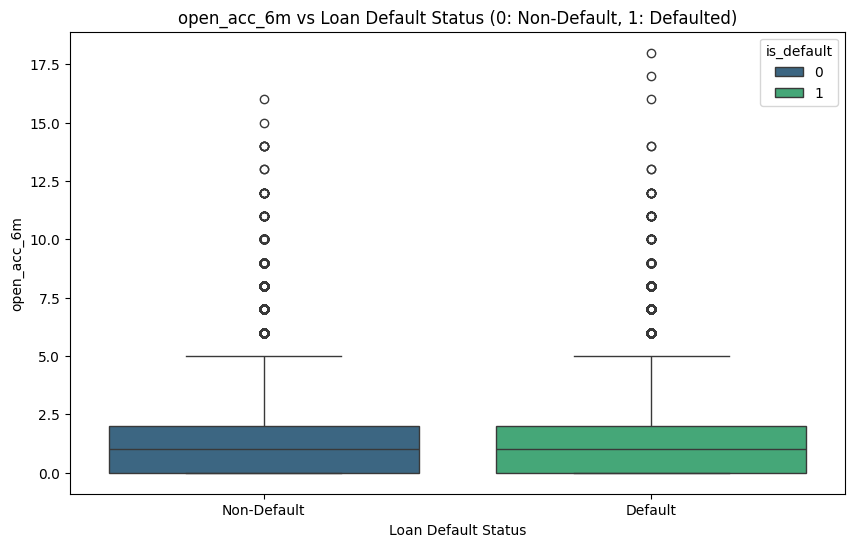

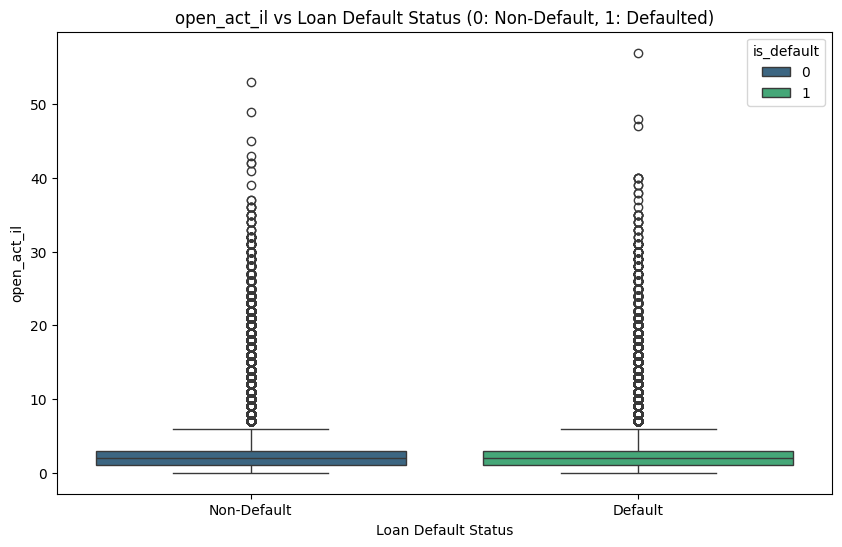

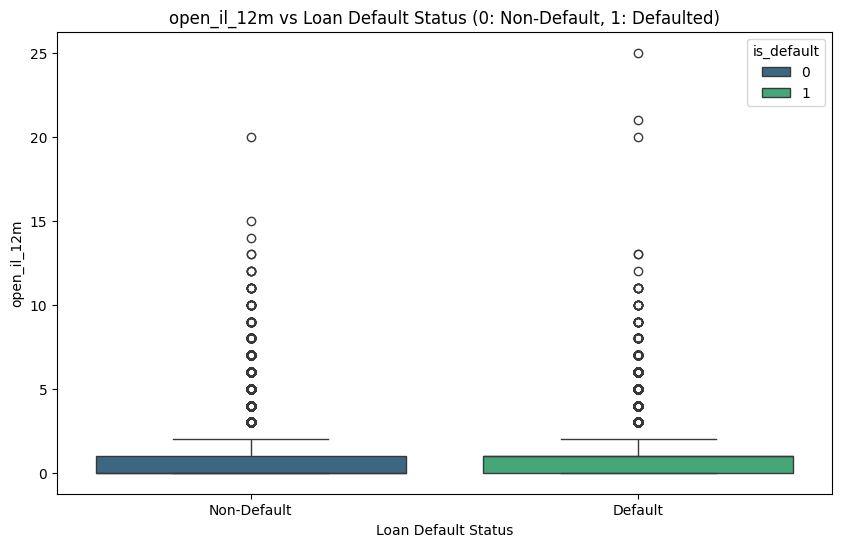

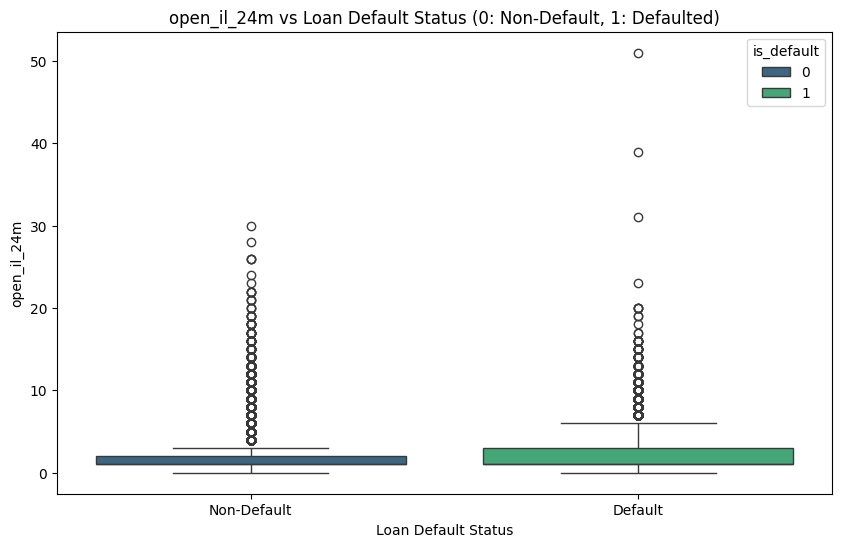

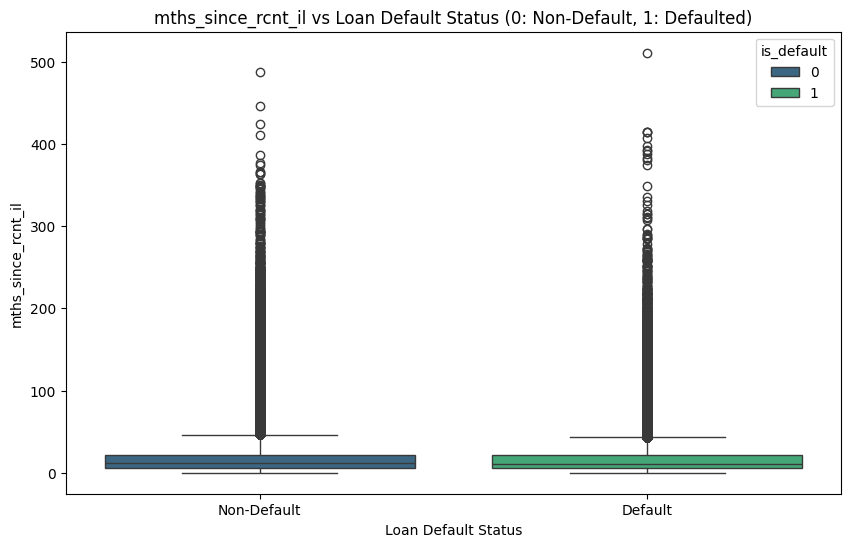

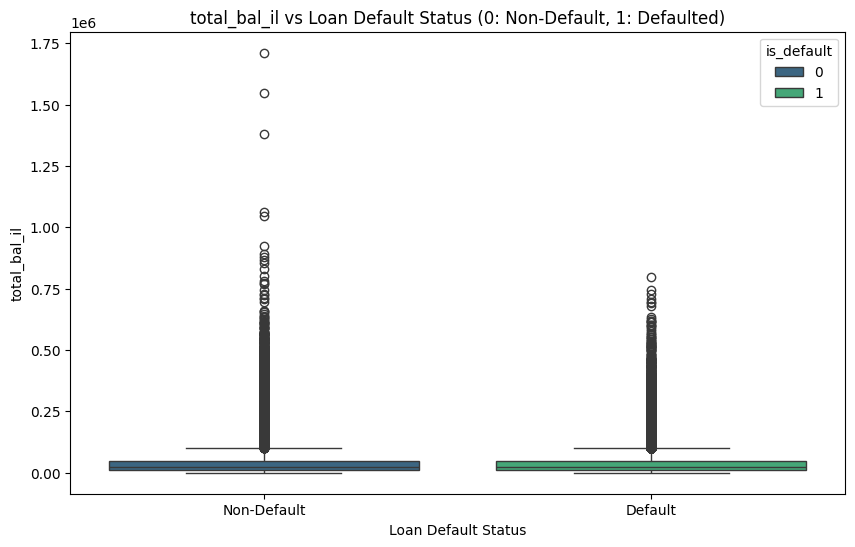

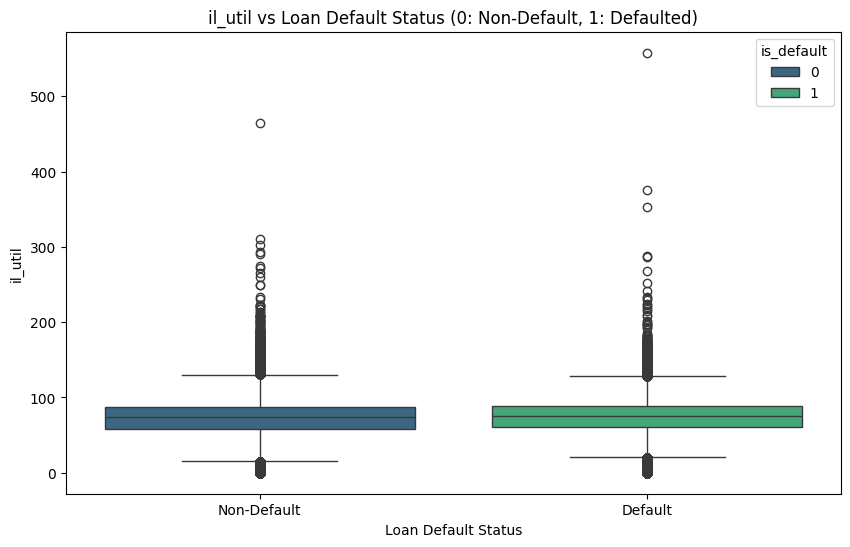

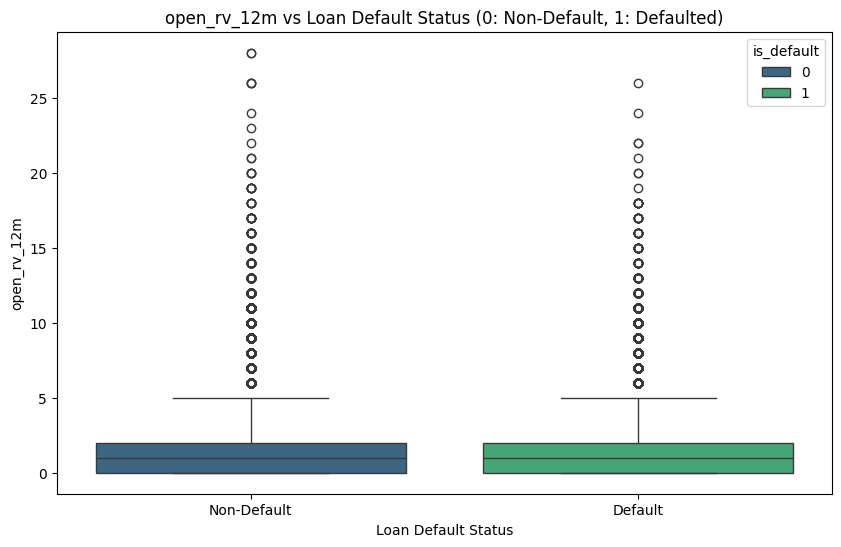

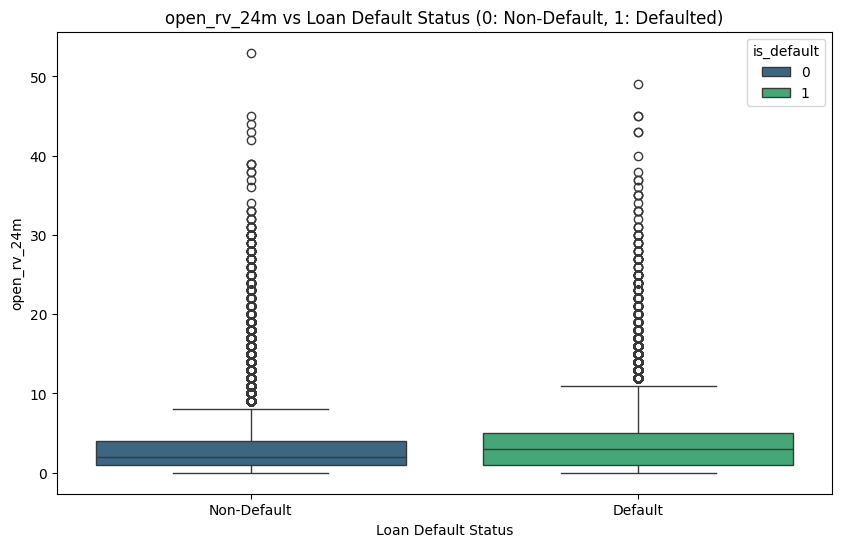

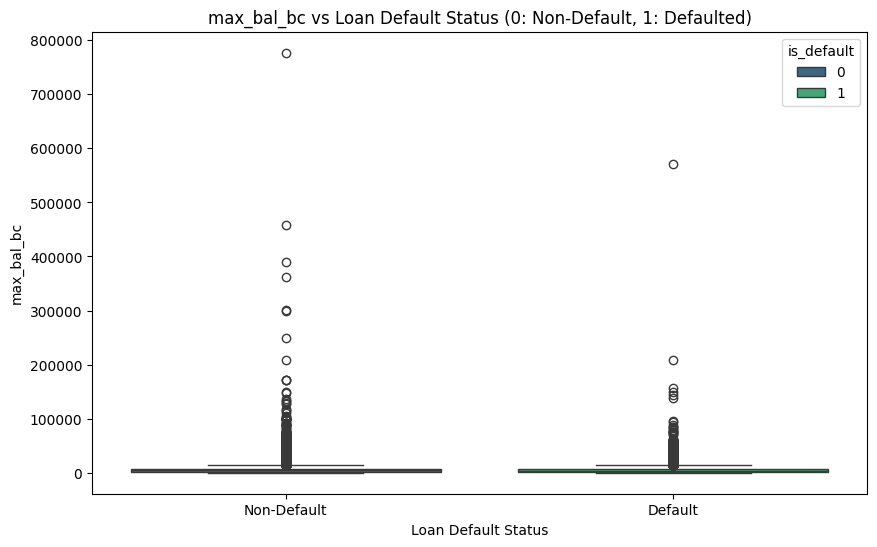

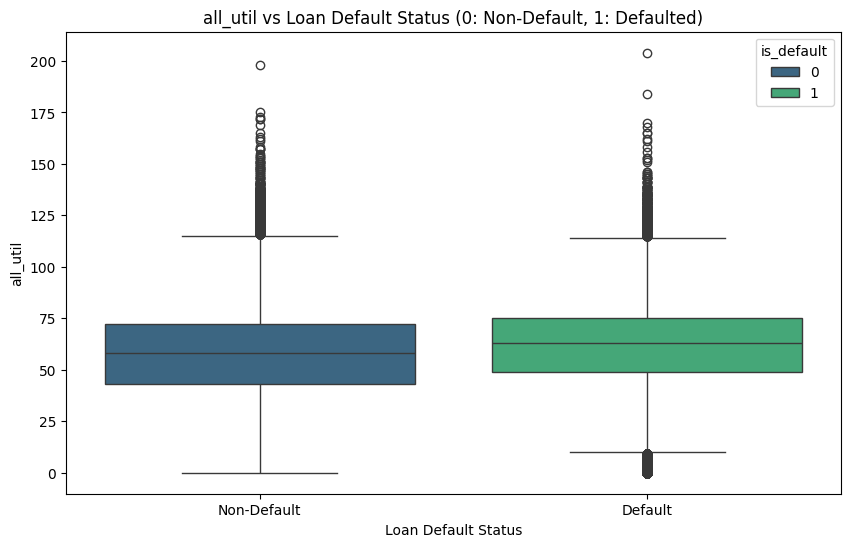

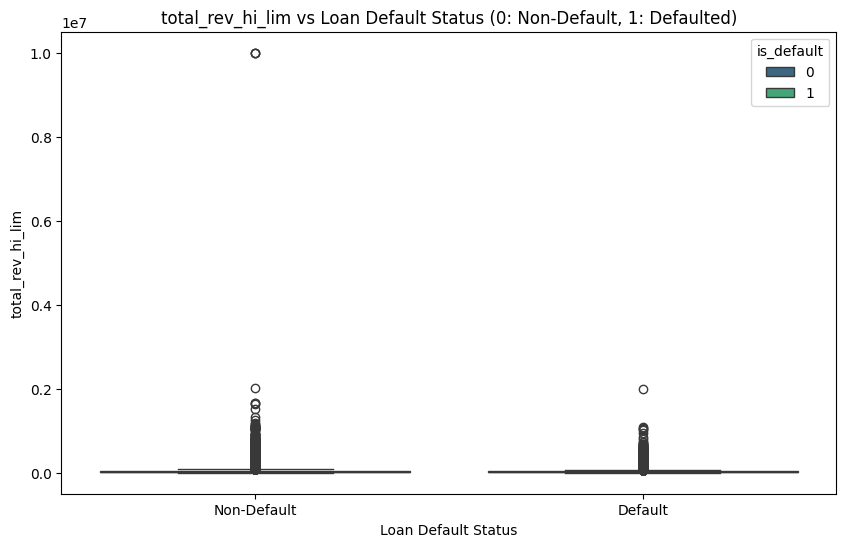

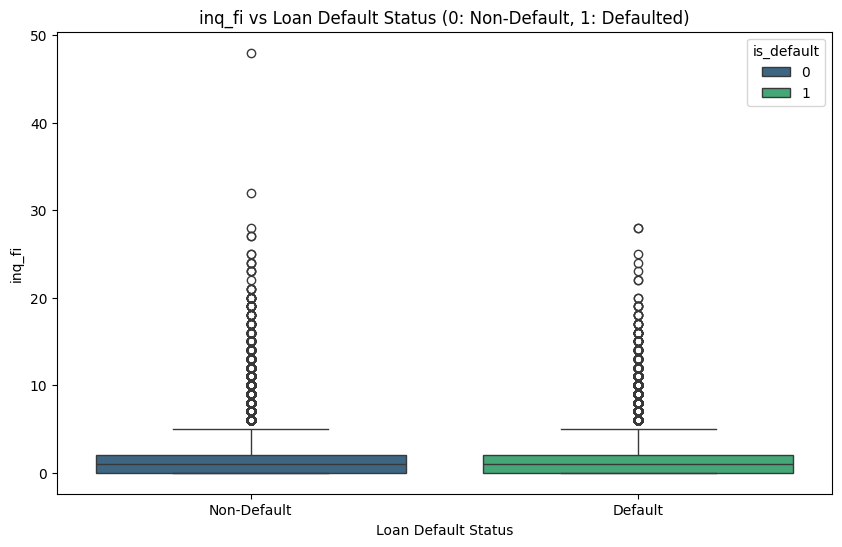

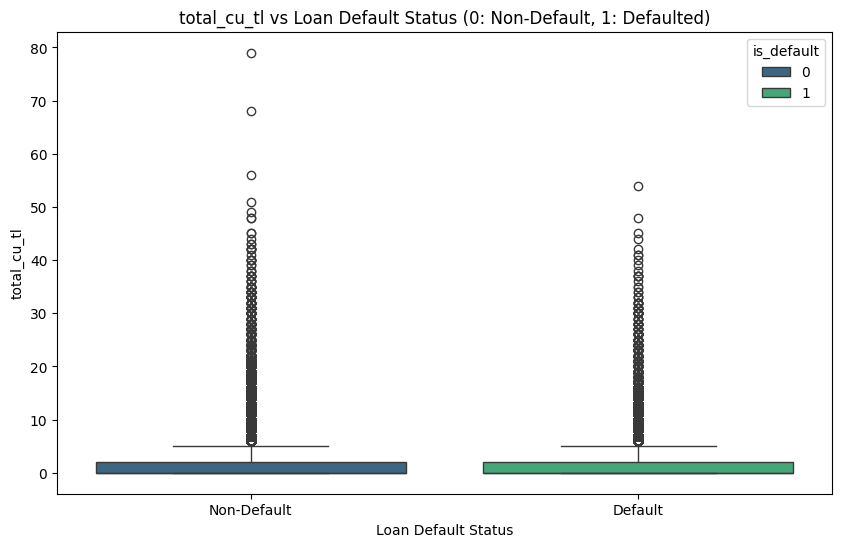

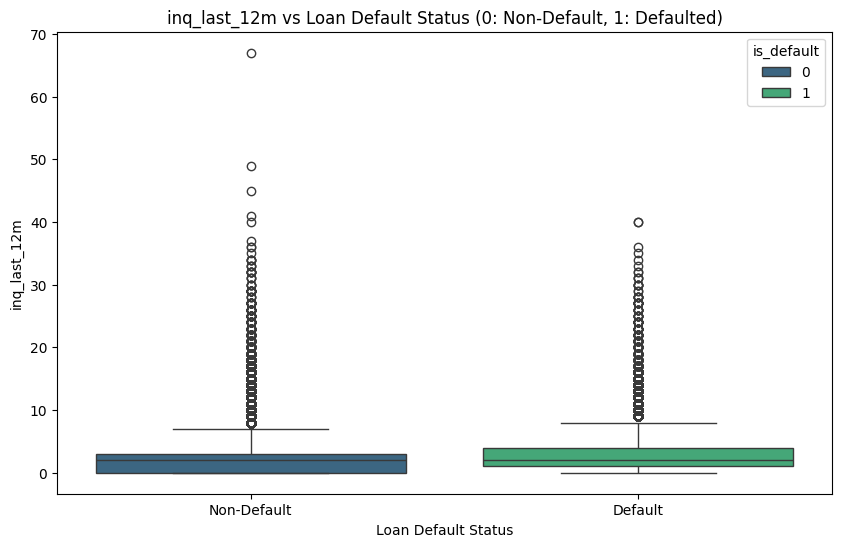

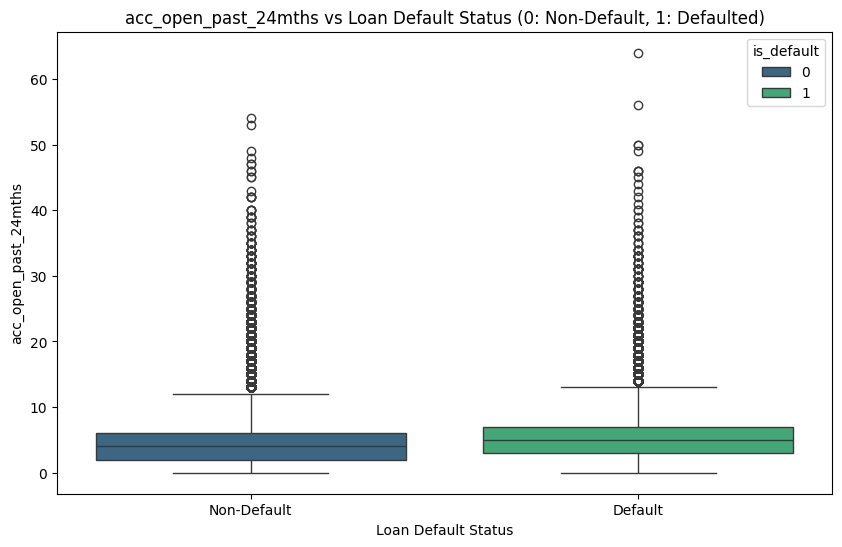

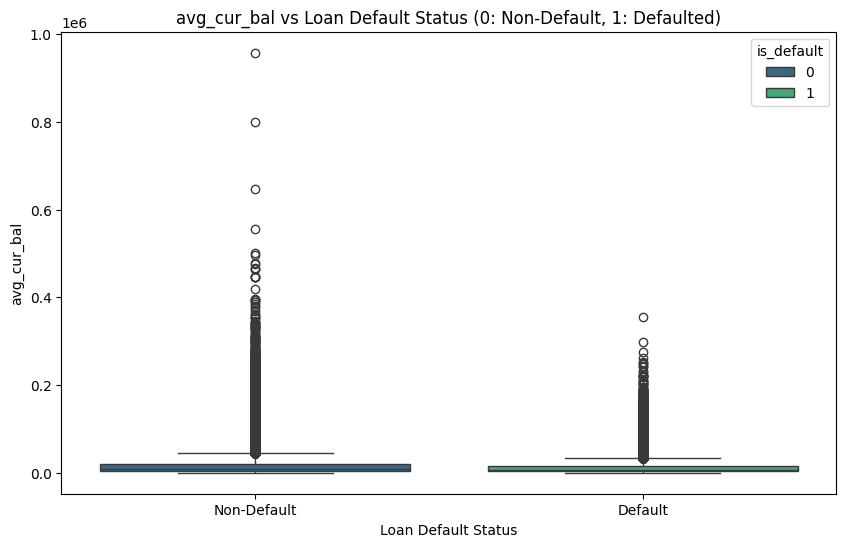

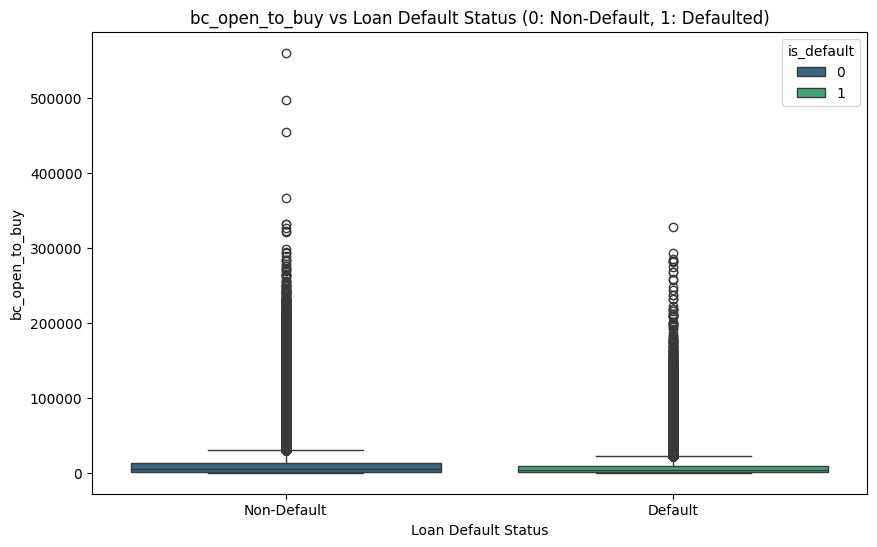

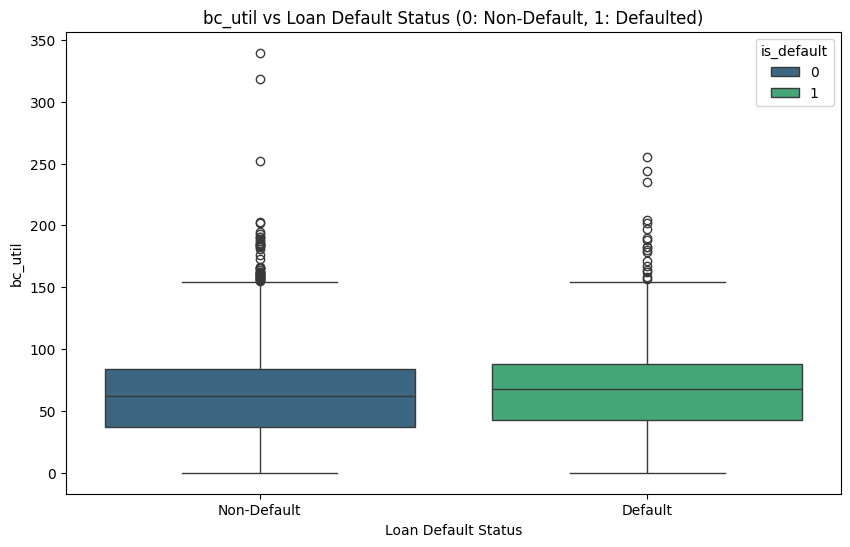

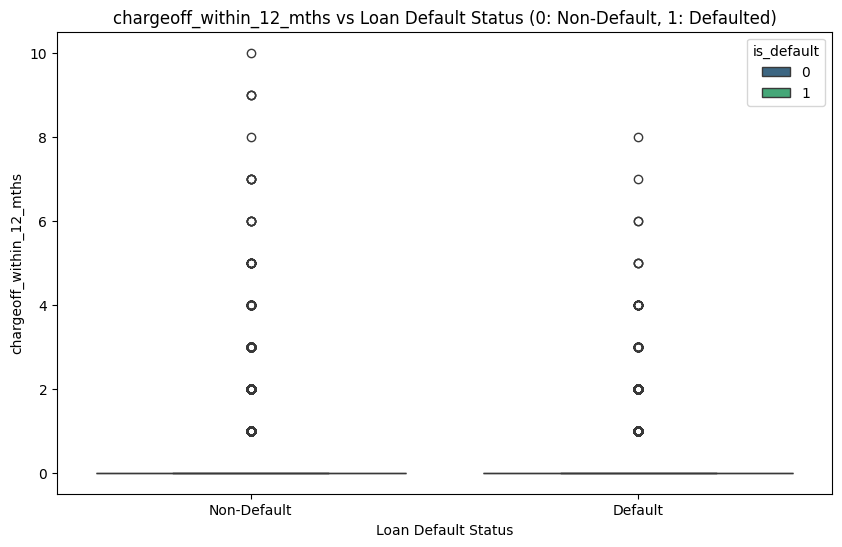

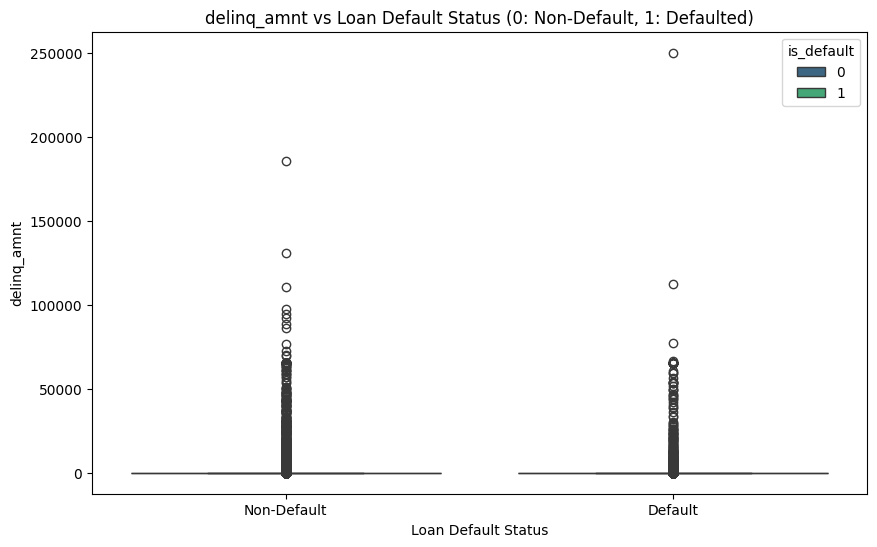

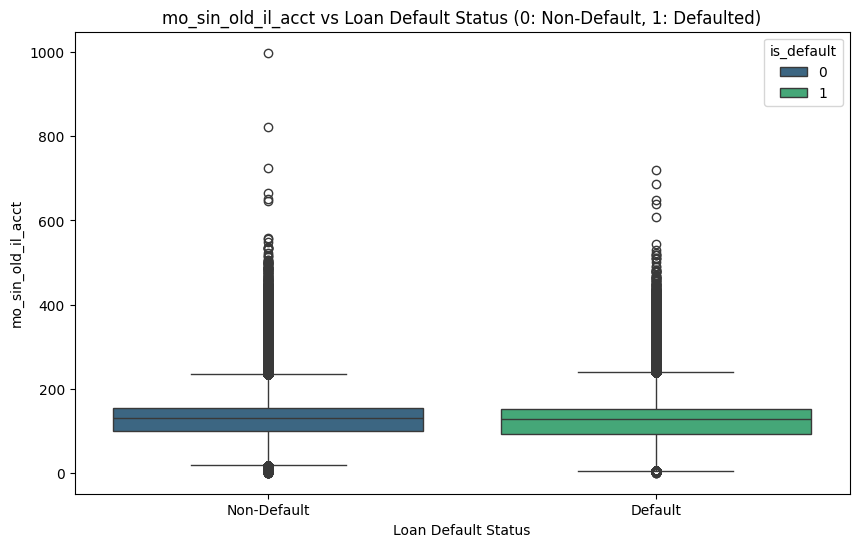

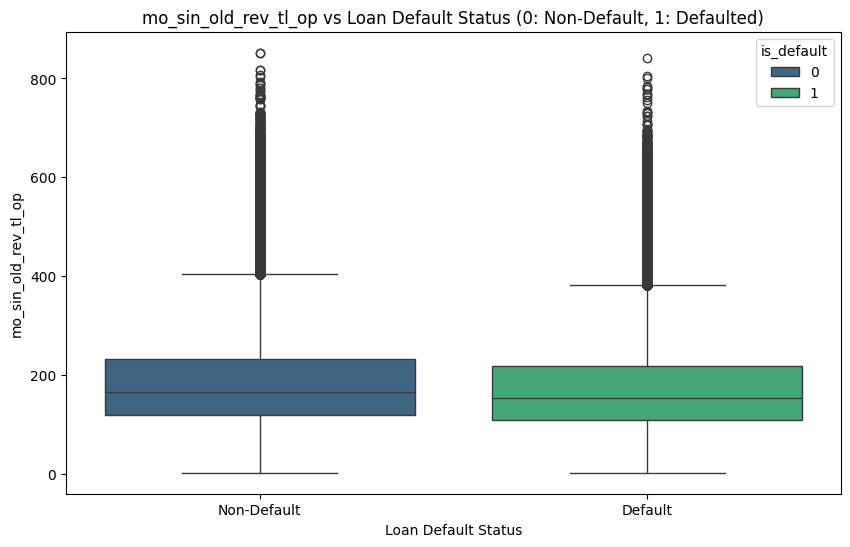

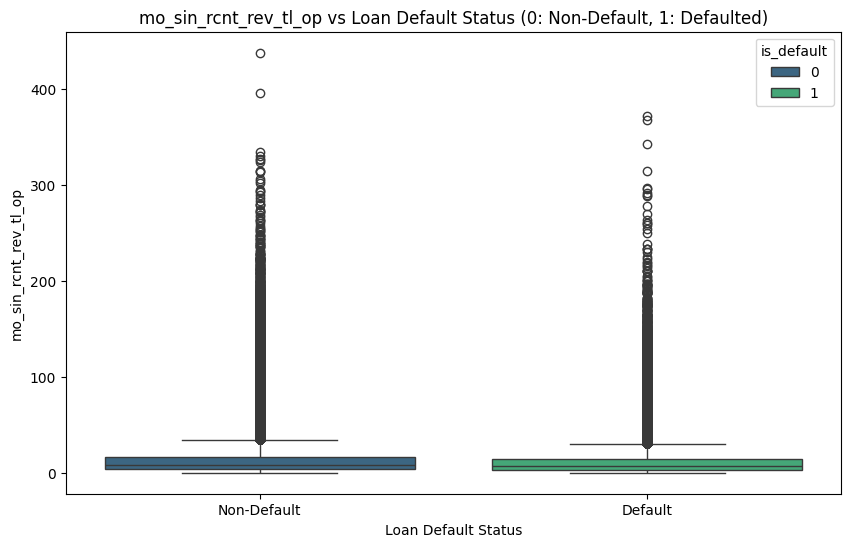

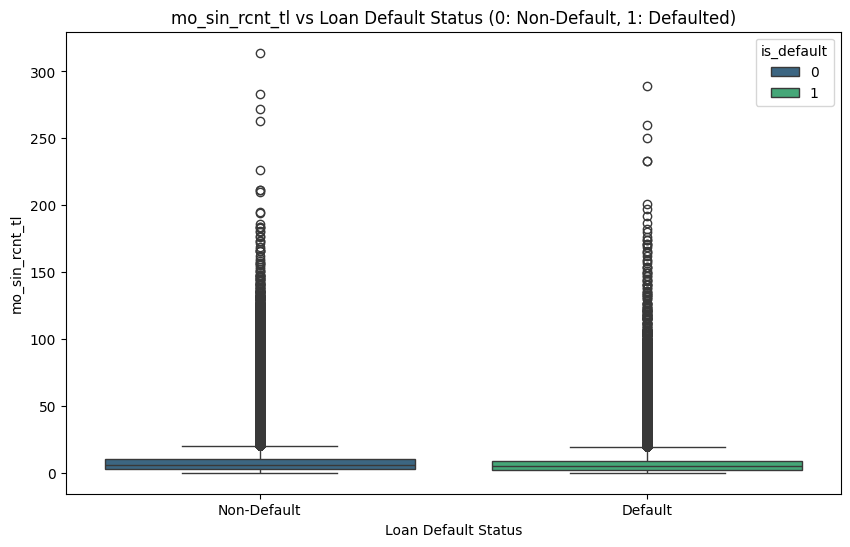

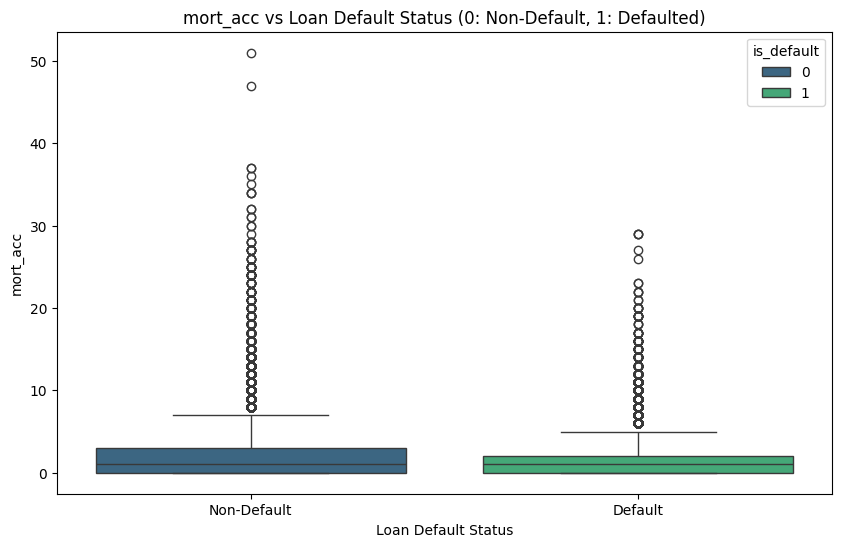

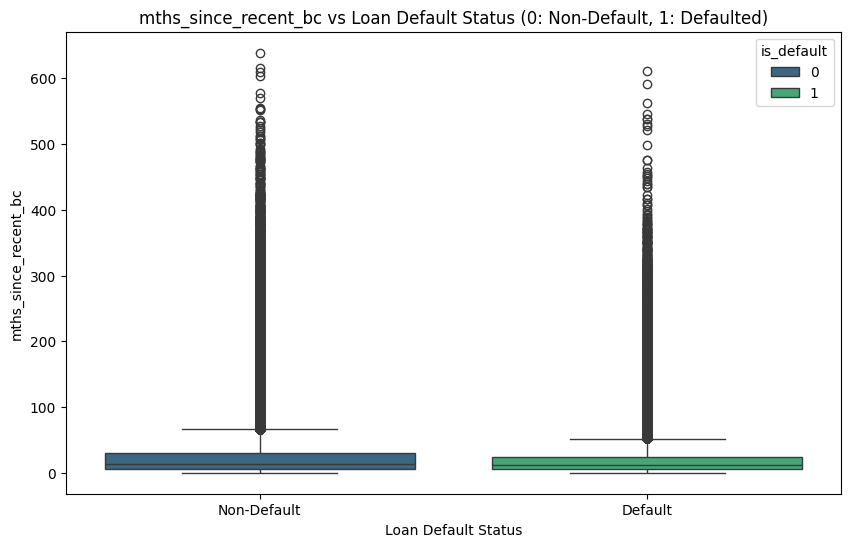

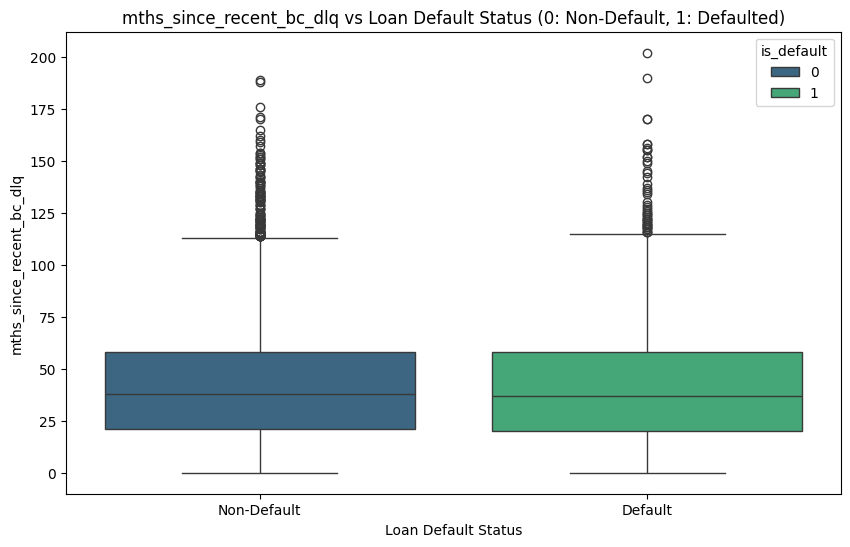

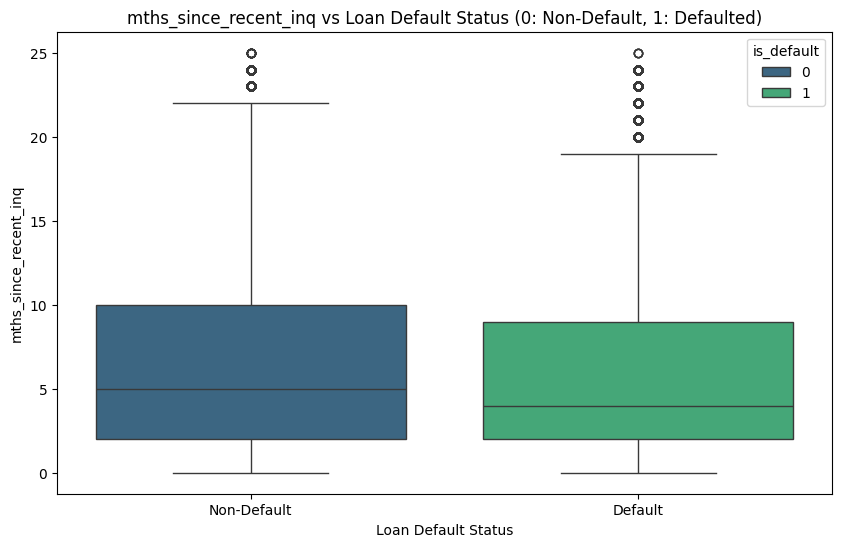

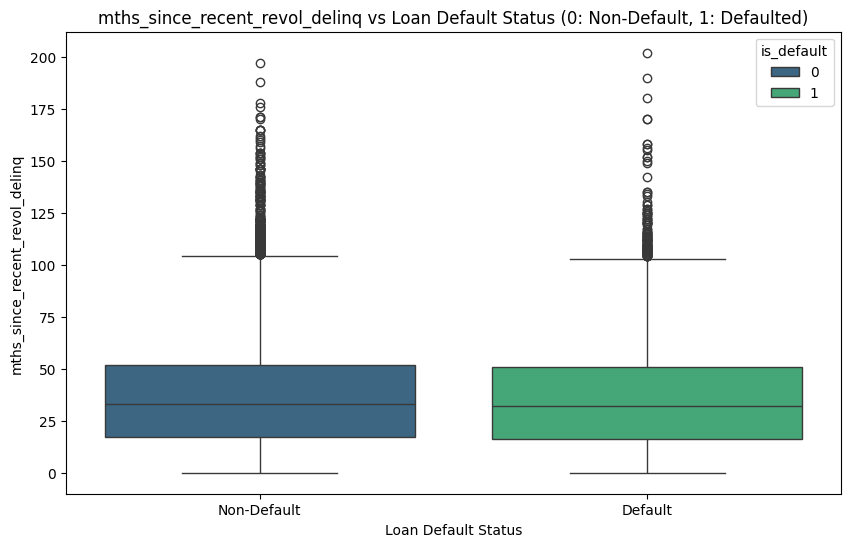

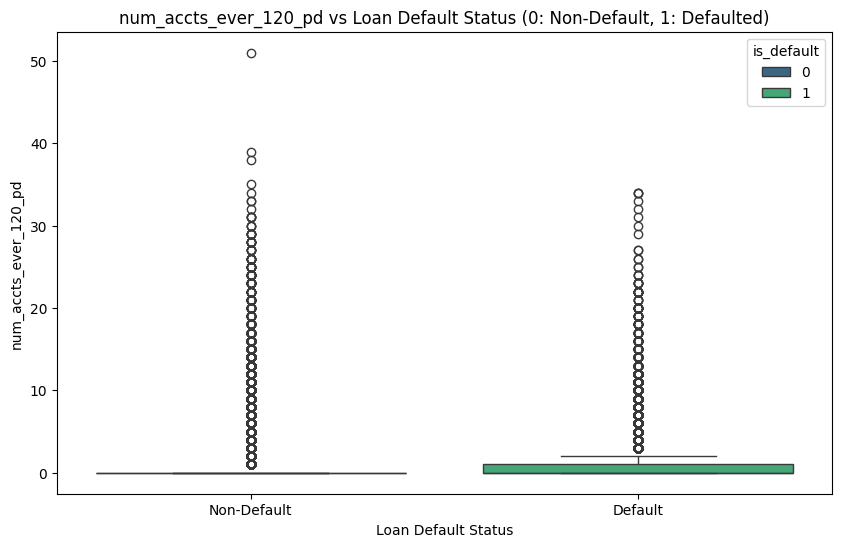

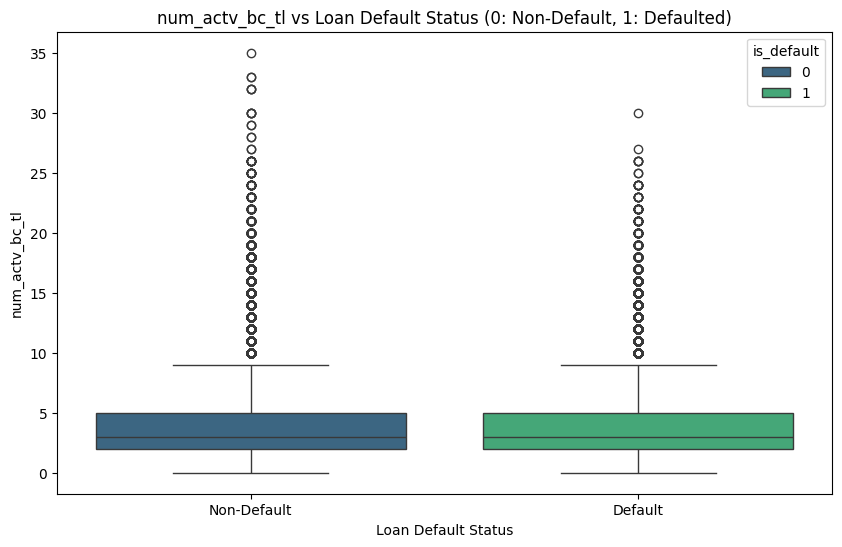

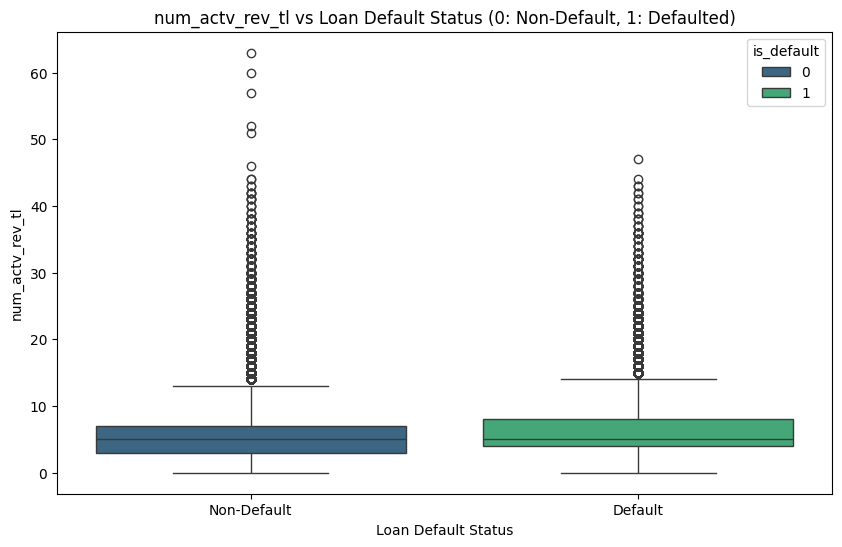

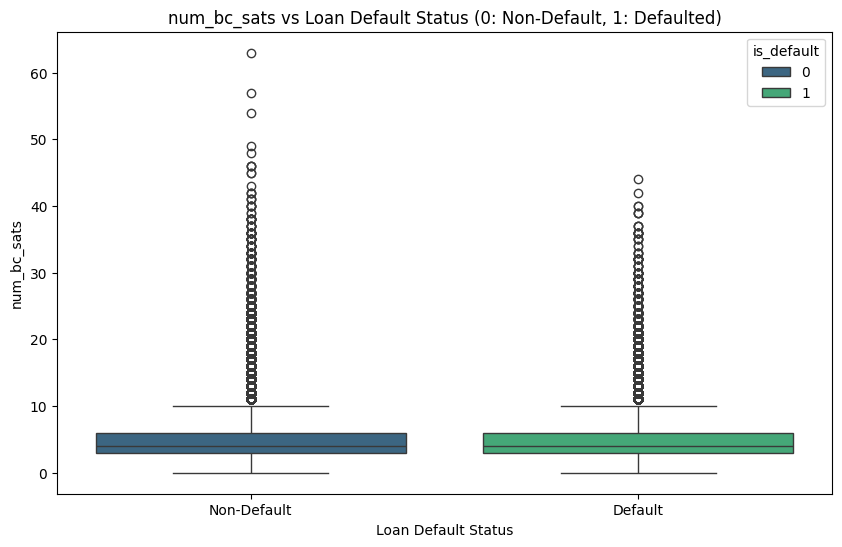

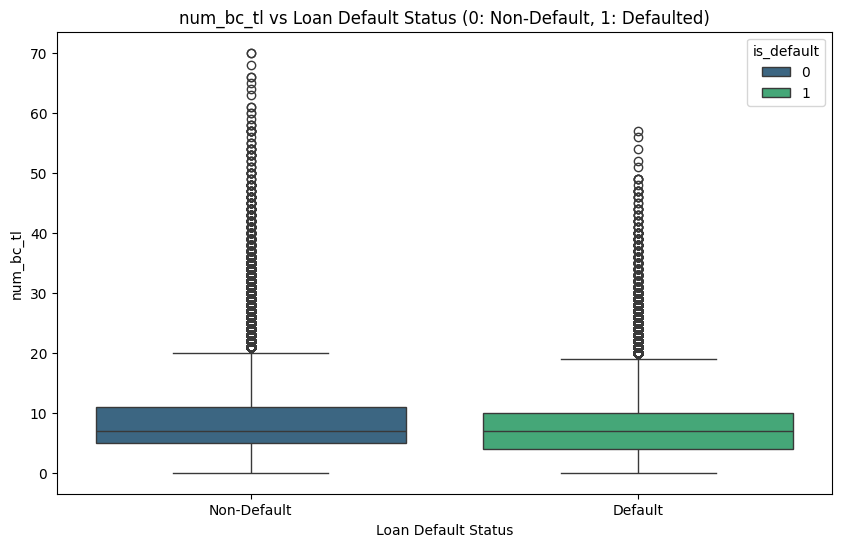

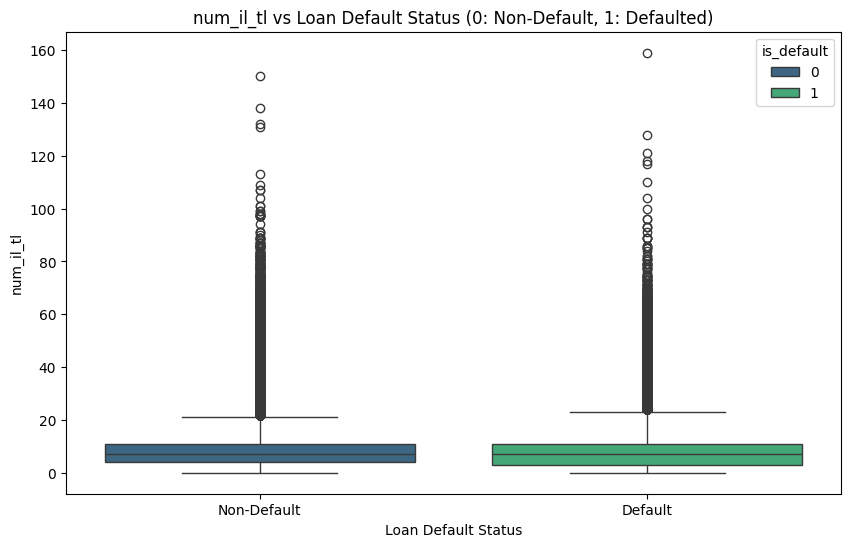

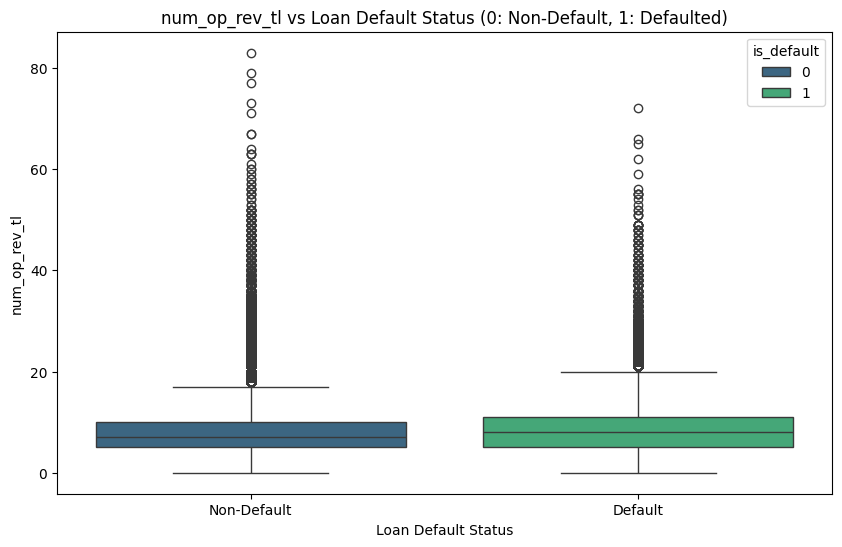

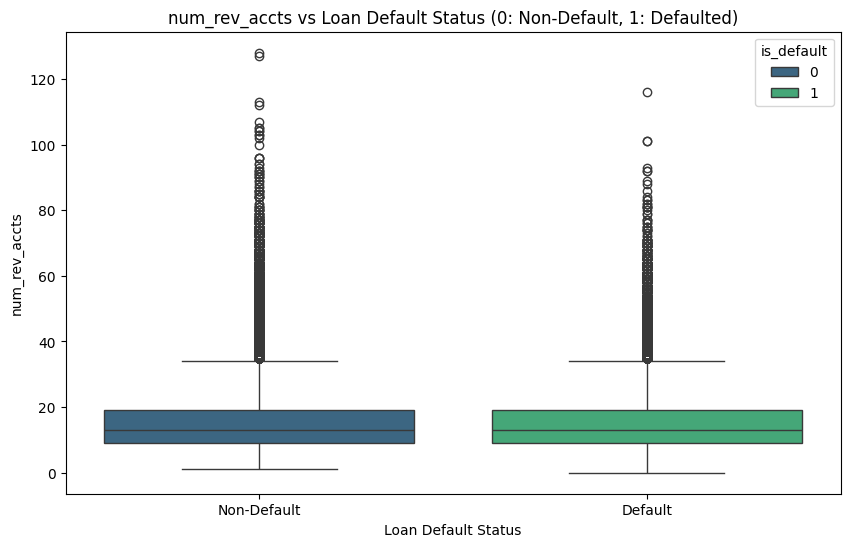

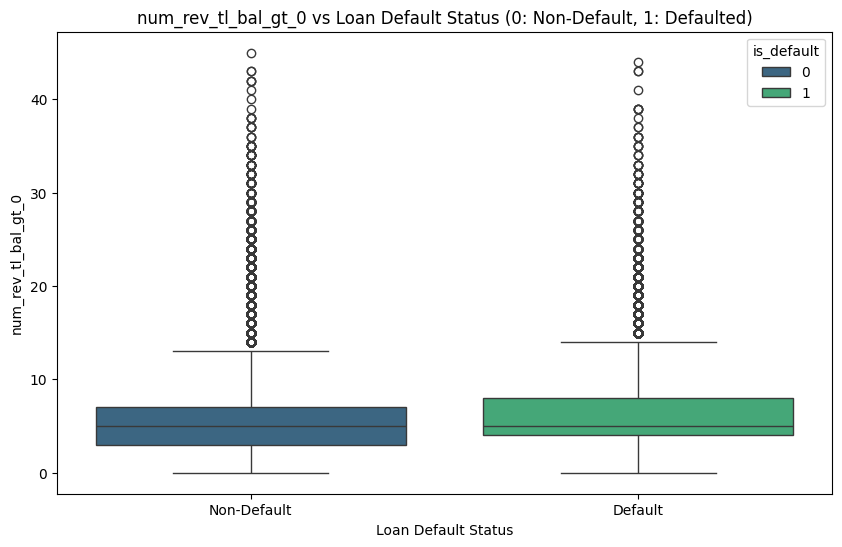

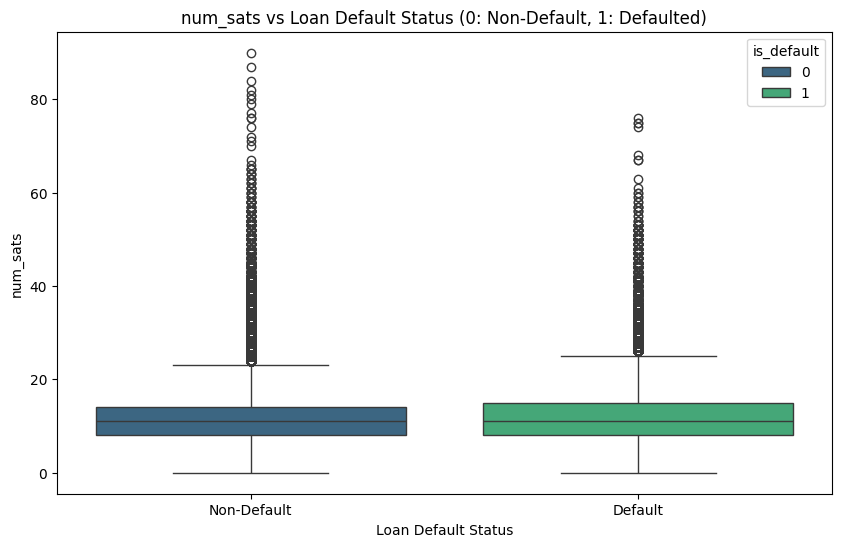

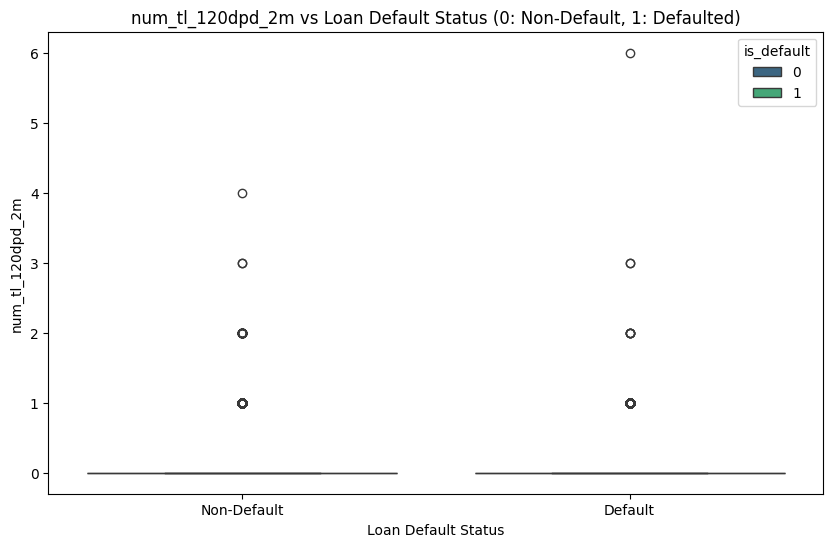

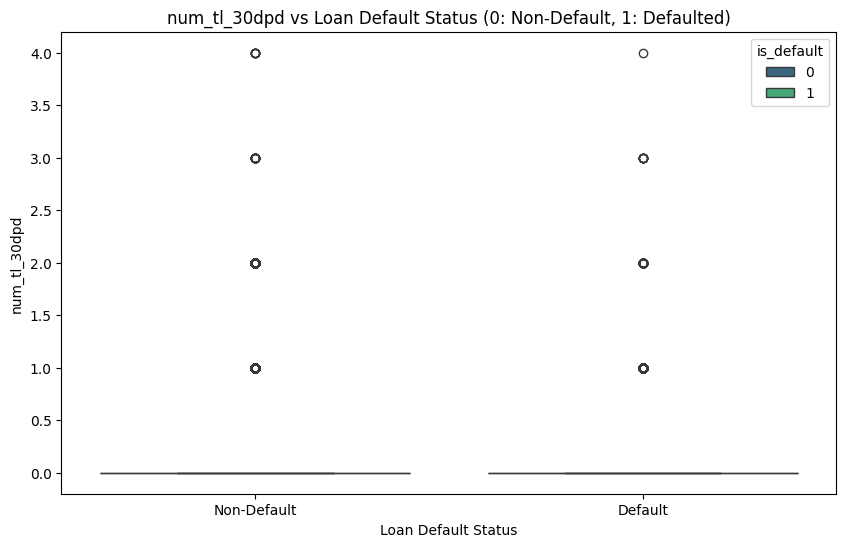

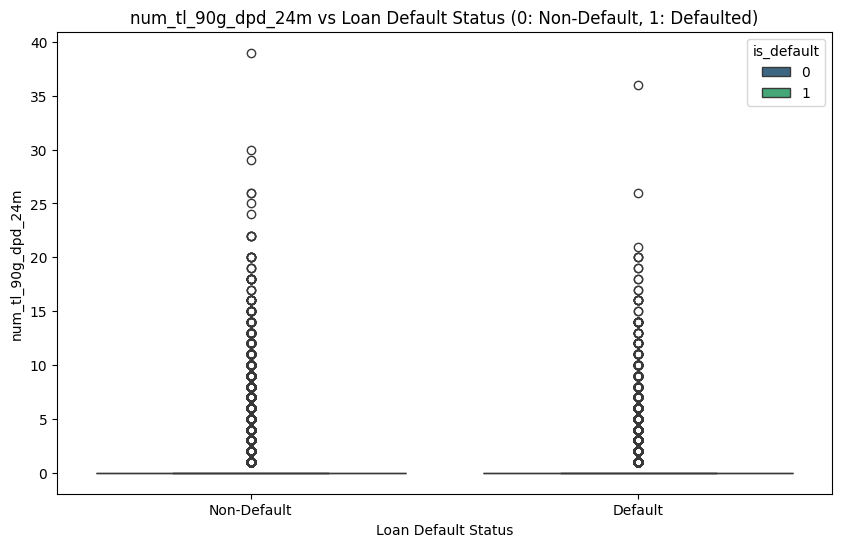

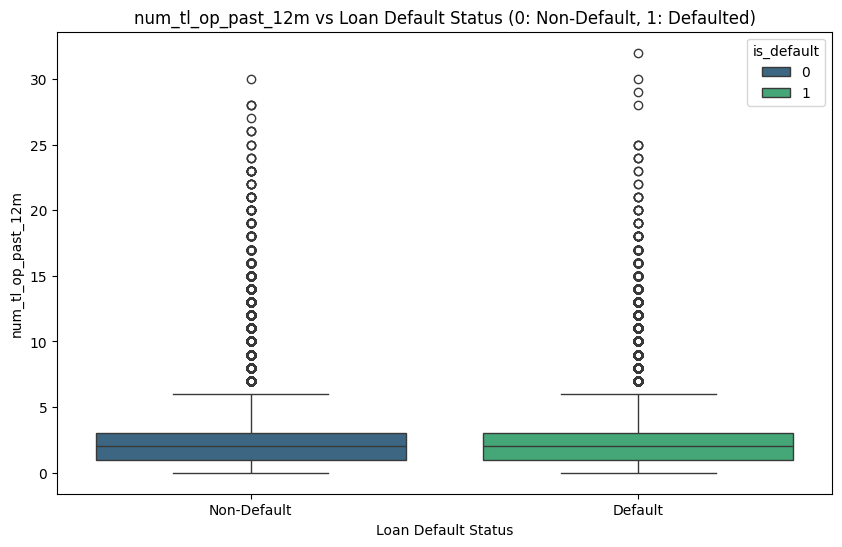

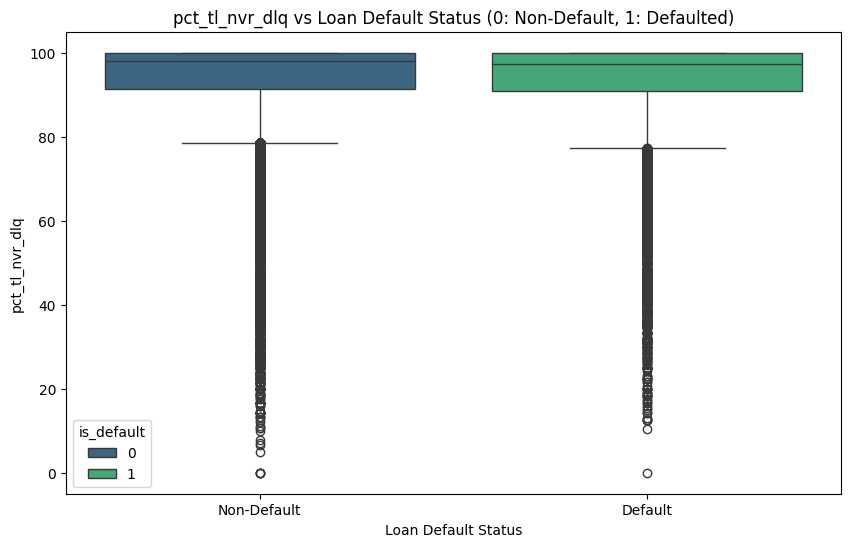

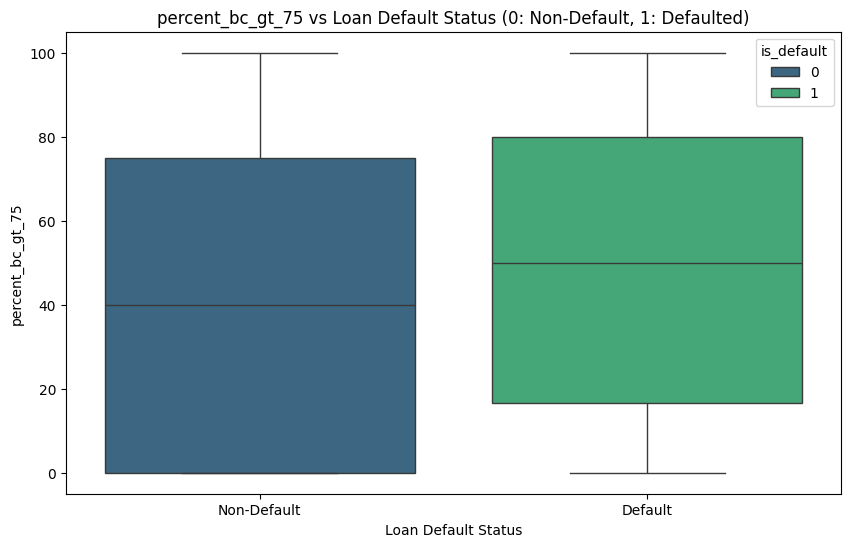

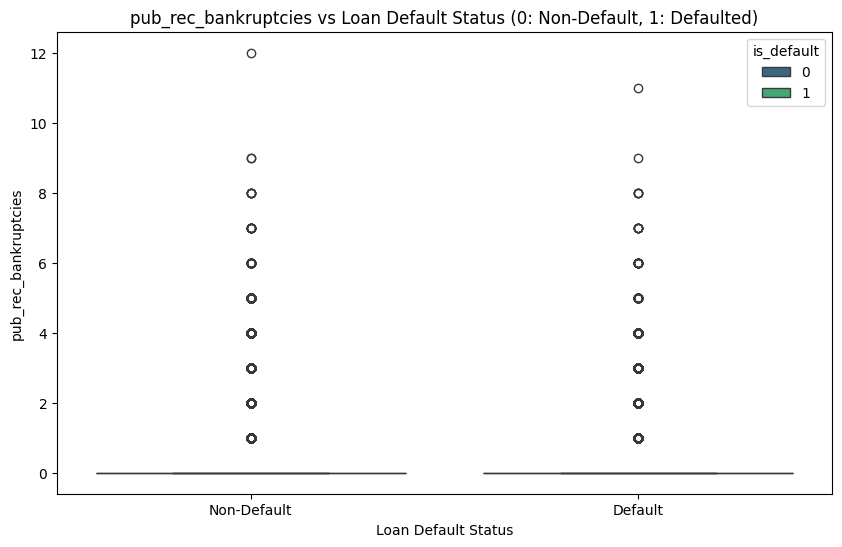

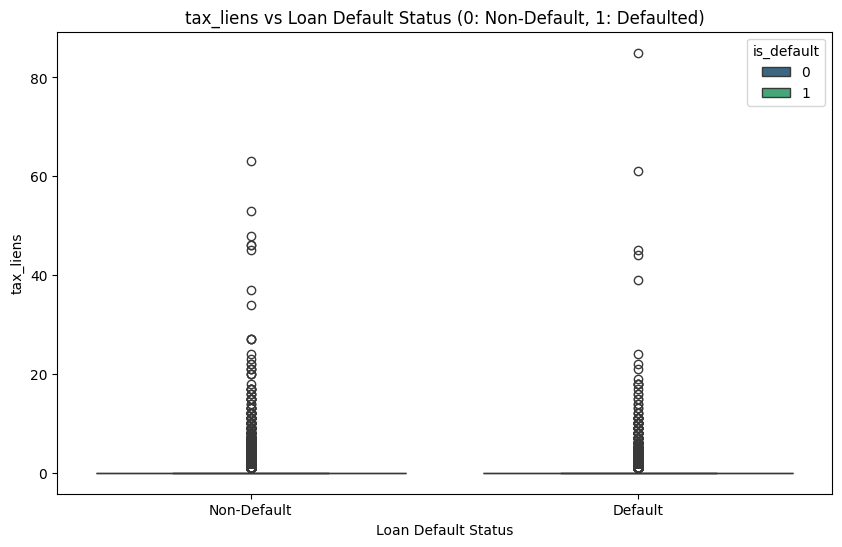

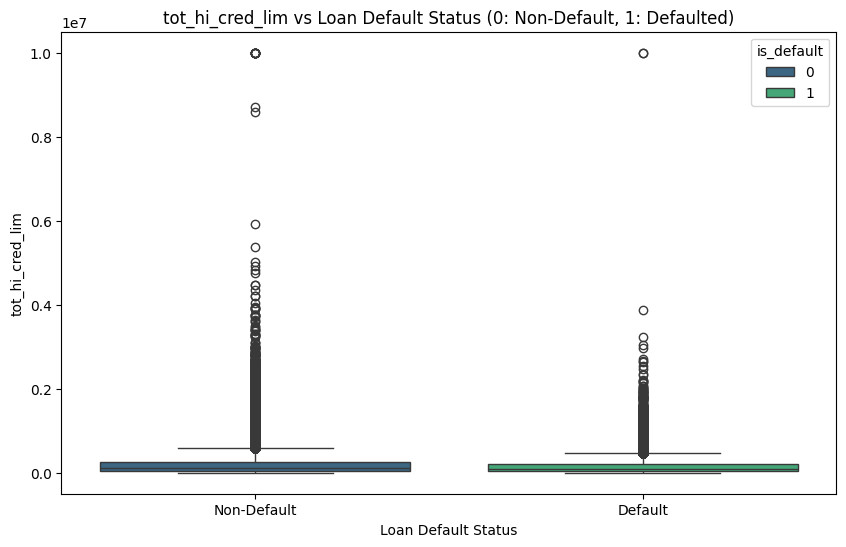

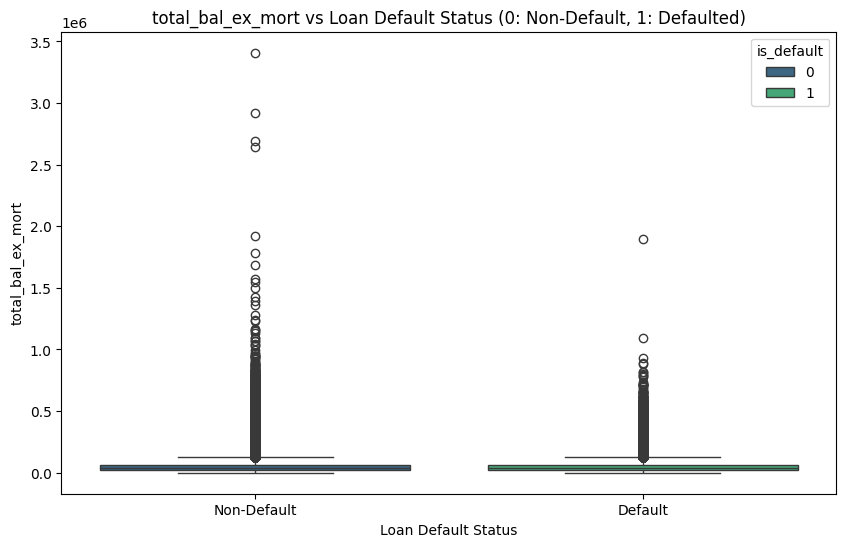

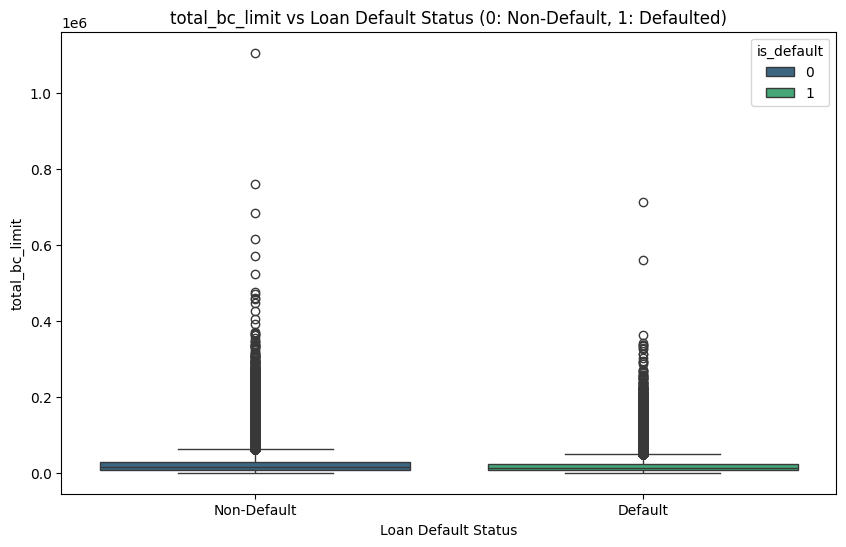

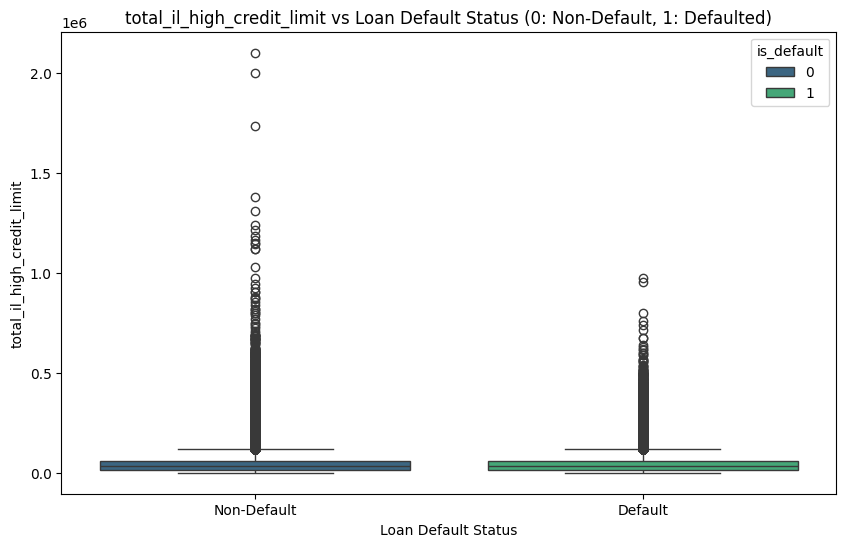

In [16]:
df_combined = pd.concat([X, y], axis=1)  # Combine features and target variable for correlation analysis (ease of visualization)

numerical_plot = numerical_col

for col in numerical_plot:
    if col in df_combined.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='is_default', y=col, data=df_combined.dropna(subset=[col]), hue='is_default', palette='viridis')
        plt.title(f'{col} vs Loan Default Status (0: Non-Default, 1: Defaulted)')
        plt.xlabel('Loan Default Status')
        plt.ylabel(col)
        plt.xticks(ticks=[0, 1], labels=['Non-Default', 'Default'])
        plt.show()


In [ ]:
print("\nMean/Median of Numerical Features by Default Status:")
for col in numerical_plot:
    if col in df_combined.columns:
        mean_by_status = df_combined.groupby('is_default')[col].mean() # 1 means defaulted, 0 means non-defaulted
        median_by_status = df_combined.groupby('is_default')[col].median()
        print(f"\n--- {col} ---")
        print("Mean: ")
        print(mean_by_status)
        print("Median: ")
        print(median_by_status)


Mean/Median of Numerical Features by Default Status:

--- loan_amnt ---
Mean: 
is_default
0    14124.637238
1    15651.067301
Name: loan_amnt, dtype: float64
Median: 
is_default
0    12000.0
1    14400.0
Name: loan_amnt, dtype: float64

--- int_rate ---
Mean: 
is_default
0    12.625786
1    15.702438
Name: int_rate, dtype: float64
Median: 
is_default
0    12.29
1    15.04
Name: int_rate, dtype: float64

--- installment ---
Mean: 
is_default
0    431.057382
1    467.327366
Name: installment, dtype: float64
Median: 
is_default
0    367.80
1    404.27
Name: installment, dtype: float64

--- annual_inc ---
Mean: 
is_default
0    77695.718632
1    70887.979385
Name: annual_inc, dtype: float64
Median: 
is_default
0    65000.0
1    60000.0
Name: annual_inc, dtype: float64

--- dti ---
Mean: 
is_default
0    17.804800
1    20.154236
Name: dti, dtype: float64
Median: 
is_default
0    17.10
1    19.68
Name: dti, dtype: float64

--- delinq_2yrs ---
Mean: 
is_default
0    0.309185
1    0.352038
Na


Correlation of Numerical Features with Default Status:
int_rate                0.263009
acc_open_past_24mths    0.099789
num_tl_op_past_12m      0.085194
dti                     0.084940
all_util                0.084653
                          ...   
avg_cur_bal            -0.078614
mort_acc               -0.079389
bc_open_to_buy         -0.079421
fico_range_high        -0.129575
fico_range_low         -0.129576
Name: is_default, Length: 72, dtype: float64


C:\Users\Agnivesh Kaundinya\AppData\Local\Temp\ipykernel_2032\2060532909.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.head(15).values, y=correlations.head(15).index, palette='viridis')


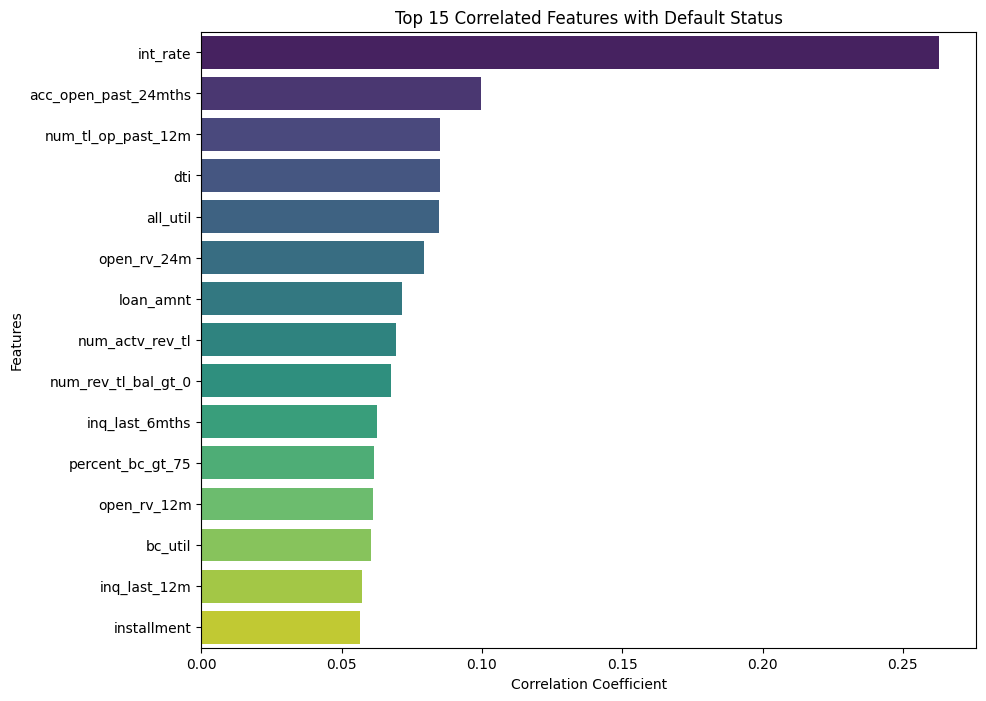

C:\Users\Agnivesh Kaundinya\AppData\Local\Temp\ipykernel_2032\2060532909.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.tail(15).values, y=correlations.tail(15).index, palette='viridis')


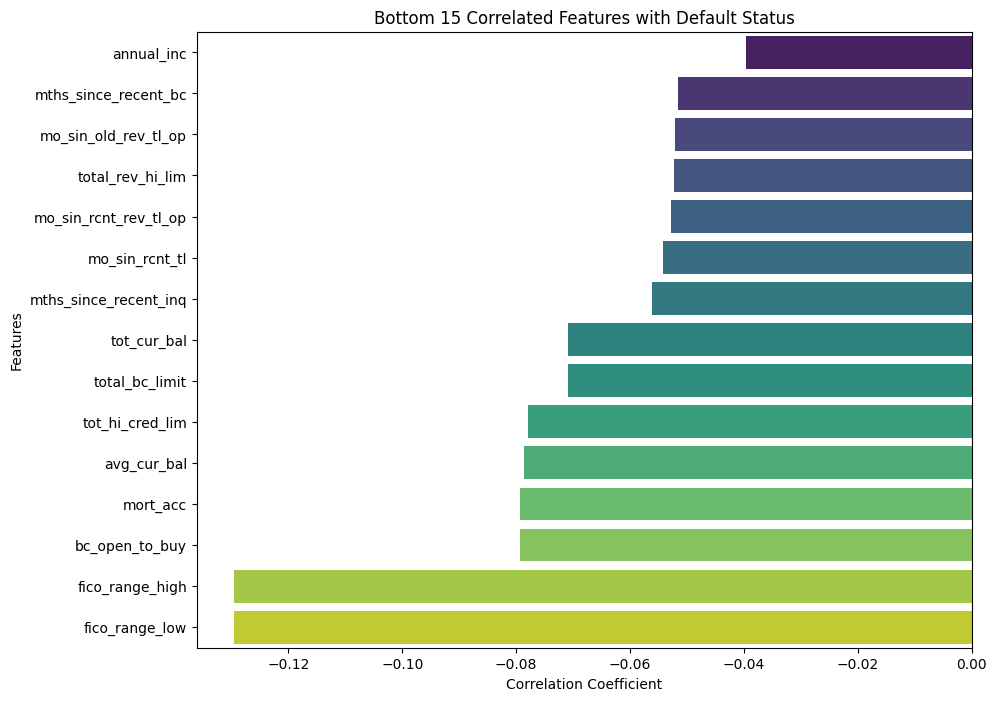

In [23]:
print("\nCorrelation of Numerical Features with Default Status:")

correlations = df_combined[numerical_col + ['is_default']].corr()['is_default'].sort_values(ascending=False)
correlations = correlations.drop('is_default', errors='ignore') # Exclude self-correlation
print(correlations) 

if not correlations.empty:
    plt.figure(figsize=(10, 8))
    sns.barplot(x=correlations.head(15).values, y=correlations.head(15).index, palette='viridis')
    plt.title('Top 15 Correlated Features with Default Status')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Features')
    plt.show()

    # negative correlations
    plt.figure(figsize=(10, 8))
    sns.barplot(x=correlations.tail(15).values, y=correlations.tail(15).index, palette='viridis')
    plt.title('Bottom 15 Correlated Features with Default Status')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Features')
    plt.show()
    

These 30 features are the most correlated to is_default, but what's intruiging is that none of them are higher than .26? Shows that loan_defaults are definitely not just based on any ONE major factor. 



Correlation of Categorical Features with Default Status:

--- Default Rate by term ---
term
60 months    34.271278
36 months    17.032288
Name: is_default, dtype: float64


C:\Users\Agnivesh Kaundinya\AppData\Local\Temp\ipykernel_2032\765053702.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_by_category.values, y=default_rate_by_category.index, palette='viridis')


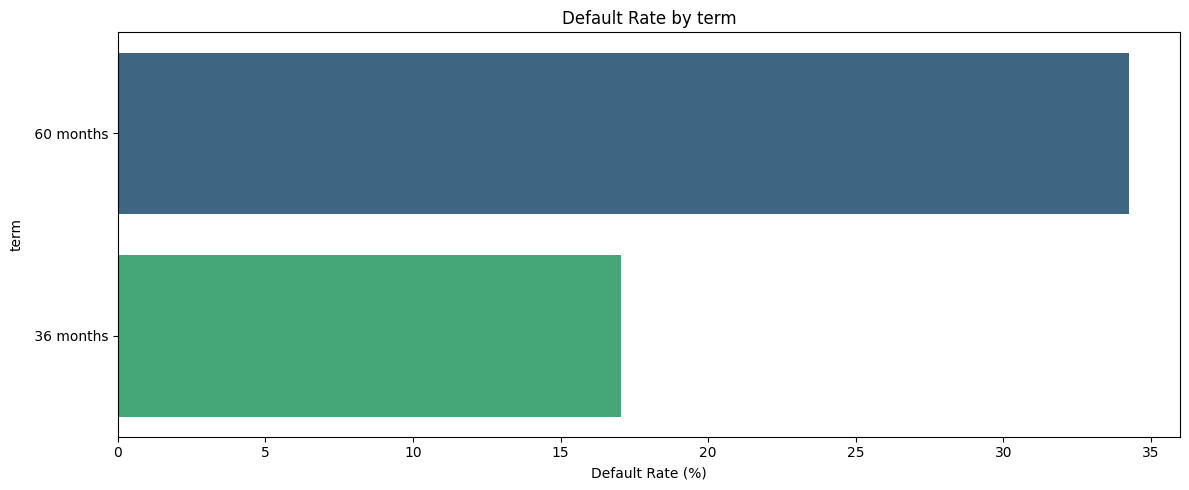


--- Default Rate by grade ---
grade
G    50.909851
F    46.211983
E    39.815065
D    31.986067
C    23.945757
B    14.438413
A     6.568717
Name: is_default, dtype: float64


C:\Users\Agnivesh Kaundinya\AppData\Local\Temp\ipykernel_2032\765053702.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_by_category.values, y=default_rate_by_category.index, palette='viridis')


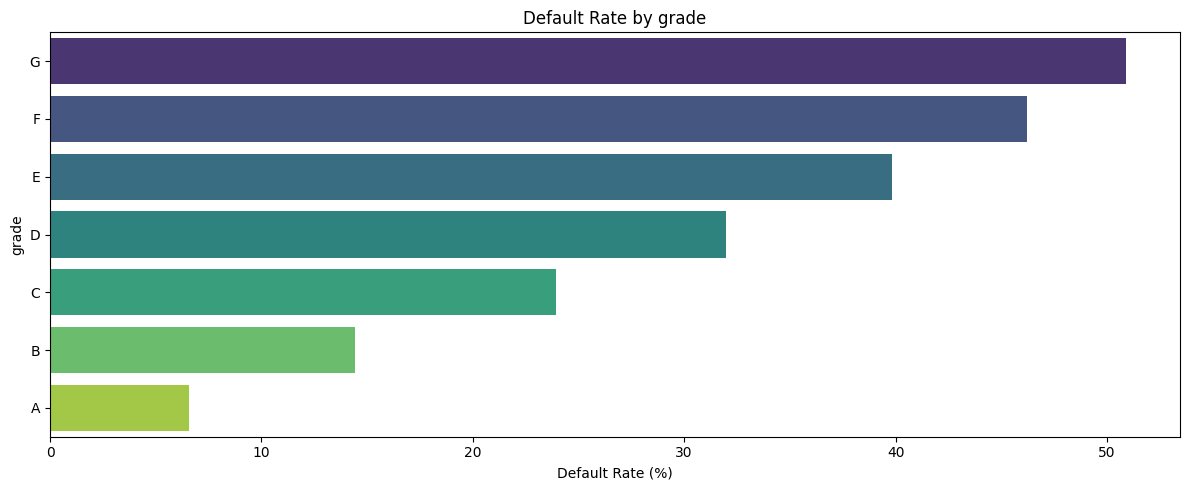


--- Default Rate by sub_grade ---
sub_grade
G5    54.304636
G4    52.387950
G3    51.997615
F5    50.379995
G2    49.863636
G1    49.101412
F4    48.940424
F2    46.107947
F3    46.102236
E5    43.511654
F1    43.358420
E4    41.426188
E3    40.180313
E2    38.669951
E1    37.213607
D5    35.206478
D4    33.950145
D3    32.272727
D2    31.068933
D1    29.306735
C5    27.773691
C4    26.579141
C3    24.024541
C2    22.080464
C1    20.248347
B5    18.025035
B4    15.952404
B3    13.900132
B2    12.274537
B1    11.347271
A5     8.993609
A4     7.456074
A3     6.114233
A2     5.147551
A1     3.545759
Name: is_default, dtype: float64


C:\Users\Agnivesh Kaundinya\AppData\Local\Temp\ipykernel_2032\765053702.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_by_category.values, y=default_rate_by_category.index, palette='viridis')


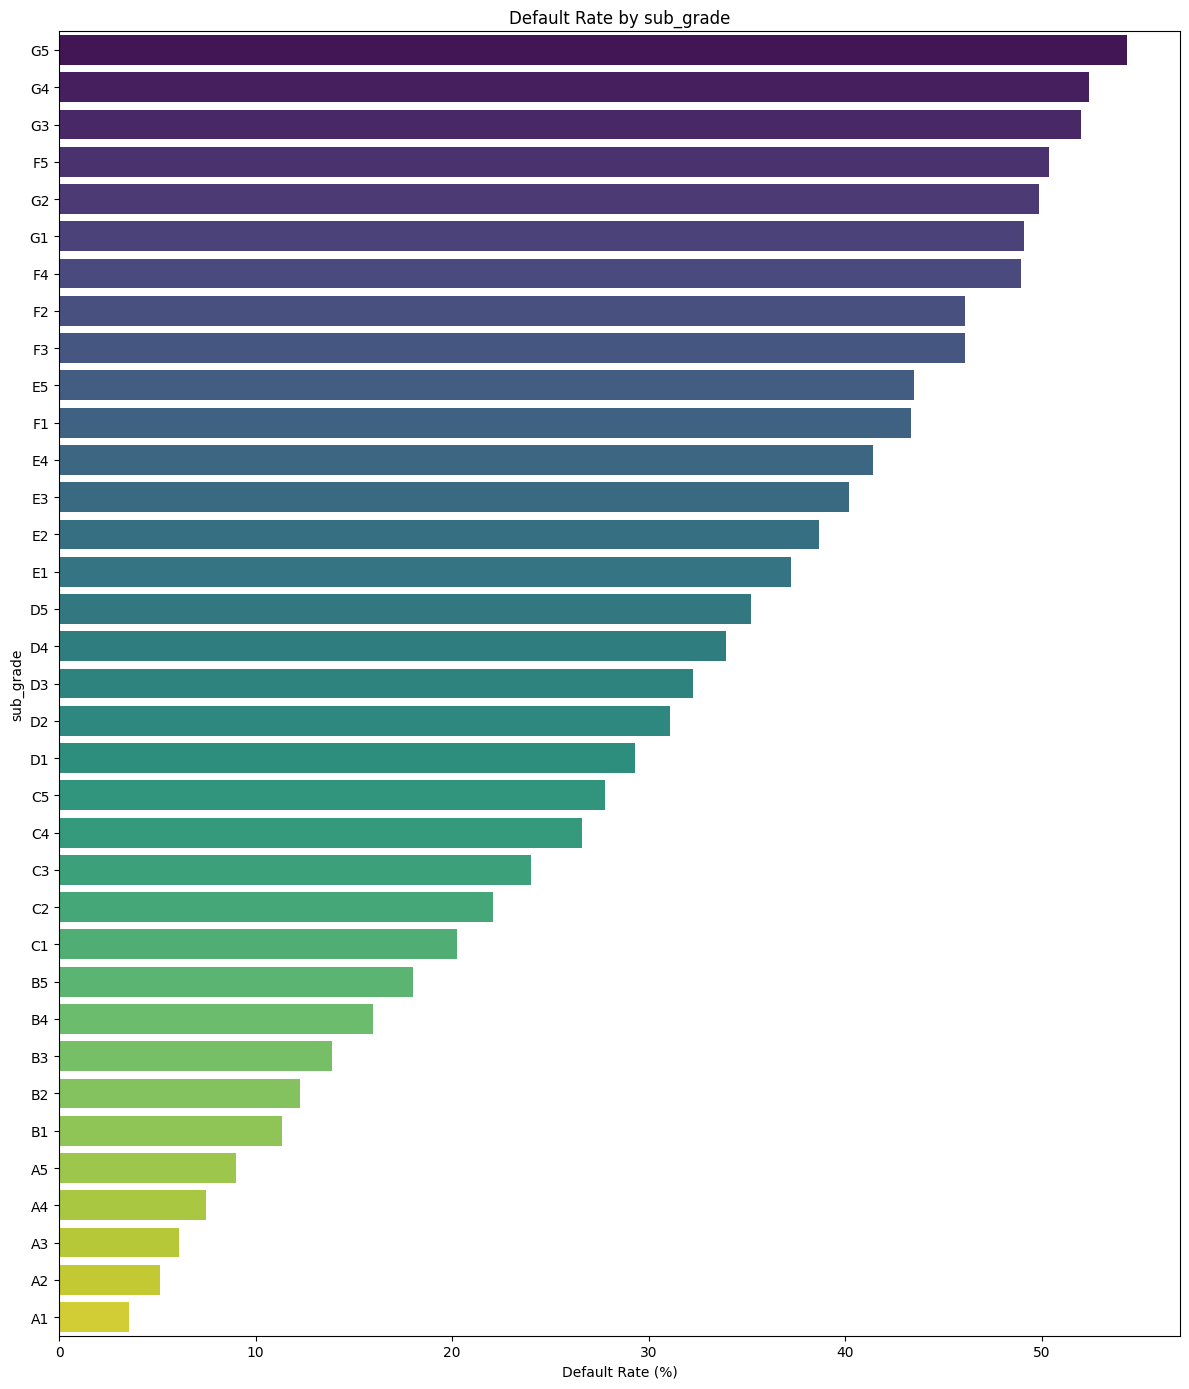


--- Default Rate by emp_length ---
emp_length
< 1 year     22.000434
1 year       21.855236
3 years      21.299083
4 years      21.138775
2 years      21.092509
8 years      20.936881
9 years      20.899394
5 years      20.858194
6 years      20.539829
7 years      20.535581
10+ years    19.987891
Name: is_default, dtype: float64


C:\Users\Agnivesh Kaundinya\AppData\Local\Temp\ipykernel_2032\765053702.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_by_category.values, y=default_rate_by_category.index, palette='viridis')


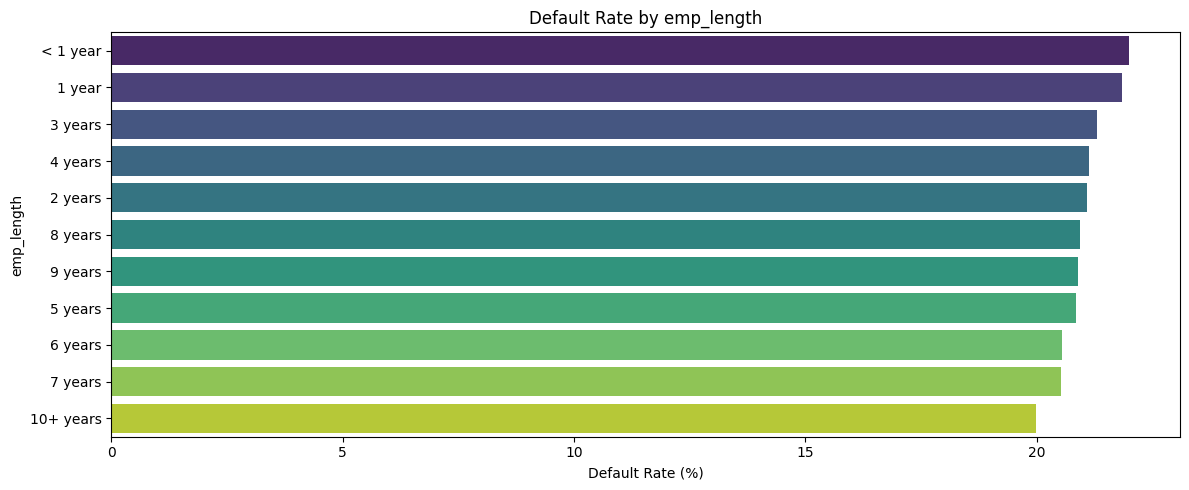


--- Default Rate by home_ownership ---
home_ownership
RENT        24.561133
ANY         24.342105
OWN         22.074564
OTHER       20.879121
MORTGAGE    18.369025
NONE        15.094340
Name: is_default, dtype: float64


C:\Users\Agnivesh Kaundinya\AppData\Local\Temp\ipykernel_2032\765053702.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_by_category.values, y=default_rate_by_category.index, palette='viridis')


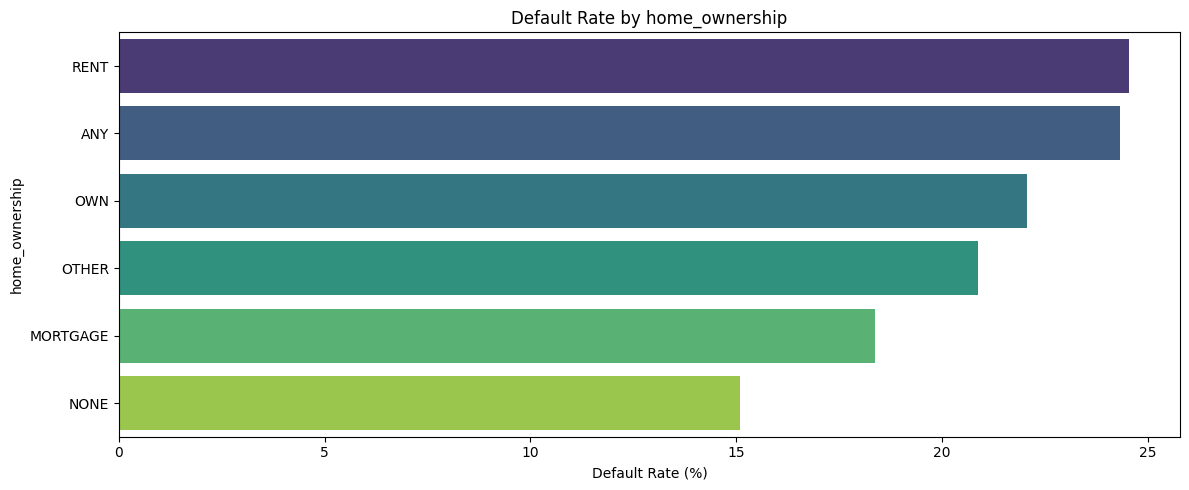


--- Default Rate by verification_status ---
verification_status
Verified           25.060022
Source Verified    22.309226
Not Verified       15.915646
Name: is_default, dtype: float64


C:\Users\Agnivesh Kaundinya\AppData\Local\Temp\ipykernel_2032\765053702.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_by_category.values, y=default_rate_by_category.index, palette='viridis')


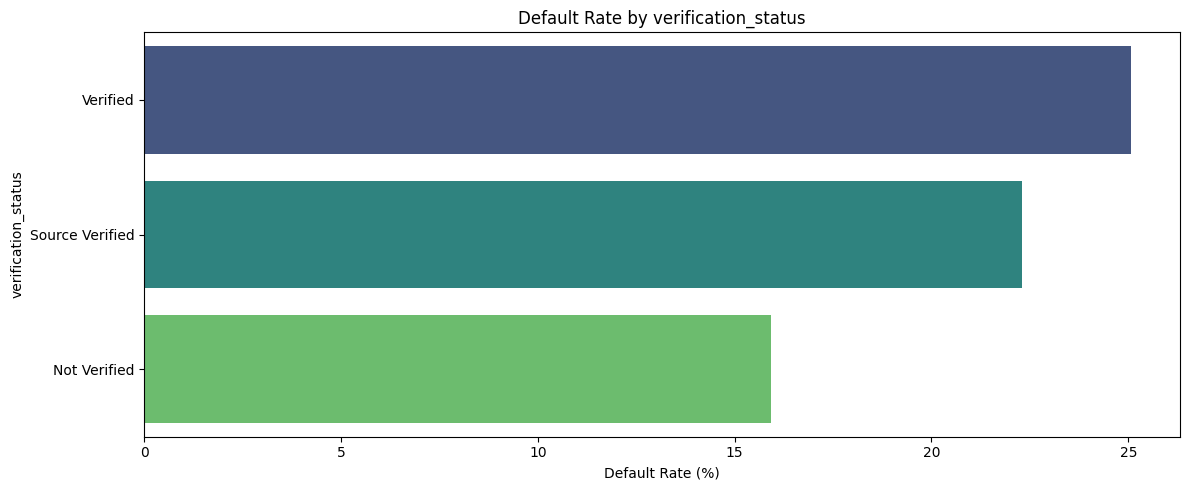


--- Default Rate by issue_d ---
issue_d
Oct-2007    32.380952
Nov-2007    30.357143
Sep-2017    29.421673
Apr-2018    28.619097
Jul-2016    27.895618
              ...    
Apr-2010    11.074561
Feb-2010    10.997067
Dec-2018    10.958904
Dec-2009    10.790274
Mar-2010    10.507246
Name: is_default, Length: 139, dtype: float64


C:\Users\Agnivesh Kaundinya\AppData\Local\Temp\ipykernel_2032\765053702.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_by_category.values, y=default_rate_by_category.index, palette='viridis')


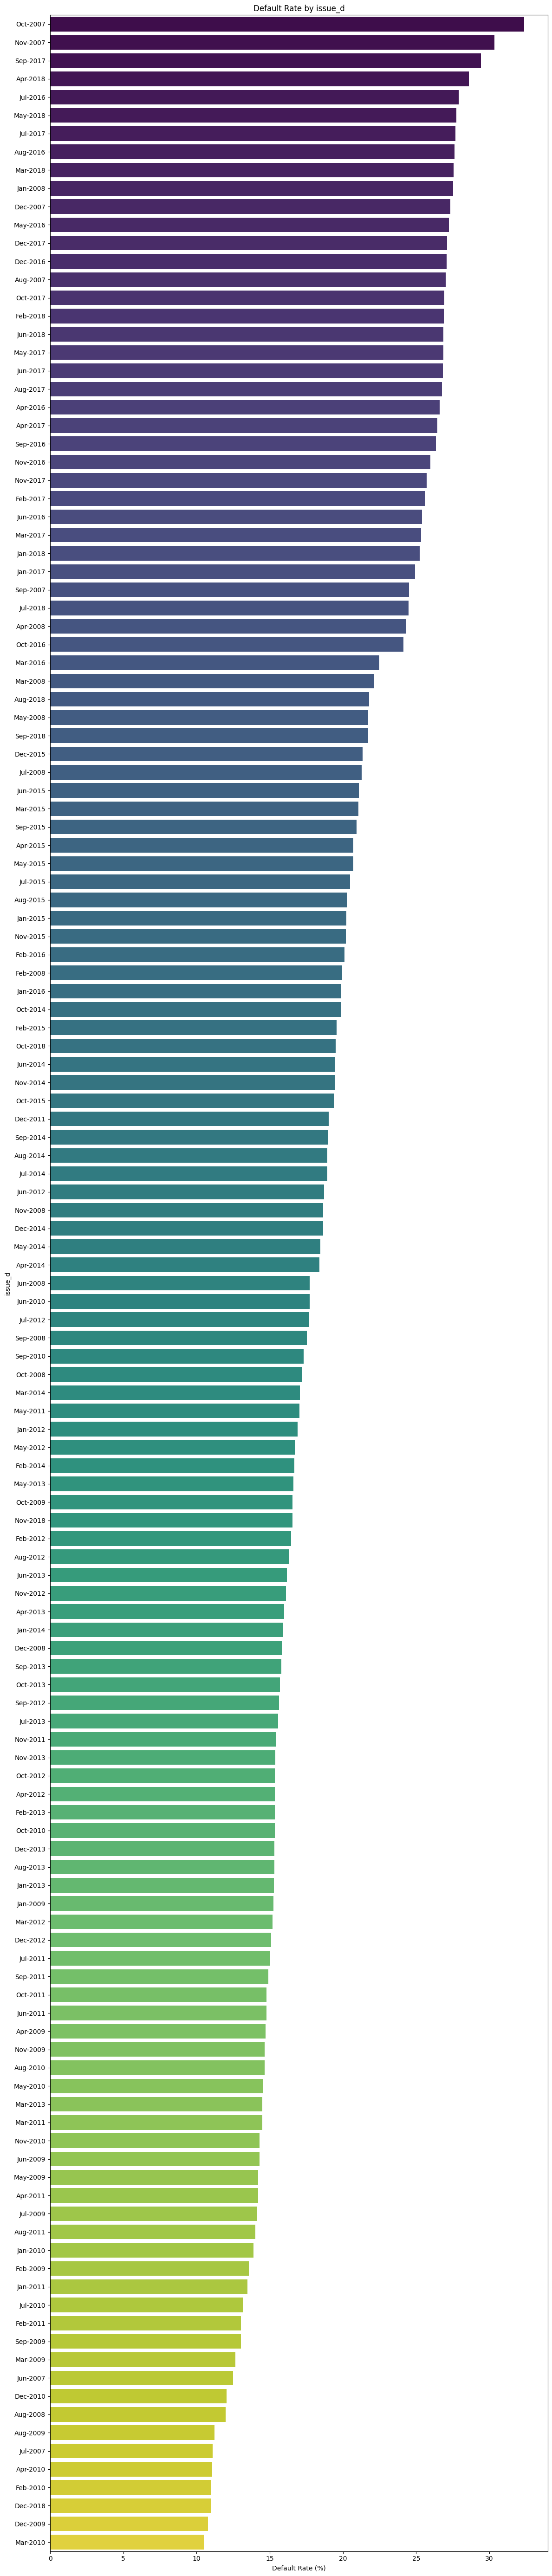


--- Default Rate by purpose ---
purpose
small_business        31.358382
renewable_energy      24.842105
moving                24.804204
house                 23.861055
medical               23.290168
other                 22.666917
debt_consolidation    22.395540
educational           20.803783
vacation              20.605733
major_purchase        20.140780
home_improvement      19.085485
credit_card           18.045381
car                   15.824576
wedding               12.425532
Name: is_default, dtype: float64


C:\Users\Agnivesh Kaundinya\AppData\Local\Temp\ipykernel_2032\765053702.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_by_category.values, y=default_rate_by_category.index, palette='viridis')


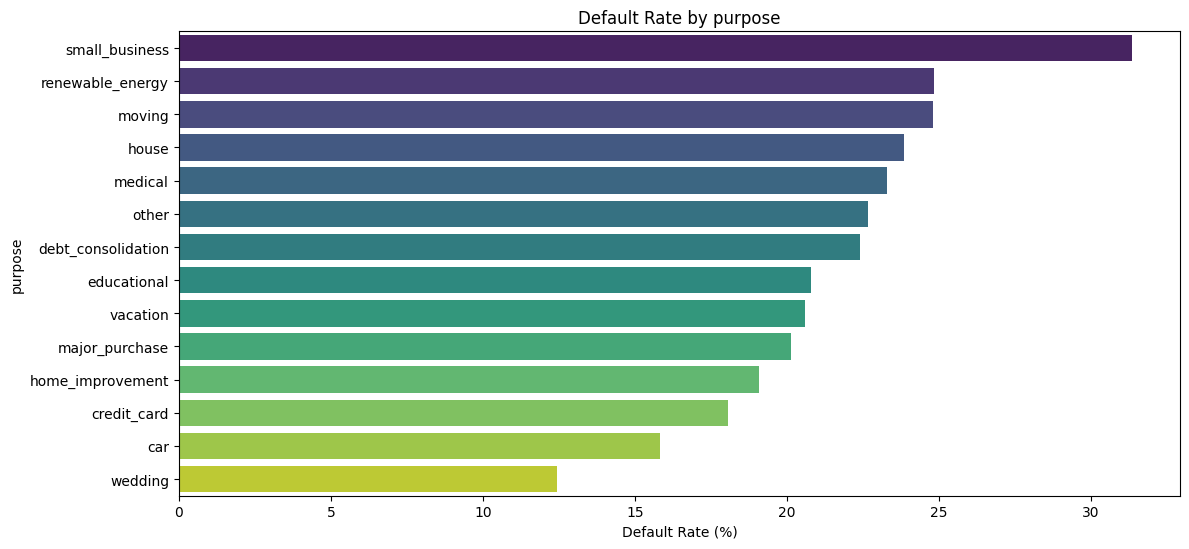


--- Default Rate by addr_state ---
addr_state
MS    28.359306
NE    27.070323
AR    25.415120
AL    24.991148
OK    24.800256
LA    24.408950
NY    23.474074
NV    23.050386
FL    22.979669
MD    22.847921
ND    22.741055
MO    22.698595
TN    22.644150
IN    22.641167
NM    22.560406
NJ    22.350772
SD    22.344975
KY    22.121792
NC    22.056298
PA    22.031924
MI    21.507476
OH    21.496482
HI    21.452481
IA    21.428571
VA    21.195610
TX    21.172560
MN    20.918870
AK    20.918053
ID    20.898100
DE    20.860327
CA    20.835919
AZ    20.812641
MA    20.255613
WI    19.911748
GA    19.674322
IL    19.167523
RI    19.112228
CT    18.725456
UT    18.086256
MT    17.815647
WY    17.758271
KS    17.756927
SC    17.510925
WA    16.830512
CO    16.513761
WV    16.213474
NH    15.897670
OR    15.411000
ME    15.261628
VT    15.029762
DC    14.237096
Name: is_default, dtype: float64


C:\Users\Agnivesh Kaundinya\AppData\Local\Temp\ipykernel_2032\765053702.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_by_category.values, y=default_rate_by_category.index, palette='viridis')


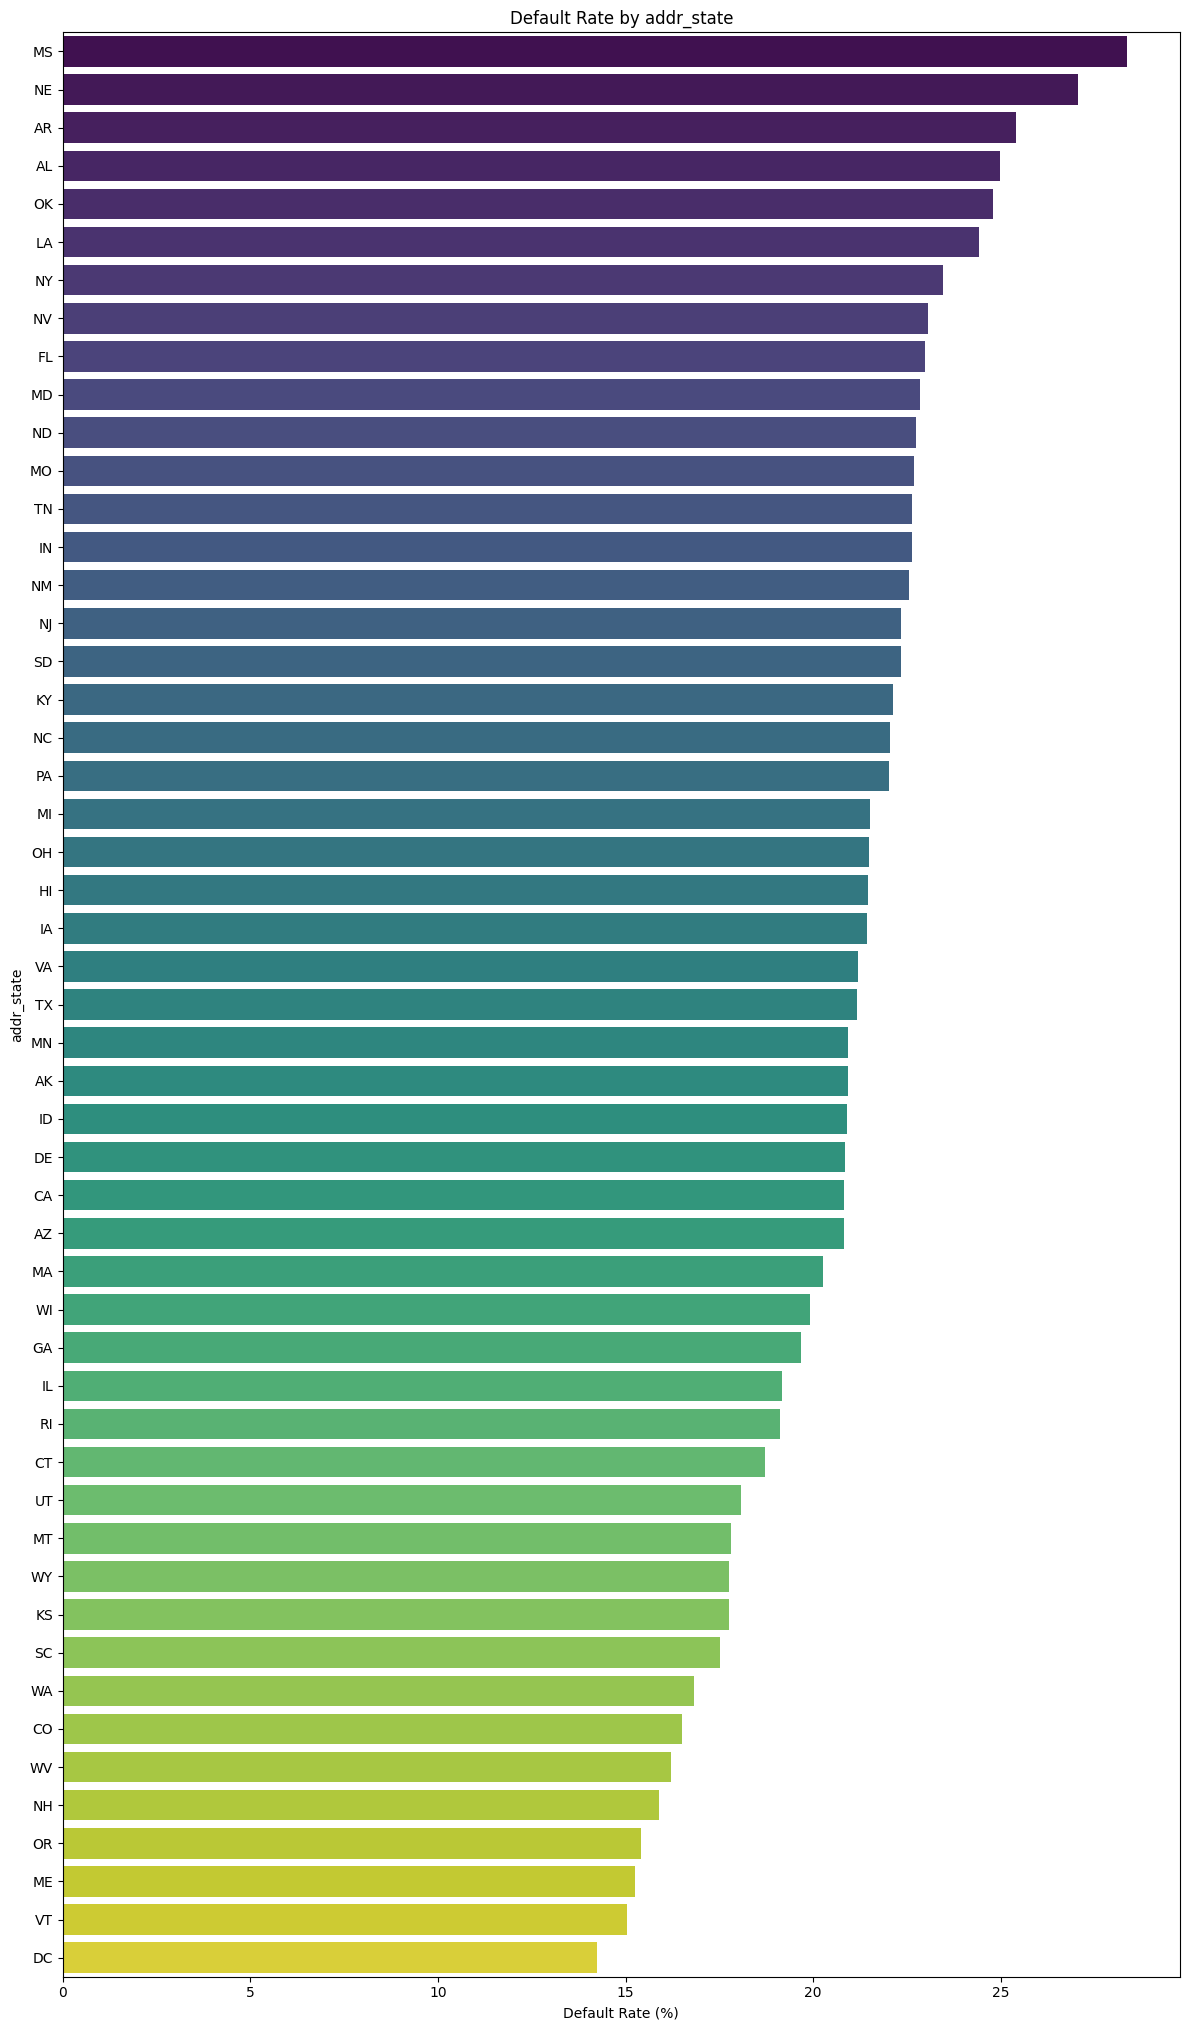


--- Default Rate by earliest_cr_line ---
earliest_cr_line
Nov-1957    100.000000
Jul-1952    100.000000
Aug-1951    100.000000
Sep-1957    100.000000
Nov-1956     66.666667
               ...    
Dec-1950      0.000000
Dec-1961      0.000000
Dec-1960      0.000000
Dec-1958      0.000000
Apr-1934      0.000000
Name: is_default, Length: 739, dtype: float64


C:\Users\Agnivesh Kaundinya\AppData\Local\Temp\ipykernel_2032\765053702.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_by_category.values, y=default_rate_by_category.index, palette='viridis')


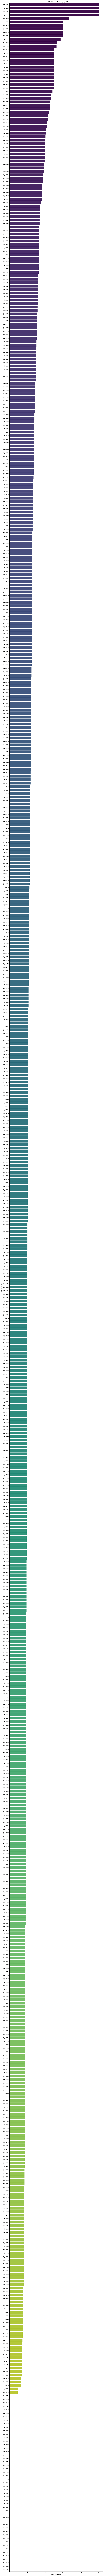


--- Default Rate by initial_list_status ---
initial_list_status
w    21.891232
f    20.310725
Name: is_default, dtype: float64


C:\Users\Agnivesh Kaundinya\AppData\Local\Temp\ipykernel_2032\765053702.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_by_category.values, y=default_rate_by_category.index, palette='viridis')


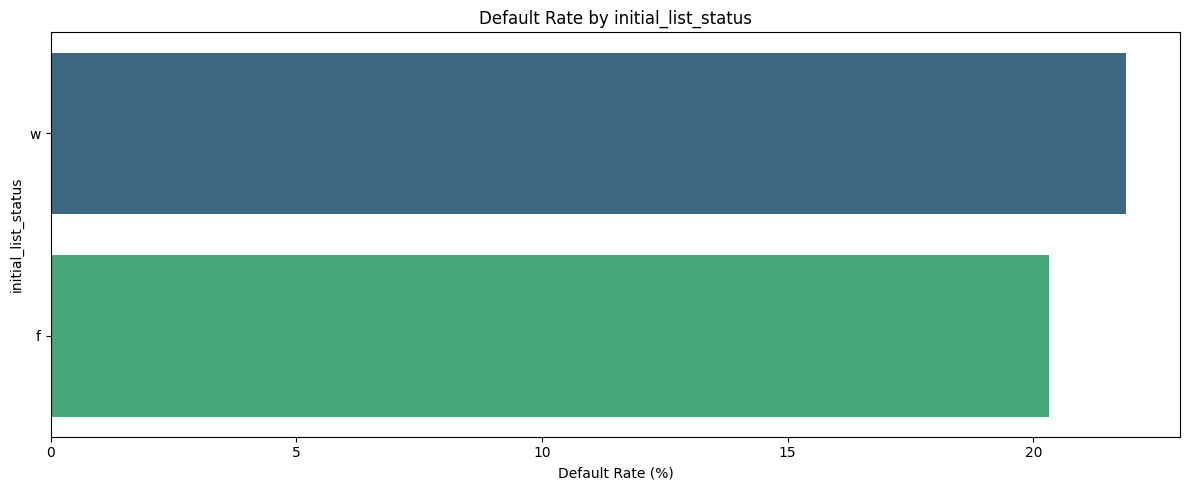


--- Default Rate by application_type ---
application_type
Joint App     30.474557
Individual    21.042247
Name: is_default, dtype: float64


C:\Users\Agnivesh Kaundinya\AppData\Local\Temp\ipykernel_2032\765053702.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_by_category.values, y=default_rate_by_category.index, palette='viridis')


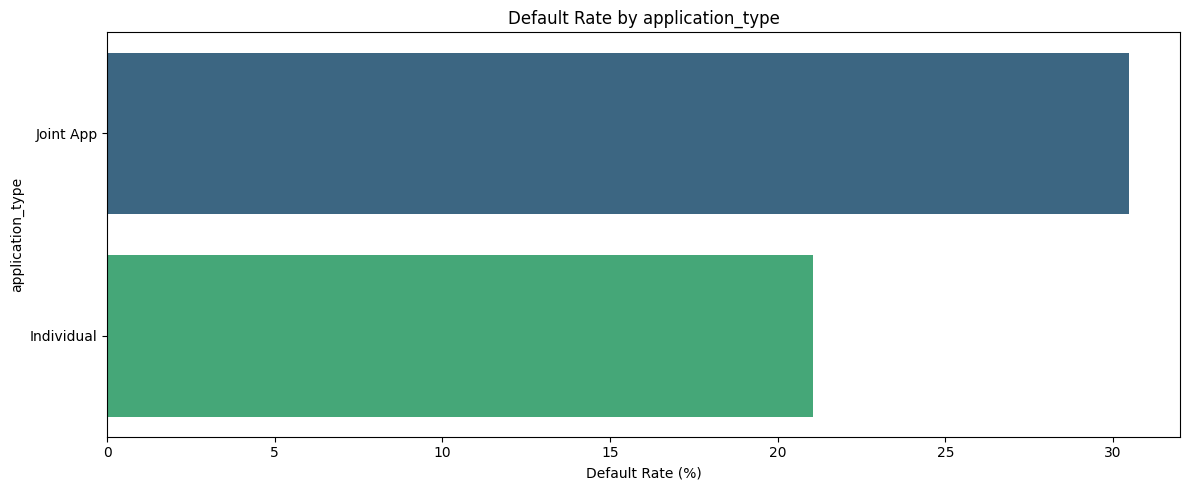


--- Default Rate by disbursement_method ---
disbursement_method
DirectPay    25.863691
Cash         21.209696
Name: is_default, dtype: float64


C:\Users\Agnivesh Kaundinya\AppData\Local\Temp\ipykernel_2032\765053702.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_by_category.values, y=default_rate_by_category.index, palette='viridis')


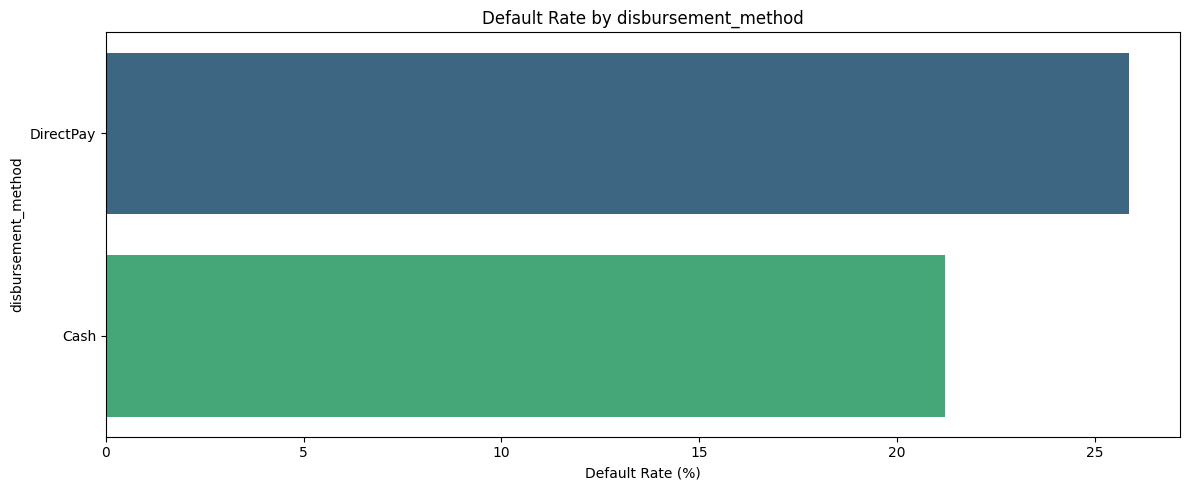

In [26]:
categorical_col = X.select_dtypes(include=['object']).columns.tolist()  # List of categorical features

print("\nCorrelation of Categorical Features with Default Status:")

for col in categorical_col:
    if col in df_combined.columns:
        temp_df = df_combined.dropna(subset=[col])
        default_rate_by_category = temp_df.groupby(col)['is_default'].mean().sort_values(ascending=False) * 100

        print(f"\n--- Default Rate by {col} ---")
        print(default_rate_by_category)

        plt.figure(figsize=(12, max(5, len(default_rate_by_category) * 0.4))) # adjust height based on number of categories
        sns.barplot(x=default_rate_by_category.values, y=default_rate_by_category.index, palette='viridis')
        plt.title(f'Default Rate by {col}')
        plt.xlabel('Default Rate (%)')
        plt.ylabel(col)
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

Need to Analyze these categorical values in more detail, but should be interesting to see which one of these to include in the final model.